# - The project :: Penguin Classification Project
*****************************************************************
<img src="images/fetal.png" />




* Cardiotocography (CTG) is used during pregnancy to monitor fetal heart rate and uterine contractions. It is monitor fetal well-being and allows early detection of fetal distress.

* CTG interpretation helps in determining if the pregnancy is high or low risk. An abnormal CTG may indicate the need for further investigations and potential intervention.

* In this project, I will create a model to classify the outcome of Cardiotocogram test to ensure the well being of the fetus.

******************************************

# Machine Learning Process ::
************************************
<img src="images/process.png" />

* Table of Contetnt ::
************************************************
<ul>
<li><a href="#Intro">Introduction</a></li>
<li><a href="#Wrangling">Exploratory Data Analysis (EDA)</a></li>
<li><a href="#visualize">Data_Visualization_Process</a></li>
<li><a href="#ETl">ETl_Process</a></li>
<li><a href="#Prepration">Data_Prepration</a></li>
<li><a href="#Model">Bulid_ML_Model</a></li>
<li><a href="#Evaluation">Evaluate_Model</a></li>
<li><a href="#Save">Save_Model</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

* Importing requried liberaries and Frameworks  ::

In [1]:
# Importing Liberaries and Framworks ::
import numpy     as np      # Apply Linear_Algebra operations and deal with arrays.
import pandas    as pd      # For Loading diff formats of data and Apply Wrangling and Mainpulating on data
import seaborn   as sns     # For Visualizing data
import warnings  as w       # For Ignoring any Warning
import missingno as mno     # Presnt Precentage of Nan Values
import datasist  as ds      # For Apply EDA and Visualization Using Simple Implementation
import matplotlib.pyplot as plt # For Set Plots , Charts and Maps Labels and Title  
import pandas_profiling  as pp  # To get describtion file of data



* Set some instructions

In [2]:
# To Make Matplotlib apply on any Version
%matplotlib inline      
# To ignore any Warning notification.
w.filterwarnings("ignore") 
# To Set Figsize of Plots , Charts and Maps
sns.set( rc = {"figure.figsize" : [20 , 20]} , font_scale=1.5)

In [3]:
# Loading dataset ::
df = pd.read_csv("fetal_health.csv")
df

baseline value  accelerations  fetal_movement  uterine_contractions  \
0              120.0          0.000           0.000                 0.000   
1              132.0          0.006           0.000                 0.006   
2              133.0          0.003           0.000                 0.008   
3              134.0          0.003           0.000                 0.008   
4              132.0          0.007           0.000                 0.008   
...              ...            ...             ...                   ...   
2121           140.0          0.000           0.000                 0.007   
2122           140.0          0.001           0.000                 0.007   
2123           140.0          0.001           0.000                 0.007   
2124           140.0          0.001           0.000                 0.006   
2125           142.0          0.002           0.002                 0.008   

      light_decelerations  severe_decelerations  prolongued_decelerations  \
0                   0.000                   0.0                       0.0   
1                   0.003                   0.0                       0.0   
2                   0.003                   0.0                       0.0   
3                   0.003                   0.0                       0.0   
4                   0.000                   0.0                       0.0   
...                   ...                   ...                       ...   
2121                0.000                   0.0                       0.0   
2122                0.000                   0.0                       0.0   
2123                0.000                   0.0                       0.0   
2124                0.000                   0.0                       0.0   
2125                0.000                   0.0                       0.0   

      abnormal_short_term_variability  mean_value_of_short_term_variability  \
0                                73.0                                   0.5   
1                                17.0                                   2.1   
2                                16.0                                   2.1   
3                                16.0                                   2.4   
4                                16.0                                   2.4   
...                               ...                                   ...   
2121                             79.0                                   0.2   
2122                             78.0                                   0.4   
2123                             79.0                                   0.4   
2124                             78.0                                   0.4   
2125                             74.0                                   0.4   

      percentage_of_time_with_abnormal_long_term_variability  ...  \
0                                                  43.0       ...   
1                                                   0.0       ...   
2                                                   0.0       ...   
3                                                   0.0       ...   
4                                                   0.0       ...   
...                                                 ...       ...   
2121                                               25.0       ...   
2122                                               22.0       ...   
2123                                               20.0       ...   
2124                                               27.0       ...   
2125                                               36.0       ...   

      histogram_min  histogram_max  histogram_number_of_peaks  \
0              62.0          126.0                        2.0   
1              68.0          198.0                        6.0   
2              68.0          198.0                        5.0   
3              53.0          170.0                       11.0   
4              53.0          170.0                   

* On This Dataset Cardiotocograms (CTGs) are a simple and cost accessible option to assess fetal health, allowing healthcare professionals to take action in order to prevent child and maternal mortality. The equipment itself works by sending ultrasound pulses and reading its response, thus shedding light on fetal heart rate (FHR), fetal movements, uterine contractions and more.

* This dataset contains 2126 records of features extracted from Cardiotocogram exams, which were then classified by expert obstetrician into 3 classes:
    * 1- Normal.
    * 2- Suspect 
    * 3- Pathological
*********************************
* Data-Features ::

    
  * 'baseline value' FHR baseline (beats per minute)
  * 'accelerations' Number of accelerations per second
  * 'fetal_movement' Number of fetal movements per second
  * 'uterine_contractions' Number of uterine contractions per second
  * 'light_decelerations' Number of light decelerations per second
  * 'severe_decelerations' Number of severe decelerations per second
  * 'prolongued_decelerations' Number of prolonged decelerations per second
  * 'abnormal_short_term_variability' Percentage of time with abnormal short term variability
  * 'mean_value_of_short_term_variability' Mean value of short term variability
  * 'percentage_of_time_with_abnormal_long_term_variability' Percentage of time with abnormal long term variability
  * 'mean_value_of_long_term_variability' Mean value of long term variability
  * 'histogram_width' Width of FHR histogram
  * 'histogram_min' Minimum (low frequency) of FHR histogram
  * 'histogram_max' Maximum (high frequency) of FHR histogram
  * 'histogram_number_of_peaks' Number of histogram peaks
  * 'histogram_number_of_zeroes' Number of histogram zeros
  * 'histogram_mode' Histogram mode
  * 'histogram_mean' Histogram mean
  * 'histogram_median' Histogram median
  * 'histogram_variance' Histogram variance
  * 'histogram_tendency' Histogram tendency
  ***************************

* Target

  * 'fetal_health' Tagged as 1 (Normal), 2 (Suspect) and 3 (Pathological)

    
    
    

<p id="Wrangling">Exploratory data analysis</p>

* *EDA Task* ::
*******************************
 *  It one of the most important phase of data scientist life cycle which we apply some statistical oprations toidentify the Behaviour of data  to extract meaningful knowledge , insights and vesion from that data to help steckholders to make more efficient decision which improve and enhance our Buesines.

* Statistical analysis Process ::

In [4]:
df.columns

Index(['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency',
       'fetal_health'],
      dtype='object')

In [5]:
df.dtypes

baseline value                                            float64
accelerations                                             float64
fetal_movement                                            float64
uterine_contractions                                      float64
light_decelerations                                       float64
severe_decelerations                                      float64
prolongued_decelerations                                  float64
abnormal_short_term_variability                           float64
mean_value_of_short_term_variability                      float64
percentage_of_time_with_abnormal_long_term_variability    float64
mean_value_of_long_term_variability                       float64
histogram_width                                           float64
histogram_min                                             float64
histogram_max                                             float64
histogram_number_of_peaks                                 float64
histogram_

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

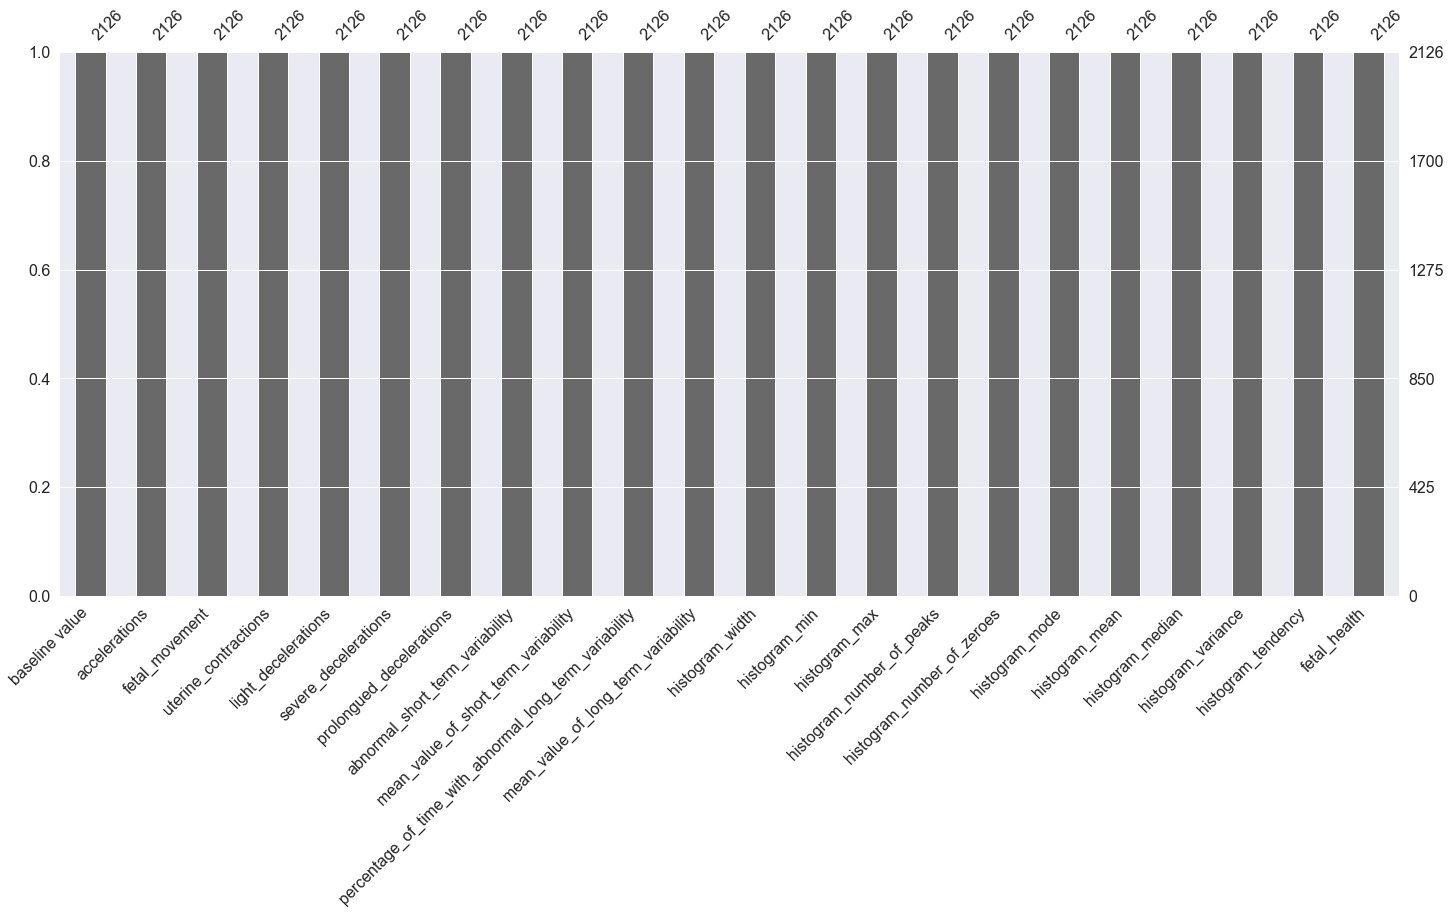

In [7]:
# Investigate Data not include null values ::
# Let's take a look at the presence of missing values, so as not to face unpleasant surprises in the future.


mno.bar(df)
df.isna().sum()

In [8]:
df.isnull().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

In [9]:
# identify the unique data values and its values count ::
for col in df.columns :
    print(f"The Col :: ({col})\n\nThe Col _ ({col}) _Unique_values :: {df[col].unique()}\n\n\
The Col _ ({col})_Value_counts :: \n\n{df[col].value_counts()}\n\n====================\n======================\n")

The Col :: (baseline value)

The Col _ (baseline value) _Unique_values :: [120. 132. 133. 134. 122. 151. 150. 131. 130. 129. 128. 124. 115. 114.
 116. 158. 156. 148. 149. 146. 144. 142. 136. 141. 138. 140. 154. 145.
 139. 125. 123. 159. 143. 119. 121. 127. 126. 118. 135. 137. 147. 157.
 117. 152. 112. 106. 110. 160.]

The Col _ (baseline value)_Value_counts :: 

133.0    136
130.0    111
122.0    109
138.0    103
125.0     91
128.0     85
120.0     78
142.0     77
144.0     77
132.0     76
136.0     72
140.0     70
134.0     67
135.0     65
146.0     62
127.0     60
137.0     59
129.0     57
123.0     56
143.0     56
131.0     56
148.0     52
121.0     44
139.0     39
141.0     39
126.0     38
145.0     37
115.0     28
150.0     26
110.0     21
149.0     18
152.0     17
119.0     17
112.0     16
147.0     14
151.0     14
159.0     12
114.0     11
158.0     10
124.0     10
118.0      9
154.0      8
106.0      7
116.0      5
157.0      4
156.0      4
117.0      2
160.0      1
Name: basel

In [10]:
# Present the Statistical Analysis describtion of Numerical_data ::
df.describe(include=["number"])

baseline value  accelerations  fetal_movement  uterine_contractions  \
count     2126.000000    2126.000000     2126.000000           2126.000000   
mean       133.303857       0.003178        0.009481              0.004366   
std          9.840844       0.003866        0.046666              0.002946   
min        106.000000       0.000000        0.000000              0.000000   
25%        126.000000       0.000000        0.000000              0.002000   
50%        133.000000       0.002000        0.000000              0.004000   
75%        140.000000       0.006000        0.003000              0.007000   
max        160.000000       0.019000        0.481000              0.015000   

       light_decelerations  severe_decelerations  prolongued_decelerations  \
count          2126.000000           2126.000000               2126.000000   
mean              0.001889              0.000003                  0.000159   
std               0.002960              0.000057                  0.000590   
min               0.000000              0.000000                  0.000000   
25%               0.000000              0.000000                  0.000000   
50%               0.000000              0.000000                  0.000000   
75%               0.003000              0.000000                  0.000000   
max               0.015000              0.001000                  0.005000   

       abnormal_short_term_variability  mean_value_of_short_term_variability  \
count                      2126.000000                           2126.000000   
mean                         46.990122                              1.332785   
std                          17.192814                              0.883241   
min                          12.000000                              0.200000   
25%                          32.000000                              0.700000   
50%                          49.000000                              1.200000   
75%                          61.000000                              1.700000   
max                          87.000000                              7.000000   

       percentage_of_time_with_abnormal_long_term_variability  ...  \
count                                         2126.00000       ...   
mean                                             9.84666       ...   
std                                             18.39688       ...   
min                                              0.00000       ...   
25%                                              0.00000       ...   
50%                                              0.00000       ...   
75%                                             11.00000       ...   
max                                             91.00000       ...   

       histogram_min  histogram_max  histogram_number_of_peaks  \
count    2126.000000    2126.000000                2126.000000   
mean       93.579492     164.025400                   4.068203   
std        29.560212      17.944183                   2.949386   
min        50.000000     122.000000                   0.000000   
25%        67.000000     152.000000                   2.000000   
50%        93.000000     162.000000                   3.000000   
75%       120.000000     174.000000                   6.000000   
max       159.000000     238.000000                  18.000000   

       histogram_number_of_zeroes  histogram_mode  histogram_mean  \
count                 2126.000000     2126.000000     2126.000000   
mean                     0.323612      137.452023      134.610536   
std                      0.706059       16.381289       15.593596   
min                      0.000000       60.000000       73.000000   
25%                      0.000000      129.000000      125.000000   
50%                      0.000000      139.000000      136.000000   
75%                      0.000000      148.000000      145.000000   
max                     10.000000      187.000000      182.000000   

       histogram_median  histogr

In [11]:
# Present nuniques :: To identifing the duplicaties data
df.nunique()

baseline value                                             48
accelerations                                              20
fetal_movement                                            102
uterine_contractions                                       16
light_decelerations                                        16
severe_decelerations                                        2
prolongued_decelerations                                    6
abnormal_short_term_variability                            75
mean_value_of_short_term_variability                       57
percentage_of_time_with_abnormal_long_term_variability     87
mean_value_of_long_term_variability                       249
histogram_width                                           154
histogram_min                                             109
histogram_max                                              86
histogram_number_of_peaks                                  18
histogram_number_of_zeroes                                  9
histogra

In [12]:
# check data include duplicates record or not
df.duplicated().sum()

13

In [13]:
# Droping All repeat or Redendant data.
df.drop_duplicates(inplace=True)

In [14]:
df.duplicated().sum()

0

* Wrangling and Mainplluting data.

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2113 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2113 non-null   float64
 1   accelerations                                           2113 non-null   float64
 2   fetal_movement                                          2113 non-null   float64
 3   uterine_contractions                                    2113 non-null   float64
 4   light_decelerations                                     2113 non-null   float64
 5   severe_decelerations                                    2113 non-null   float64
 6   prolongued_decelerations                                2113 non-null   float64
 7   abnormal_short_term_variability                         2113 non-null   float64
 8   mean_value_of_short_term_variability  

In [16]:
# Get The Record Of the Clients who max baseline value ::
df[df["baseline value"] == df["baseline value"].max()]

baseline value  accelerations  fetal_movement  uterine_contractions  \
1757           160.0           0.01             0.0                 0.008   

      light_decelerations  severe_decelerations  prolongued_decelerations  \
1757                  0.0                   0.0                       0.0   

      abnormal_short_term_variability  mean_value_of_short_term_variability  \
1757                             58.0                                   0.8   

      percentage_of_time_with_abnormal_long_term_variability  ...  \
1757                                                0.0       ...   

      histogram_min  histogram_max  histogram_number_of_peaks  \
1757          131.0          205.0                        7.0   

      histogram_number_of_zeroes  histogram_mode  histogram_mean  \
1757                         0.0           179.0           170.0   

      histogram_median  histogram_variance  histogram_tendency  fetal_health  
1757             174.0                14.0                 0.0           1.0  

[1 rows x 22 columns]

In [17]:
# Get The Record of the Min baseline value ::
df[df["baseline value"] == df["baseline value"].min()]

baseline value  accelerations  fetal_movement  uterine_contractions  \
1659           106.0          0.011             0.0                 0.009   
1660           106.0          0.000             0.0                 0.010   
1661           106.0          0.000             0.0                 0.010   
1662           106.0          0.001             0.0                 0.011   
1663           106.0          0.000             0.0                 0.010   
1664           106.0          0.000             0.0                 0.009   
1665           106.0          0.006             0.0                 0.006   

      light_decelerations  severe_decelerations  prolongued_decelerations  \
1659                  0.0                   0.0                       0.0   
1660                  0.0                   0.0                       0.0   
1661                  0.0                   0.0                       0.0   
1662                  0.0                   0.0                       0.0   
1663                  0.0                   0.0                       0.0   
1664                  0.0                   0.0                       0.0   
1665                  0.0                   0.0                       0.0   

      abnormal_short_term_variability  mean_value_of_short_term_variability  \
1659                             62.0                                   1.4   
1660                             63.0                                   0.6   
1661                             63.0                                   0.6   
1662                             63.0                                   0.6   
1663                             63.0                                   0.6   
1664                             64.0                                   0.6   
1665                             64.0                                   0.7   

      percentage_of_time_with_abnormal_long_term_variability  ...  \
1659                                                0.0       ...   
1660                                                0.0       ...   
1661                                                0.0       ...   
1662                                                0.0       ...   
1663                                                0.0       ...   
1664                                                0.0       ...   
1665                                                0.0       ...   

      histogram_min  histogram_max  histogram_number_of_peaks  \
1659           94.0          148.0                        5.0   
1660           95.0          123.0                        1.0   
1661           95.0          123.0                        1.0   
1662           95.0          125.0                        1.0   
1663           95.0          122.0                        1.0   
1664          102.0          122.0                        1.0   
1665          100.0          154.0                        3.0   

      histogram_number_of_zeroes  histogram_mode  histogram_mean  \
1659                         0.0           107.0           117.0   
1660                         0.0           110.0           109.0   
1661                         0.0           112.0           109.0   
1662                         0.0           112.0           110.0   
1663                         0.0           112.0           110.0   
1664                         0.0           111.0           111.0   
1665                         0.0           112.0           116.0   

      histogram_median  histogram_variance  histogram_tendency  fetal_health  
1659             116.0                32.0                -1.0           1.0  
1660             111.0                 2.0                 0.0           1.0  
1661             111.0                 2.0                 0.0           1.0  
1662             112.0                 1.0                 0.0           1.0  
1663             112.0                 1.0                 0.0           1.0  
1664             112.0                 0.0    

In [18]:
# Get The Record Of the Clients who max accelerations ::
df[df["accelerations"] == df["accelerations"].max()]

baseline value  accelerations  fetal_movement  uterine_contractions  \
529           142.0          0.019           0.085                   0.0   

     light_decelerations  severe_decelerations  prolongued_decelerations  \
529                  0.0                   0.0                       0.0   

     abnormal_short_term_variability  mean_value_of_short_term_variability  \
529                             32.0                                   2.3   

     percentage_of_time_with_abnormal_long_term_variability  ...  \
529                                                0.0       ...   

     histogram_min  histogram_max  histogram_number_of_peaks  \
529           56.0          200.0                       10.0   

     histogram_number_of_zeroes  histogram_mode  histogram_mean  \
529                         0.0           170.0           158.0   

     histogram_median  histogram_variance  histogram_tendency  fetal_health  
529             162.0                37.0                 1.0           1.0  

[1 rows x 22 columns]

In [19]:
# Get The Record of the Min accelerations ::
df[df["accelerations"] == df["accelerations"].min()]

baseline value  accelerations  fetal_movement  uterine_contractions  \
0              120.0            0.0             0.0                 0.000   
7              122.0            0.0             0.0                 0.000   
8              122.0            0.0             0.0                 0.002   
9              122.0            0.0             0.0                 0.003   
10             151.0            0.0             0.0                 0.001   
...              ...            ...             ...                   ...   
2117           140.0            0.0             0.0                 0.008   
2118           140.0            0.0             0.0                 0.006   
2119           140.0            0.0             0.0                 0.007   
2120           140.0            0.0             0.0                 0.005   
2121           140.0            0.0             0.0                 0.007   

      light_decelerations  severe_decelerations  prolongued_decelerations  \
0                   0.000                   0.0                       0.0   
7                   0.000                   0.0                       0.0   
8                   0.000                   0.0                       0.0   
9                   0.000                   0.0                       0.0   
10                  0.001                   0.0                       0.0   
...                   ...                   ...                       ...   
2117                0.000                   0.0                       0.0   
2118                0.001                   0.0                       0.0   
2119                0.001                   0.0                       0.0   
2120                0.001                   0.0                       0.0   
2121                0.000                   0.0                       0.0   

      abnormal_short_term_variability  mean_value_of_short_term_variability  \
0                                73.0                                   0.5   
7                                83.0                                   0.5   
8                                84.0                                   0.5   
9                                86.0                                   0.3   
10                               64.0                                   1.9   
...                               ...                                   ...   
2117                             79.0                                   0.3   
2118                             79.0                                   0.5   
2119                             79.0                                   0.6   
2120                             77.0                                   0.7   
2121                             79.0                                   0.2   

      percentage_of_time_with_abnormal_long_term_variability  ...  \
0                                                  43.0       ...   
7                                                   6.0       ...   
8                                                   5.0       ...   
9                                                   6.0       ...   
10                                                  9.0       ...   
...                                                 ...       ...   
2117                                               20.0       ...   
2118                                               26.0       ...   
2119                                               27.0       ...   
2120                                               17.0       ...   
2121                                               25.0       ...   

      histogram_min  histogram_max  histogram_number_of_peaks  \
0              62.0          126.0                        2.0   
7              62.0          130.0                        0.0   
8              62.0          130.0                        0.0   
9              62.0          130.0                        1.0   
10             56.0          186.0                   

In [20]:
# Get The Record Of the Clients who max fetal_movement ::
df[df["fetal_movement"] == df["fetal_movement"].max()]

baseline value  accelerations  fetal_movement  uterine_contractions  \
696           133.0          0.007           0.481                 0.005   

     light_decelerations  severe_decelerations  prolongued_decelerations  \
696                0.002                   0.0                       0.0   

     abnormal_short_term_variability  mean_value_of_short_term_variability  \
696                             32.0                                   1.6   

     percentage_of_time_with_abnormal_long_term_variability  ...  \
696                                                0.0       ...   

     histogram_min  histogram_max  histogram_number_of_peaks  \
696           68.0          158.0                        4.0   

     histogram_number_of_zeroes  histogram_mode  histogram_mean  \
696                         0.0           133.0           133.0   

     histogram_median  histogram_variance  histogram_tendency  fetal_health  
696             135.0                18.0                 1.0           1.0  

[1 rows x 22 columns]

In [21]:
# Get The Record of the Min fetal_movement ::
df[df["fetal_movement"] == df["fetal_movement"].min()]

baseline value  accelerations  fetal_movement  uterine_contractions  \
0              120.0          0.000             0.0                 0.000   
1              132.0          0.006             0.0                 0.006   
2              133.0          0.003             0.0                 0.008   
3              134.0          0.003             0.0                 0.008   
4              132.0          0.007             0.0                 0.008   
...              ...            ...             ...                   ...   
2120           140.0          0.000             0.0                 0.005   
2121           140.0          0.000             0.0                 0.007   
2122           140.0          0.001             0.0                 0.007   
2123           140.0          0.001             0.0                 0.007   
2124           140.0          0.001             0.0                 0.006   

      light_decelerations  severe_decelerations  prolongued_decelerations  \
0                   0.000                   0.0                       0.0   
1                   0.003                   0.0                       0.0   
2                   0.003                   0.0                       0.0   
3                   0.003                   0.0                       0.0   
4                   0.000                   0.0                       0.0   
...                   ...                   ...                       ...   
2120                0.001                   0.0                       0.0   
2121                0.000                   0.0                       0.0   
2122                0.000                   0.0                       0.0   
2123                0.000                   0.0                       0.0   
2124                0.000                   0.0                       0.0   

      abnormal_short_term_variability  mean_value_of_short_term_variability  \
0                                73.0                                   0.5   
1                                17.0                                   2.1   
2                                16.0                                   2.1   
3                                16.0                                   2.4   
4                                16.0                                   2.4   
...                               ...                                   ...   
2120                             77.0                                   0.7   
2121                             79.0                                   0.2   
2122                             78.0                                   0.4   
2123                             79.0                                   0.4   
2124                             78.0                                   0.4   

      percentage_of_time_with_abnormal_long_term_variability  ...  \
0                                                  43.0       ...   
1                                                   0.0       ...   
2                                                   0.0       ...   
3                                                   0.0       ...   
4                                                   0.0       ...   
...                                                 ...       ...   
2120                                               17.0       ...   
2121                                               25.0       ...   
2122                                               22.0       ...   
2123                                               20.0       ...   
2124                                               27.0       ...   

      histogram_min  histogram_max  histogram_number_of_peaks  \
0              62.0          126.0                        2.0   
1              68.0          198.0                        6.0   
2              68.0          198.0                        5.0   
3              53.0          170.0                       11.0   
4              53.0          170.0                   

In [22]:
# Get The Record Of the Clients who max uterine_contractions ::
df[df["uterine_contractions"] == df["uterine_contractions"].max()]

baseline value  accelerations  fetal_movement  uterine_contractions  \
1164           131.0          0.011             0.0                 0.015   

      light_decelerations  severe_decelerations  prolongued_decelerations  \
1164                  0.0                   0.0                       0.0   

      abnormal_short_term_variability  mean_value_of_short_term_variability  \
1164                             26.0                                   1.5   

      percentage_of_time_with_abnormal_long_term_variability  ...  \
1164                                                0.0       ...   

      histogram_min  histogram_max  histogram_number_of_peaks  \
1164          109.0          170.0                        2.0   

      histogram_number_of_zeroes  histogram_mode  histogram_mean  \
1164                         1.0           155.0           151.0   

      histogram_median  histogram_variance  histogram_tendency  fetal_health  
1164             154.0                11.0                 1.0           1.0  

[1 rows x 22 columns]

In [23]:
# Get The Record of the Min uterine_contractions ::
df[df["uterine_contractions"] == df["uterine_contractions"].min()]

baseline value  accelerations  fetal_movement  uterine_contractions  \
0              120.0          0.000           0.000                   0.0   
7              122.0          0.000           0.000                   0.0   
23             128.0          0.000           0.000                   0.0   
25             124.0          0.000           0.000                   0.0   
26             124.0          0.000           0.000                   0.0   
...              ...            ...             ...                   ...   
1862           138.0          0.016           0.000                   0.0   
1867           138.0          0.008           0.000                   0.0   
1991           135.0          0.006           0.000                   0.0   
2069           130.0          0.008           0.001                   0.0   
2070           130.0          0.007           0.001                   0.0   

      light_decelerations  severe_decelerations  prolongued_decelerations  \
0                   0.000                   0.0                       0.0   
7                   0.000                   0.0                       0.0   
23                  0.000                   0.0                       0.0   
25                  0.000                   0.0                       0.0   
26                  0.000                   0.0                       0.0   
...                   ...                   ...                       ...   
1862                0.000                   0.0                       0.0   
1867                0.003                   0.0                       0.0   
1991                0.000                   0.0                       0.0   
2069                0.000                   0.0                       0.0   
2070                0.000                   0.0                       0.0   

      abnormal_short_term_variability  mean_value_of_short_term_variability  \
0                                73.0                                   0.5   
7                                83.0                                   0.5   
23                               80.0                                   0.5   
25                               86.0                                   0.3   
26                               86.0                                   0.4   
...                               ...                                   ...   
1862                             51.0                                   1.0   
1867                             49.0                                   1.6   
1991                             58.0                                   1.2   
2069                             67.0                                   0.9   
2070                             67.0                                   0.9   

      percentage_of_time_with_abnormal_long_term_variability  ...  \
0                                                  43.0       ...   
7                                                   6.0       ...   
23                                                  0.0       ...   
25                                                 72.0       ...   
26                                                 14.0       ...   
...                                                 ...       ...   
1862                                                0.0       ...   
1867                                                0.0       ...   
1991                                                0.0       ...   
2069                                                0.0       ...   
2070                                                0.0       ...   

      histogram_min  histogram_max  histogram_number_of_peaks  \
0              62.0          126.0                        2.0   
7              62.0          130.0                        0.0   
23            114.0          130.0                        0.0   
25            118.0          130.0                        1.0   
26            122.0          146.0                   

In [24]:
# Get The Record Of the Clients who max light_decelerations ::
df[df["light_decelerations"] == df["light_decelerations"].max()]

baseline value  accelerations  fetal_movement  uterine_contractions  \
115            129.0            0.0           0.011                 0.007   
1155           122.0            0.0           0.000                 0.002   
1790           121.0            0.0           0.002                 0.002   

      light_decelerations  severe_decelerations  prolongued_decelerations  \
115                 0.015                   0.0                       0.0   
1155                0.015                   0.0                       0.0   
1790                0.015                   0.0                       0.0   

      abnormal_short_term_variability  mean_value_of_short_term_variability  \
115                              22.0                                   4.8   
1155                             13.0                                   3.0   
1790                             61.0                                   2.0   

      percentage_of_time_with_abnormal_long_term_variability  ...  \
115                                                 0.0       ...   
1155                                                0.0       ...   
1790                                                0.0       ...   

      histogram_min  histogram_max  histogram_number_of_peaks  \
115            50.0          188.0                        7.0   
1155           69.0          152.0                        3.0   
1790           62.0          160.0                        8.0   

      histogram_number_of_zeroes  histogram_mode  histogram_mean  \
115                          2.0           129.0           114.0   
1155                         0.0           110.0           110.0   
1790                         0.0           114.0           100.0   

      histogram_median  histogram_variance  histogram_tendency  fetal_health  
115              120.0                60.0                 0.0           1.0  
1155             113.0                16.0                 0.0           1.0  
1790             106.0                59.0                 0.0           3.0  

[3 rows x 22 columns]

In [25]:
# Get The Record of the Min light_decelerations ::
df[df["light_decelerations"] == df["light_decelerations"].min()]

baseline value  accelerations  fetal_movement  uterine_contractions  \
0              120.0          0.000           0.000                 0.000   
4              132.0          0.007           0.000                 0.008   
7              122.0          0.000           0.000                 0.000   
8              122.0          0.000           0.000                 0.002   
9              122.0          0.000           0.000                 0.003   
...              ...            ...             ...                   ...   
2121           140.0          0.000           0.000                 0.007   
2122           140.0          0.001           0.000                 0.007   
2123           140.0          0.001           0.000                 0.007   
2124           140.0          0.001           0.000                 0.006   
2125           142.0          0.002           0.002                 0.008   

      light_decelerations  severe_decelerations  prolongued_decelerations  \
0                     0.0                   0.0                       0.0   
4                     0.0                   0.0                       0.0   
7                     0.0                   0.0                       0.0   
8                     0.0                   0.0                       0.0   
9                     0.0                   0.0                       0.0   
...                   ...                   ...                       ...   
2121                  0.0                   0.0                       0.0   
2122                  0.0                   0.0                       0.0   
2123                  0.0                   0.0                       0.0   
2124                  0.0                   0.0                       0.0   
2125                  0.0                   0.0                       0.0   

      abnormal_short_term_variability  mean_value_of_short_term_variability  \
0                                73.0                                   0.5   
4                                16.0                                   2.4   
7                                83.0                                   0.5   
8                                84.0                                   0.5   
9                                86.0                                   0.3   
...                               ...                                   ...   
2121                             79.0                                   0.2   
2122                             78.0                                   0.4   
2123                             79.0                                   0.4   
2124                             78.0                                   0.4   
2125                             74.0                                   0.4   

      percentage_of_time_with_abnormal_long_term_variability  ...  \
0                                                  43.0       ...   
4                                                   0.0       ...   
7                                                   6.0       ...   
8                                                   5.0       ...   
9                                                   6.0       ...   
...                                                 ...       ...   
2121                                               25.0       ...   
2122                                               22.0       ...   
2123                                               20.0       ...   
2124                                               27.0       ...   
2125                                               36.0       ...   

      histogram_min  histogram_max  histogram_number_of_peaks  \
0              62.0          126.0                        2.0   
4              53.0          170.0                        9.0   
7              62.0          130.0                        0.0   
8              62.0          130.0                        0.0   
9              62.0          130.0                   

In [26]:
# Get The Record Of the Clients who max severe_decelerations ::
df[df["severe_decelerations"] == df["severe_decelerations"].max()]

baseline value  accelerations  fetal_movement  uterine_contractions  \
1488           132.0          0.002           0.000                 0.008   
1489           132.0          0.000           0.000                 0.006   
1791           121.0          0.000           0.001                 0.004   
1792           121.0          0.000           0.001                 0.003   
1793           121.0          0.000           0.001                 0.005   
1794           121.0          0.000           0.001                 0.003   
1795           121.0          0.000           0.000                 0.004   

      light_decelerations  severe_decelerations  prolongued_decelerations  \
1488                0.000                 0.001                     0.001   
1489                0.000                 0.001                     0.001   
1791                0.010                 0.001                     0.000   
1792                0.011                 0.001                     0.000   
1793                0.012                 0.001                     0.000   
1794                0.010                 0.001                     0.000   
1795                0.009                 0.001                     0.000   

      abnormal_short_term_variability  mean_value_of_short_term_variability  \
1488                             31.0                                   1.4   
1489                             32.0                                   1.3   
1791                             66.0                                   2.1   
1792                             67.0                                   2.1   
1793                             66.0                                   2.1   
1794                             68.0                                   2.1   
1795                             70.0                                   1.9   

      percentage_of_time_with_abnormal_long_term_variability  ...  \
1488                                                0.0       ...   
1489                                                0.0       ...   
1791                                                0.0       ...   
1792                                                0.0       ...   
1793                                                0.0       ...   
1794                                                0.0       ...   
1795                                                0.0       ...   

      histogram_min  histogram_max  histogram_number_of_peaks  \
1488           61.0          163.0                        5.0   
1489           60.0          151.0                        1.0   
1791           55.0          160.0                        7.0   
1792           55.0          157.0                        4.0   
1793           55.0          157.0                        5.0   
1794           55.0          157.0                        3.0   
1795           55.0          157.0                        6.0   

      histogram_number_of_zeroes  histogram_mode  histogram_mean  \
1488                         0.0            99.0           121.0   
1489                         1.0            99.0           116.0   
1791                         0.0            67.0            85.0   
1792                         1.0            67.0            81.0   
1793                         1.0            67.0            83.0   
1794                         1.0            67.0            79.0   
1795                         2.0            67.0            76.0   

      histogram_median  histogram_variance  histogram_tendency  fetal_health  
1488             129.0                94.0                 1.0           1.0  
1489             125.0                72.0                 1.0           3.0  
1791              92.0               109.0                -1.0           3.0  
1792              87.0                89.0                -1.0           3.0  
1793              90.0                98.0                -1.0           3.0  
1794              82.0                83.0    

In [27]:
# Get The Record of the Min severe_decelerations ::
df[df["severe_decelerations"] == df["severe_decelerations"].min()]

baseline value  accelerations  fetal_movement  uterine_contractions  \
0              120.0          0.000           0.000                 0.000   
1              132.0          0.006           0.000                 0.006   
2              133.0          0.003           0.000                 0.008   
3              134.0          0.003           0.000                 0.008   
4              132.0          0.007           0.000                 0.008   
...              ...            ...             ...                   ...   
2121           140.0          0.000           0.000                 0.007   
2122           140.0          0.001           0.000                 0.007   
2123           140.0          0.001           0.000                 0.007   
2124           140.0          0.001           0.000                 0.006   
2125           142.0          0.002           0.002                 0.008   

      light_decelerations  severe_decelerations  prolongued_decelerations  \
0                   0.000                   0.0                       0.0   
1                   0.003                   0.0                       0.0   
2                   0.003                   0.0                       0.0   
3                   0.003                   0.0                       0.0   
4                   0.000                   0.0                       0.0   
...                   ...                   ...                       ...   
2121                0.000                   0.0                       0.0   
2122                0.000                   0.0                       0.0   
2123                0.000                   0.0                       0.0   
2124                0.000                   0.0                       0.0   
2125                0.000                   0.0                       0.0   

      abnormal_short_term_variability  mean_value_of_short_term_variability  \
0                                73.0                                   0.5   
1                                17.0                                   2.1   
2                                16.0                                   2.1   
3                                16.0                                   2.4   
4                                16.0                                   2.4   
...                               ...                                   ...   
2121                             79.0                                   0.2   
2122                             78.0                                   0.4   
2123                             79.0                                   0.4   
2124                             78.0                                   0.4   
2125                             74.0                                   0.4   

      percentage_of_time_with_abnormal_long_term_variability  ...  \
0                                                  43.0       ...   
1                                                   0.0       ...   
2                                                   0.0       ...   
3                                                   0.0       ...   
4                                                   0.0       ...   
...                                                 ...       ...   
2121                                               25.0       ...   
2122                                               22.0       ...   
2123                                               20.0       ...   
2124                                               27.0       ...   
2125                                               36.0       ...   

      histogram_min  histogram_max  histogram_number_of_peaks  \
0              62.0          126.0                        2.0   
1              68.0          198.0                        6.0   
2              68.0          198.0                        5.0   
3              53.0          170.0                       11.0   
4              53.0          170.0                   

In [28]:
# Get The Record Of the Clients who max prolongued_decelerations ::
df[df["prolongued_decelerations"] == df["prolongued_decelerations"].max()]

baseline value  accelerations  fetal_movement  uterine_contractions  \
704            130.0          0.000           0.353                   0.0   
1754           134.0          0.003           0.000                   0.0   
1755           134.0          0.003           0.000                   0.0   

      light_decelerations  severe_decelerations  prolongued_decelerations  \
704                   0.0                   0.0                     0.005   
1754                  0.0                   0.0                     0.005   
1755                  0.0                   0.0                     0.005   

      abnormal_short_term_variability  mean_value_of_short_term_variability  \
704                              80.0                                   0.3   
1754                             64.0                                   1.7   
1755                             65.0                                   1.8   

      percentage_of_time_with_abnormal_long_term_variability  ...  \
704                                                 0.0       ...   
1754                                                0.0       ...   
1755                                                0.0       ...   

      histogram_min  histogram_max  histogram_number_of_peaks  \
704           107.0          136.0                        1.0   
1754           66.0          180.0                        6.0   
1755           66.0          180.0                        8.0   

      histogram_number_of_zeroes  histogram_mode  histogram_mean  \
704                          0.0           108.0           120.0   
1754                         1.0            88.0           101.0   
1755                         1.0            88.0           100.0   

      histogram_median  histogram_variance  histogram_tendency  fetal_health  
704              120.0                23.0                -1.0           3.0  
1754             102.0                88.0                -1.0           3.0  
1755             101.0                83.0                -1.0           3.0  

[3 rows x 22 columns]

In [29]:
# Get The Record of the Min prolongued_decelerations ::
df[df["prolongued_decelerations"] == df["prolongued_decelerations"].min()]

baseline value  accelerations  fetal_movement  uterine_contractions  \
0              120.0          0.000           0.000                 0.000   
1              132.0          0.006           0.000                 0.006   
2              133.0          0.003           0.000                 0.008   
3              134.0          0.003           0.000                 0.008   
4              132.0          0.007           0.000                 0.008   
...              ...            ...             ...                   ...   
2121           140.0          0.000           0.000                 0.007   
2122           140.0          0.001           0.000                 0.007   
2123           140.0          0.001           0.000                 0.007   
2124           140.0          0.001           0.000                 0.006   
2125           142.0          0.002           0.002                 0.008   

      light_decelerations  severe_decelerations  prolongued_decelerations  \
0                   0.000                   0.0                       0.0   
1                   0.003                   0.0                       0.0   
2                   0.003                   0.0                       0.0   
3                   0.003                   0.0                       0.0   
4                   0.000                   0.0                       0.0   
...                   ...                   ...                       ...   
2121                0.000                   0.0                       0.0   
2122                0.000                   0.0                       0.0   
2123                0.000                   0.0                       0.0   
2124                0.000                   0.0                       0.0   
2125                0.000                   0.0                       0.0   

      abnormal_short_term_variability  mean_value_of_short_term_variability  \
0                                73.0                                   0.5   
1                                17.0                                   2.1   
2                                16.0                                   2.1   
3                                16.0                                   2.4   
4                                16.0                                   2.4   
...                               ...                                   ...   
2121                             79.0                                   0.2   
2122                             78.0                                   0.4   
2123                             79.0                                   0.4   
2124                             78.0                                   0.4   
2125                             74.0                                   0.4   

      percentage_of_time_with_abnormal_long_term_variability  ...  \
0                                                  43.0       ...   
1                                                   0.0       ...   
2                                                   0.0       ...   
3                                                   0.0       ...   
4                                                   0.0       ...   
...                                                 ...       ...   
2121                                               25.0       ...   
2122                                               22.0       ...   
2123                                               20.0       ...   
2124                                               27.0       ...   
2125                                               36.0       ...   

      histogram_min  histogram_max  histogram_number_of_peaks  \
0              62.0          126.0                        2.0   
1              68.0          198.0                        6.0   
2              68.0          198.0                        5.0   
3              53.0          170.0                       11.0   
4              53.0          170.0                   

In [30]:
# Get The Record Of the Clients who max mean_value_of_short_term_variability ::
df[df["mean_value_of_short_term_variability"] == df["mean_value_of_short_term_variability"].max()]

baseline value  accelerations  fetal_movement  uterine_contractions  \
48           122.0          0.003           0.006                 0.006   

    light_decelerations  severe_decelerations  prolongued_decelerations  \
48                0.006                   0.0                       0.0   

    abnormal_short_term_variability  mean_value_of_short_term_variability  \
48                             22.0                                   7.0   

    percentage_of_time_with_abnormal_long_term_variability  ...  \
48                                                0.0       ...   

    histogram_min  histogram_max  histogram_number_of_peaks  \
48           50.0          199.0                        7.0   

    histogram_number_of_zeroes  histogram_mode  histogram_mean  \
48                         0.0           129.0           118.0   

    histogram_median  histogram_variance  histogram_tendency  fetal_health  
48             124.0                75.0                 0.0           1.0  

[1 rows x 22 columns]

In [31]:
# Get The Record of the Min mean_value_of_short_term_variability ::
df[df["mean_value_of_short_term_variability"] == df["mean_value_of_short_term_variability"].min()]

baseline value  accelerations  fetal_movement  uterine_contractions  \
27             124.0          0.000           0.000                 0.000   
296            148.0          0.000           0.015                 0.000   
297            148.0          0.000           0.012                 0.000   
300            144.0          0.000           0.012                 0.000   
301            144.0          0.000           0.006                 0.000   
304            145.0          0.000           0.020                 0.000   
317            150.0          0.000           0.025                 0.000   
319            150.0          0.000           0.024                 0.000   
328            146.0          0.000           0.000                 0.000   
329            146.0          0.000           0.006                 0.000   
330            146.0          0.000           0.004                 0.000   
331            146.0          0.000           0.004                 0.000   
335            146.0          0.000           0.003                 0.000   
339            133.0          0.000           0.000                 0.000   
340            133.0          0.000           0.000                 0.000   
344            139.0          0.000           0.002                 0.000   
345            139.0          0.000           0.007                 0.000   
346            139.0          0.000           0.007                 0.000   
348            141.0          0.000           0.010                 0.001   
349            141.0          0.000           0.019                 0.002   
351            140.0          0.000           0.019                 0.000   
352            140.0          0.000           0.022                 0.000   
406            150.0          0.000           0.000                 0.000   
408            150.0          0.000           0.000                 0.000   
409            150.0          0.000           0.000                 0.000   
645            123.0          0.000           0.000                 0.000   
748            134.0          0.000           0.003                 0.000   
749            134.0          0.000           0.003                 0.000   
750            134.0          0.000           0.000                 0.000   
751            134.0          0.000           0.003                 0.000   
765            141.0          0.000           0.003                 0.000   
769            134.0          0.000           0.000                 0.000   
770            134.0          0.000           0.000                 0.000   
771            130.0          0.000           0.001                 0.000   
773            130.0          0.000           0.000                 0.000   
775            137.0          0.000           0.003                 0.001   
776            137.0          0.000           0.003                 0.001   
777            137.0          0.000           0.004                 0.001   
778            137.0          0.000           0.004                 0.001   
779            128.0          0.000           0.004                 0.000   
781            128.0          0.000           0.002                 0.000   
782            128.0          0.000           0.005                 0.000   
2105           136.0          0.000           0.000                 0.009   
2115           140.0          0.000           0.000                 0.006   
2116           140.0          0.004           0.000                 0.004   
2121           140.0          0.000           0.000                 0.007   

      light_decelerations  severe_decelerations  prolongued_decelerations  \
27                  0.000                   0.0                       0.0   
296                 0.000                   0.0                       0.0   
297                 0.000                   0.0                       0.0   
300                 0.000                   0.0                       0.0   
3

In [32]:
# Get The Record Of the Clients who max percentage_of_time_with_abnormal_long_term_variability ::
df[df["percentage_of_time_with_abnormal_long_term_variability"] == df["percentage_of_time_with_abnormal_long_term_variability"].max()]

baseline value  accelerations  fetal_movement  uterine_contractions  \
340           133.0            0.0             0.0                   0.0   
650           123.0            0.0             0.0                   0.0   
769           134.0            0.0             0.0                   0.0   
773           130.0            0.0             0.0                   0.0   

     light_decelerations  severe_decelerations  prolongued_decelerations  \
340                  0.0                   0.0                       0.0   
650                  0.0                   0.0                       0.0   
769                  0.0                   0.0                       0.0   
773                  0.0                   0.0                       0.0   

     abnormal_short_term_variability  mean_value_of_short_term_variability  \
340                             75.0                                   0.2   
650                             73.0                                   0.3   
769                             81.0                                   0.2   
773                             79.0                                   0.2   

     percentage_of_time_with_abnormal_long_term_variability  ...  \
340                                               91.0       ...   
650                                               91.0       ...   
769                                               91.0       ...   
773                                               91.0       ...   

     histogram_min  histogram_max  histogram_number_of_peaks  \
340          131.0          138.0                        1.0   
650          120.0          129.0                        2.0   
769          133.0          136.0                        1.0   
773          127.0          133.0                        1.0   

     histogram_number_of_zeroes  histogram_mode  histogram_mean  \
340                         0.0           133.0           134.0   
650                         0.0           123.0           124.0   
769                         0.0           135.0           134.0   
773                         0.0           130.0           130.0   

     histogram_median  histogram_variance  histogram_tendency  fetal_health  
340             135.0                 0.0                 0.0           3.0  
650             125.0                 0.0                 0.0           3.0  
769             136.0                 0.0                 1.0           3.0  
773             131.0                 0.0                 1.0           3.0  

[4 rows x 22 columns]

In [33]:
# Get The Record of the Min percentage_of_time_with_abnormal_long_term_variability ::
df[df["percentage_of_time_with_abnormal_long_term_variability"] == df["percentage_of_time_with_abnormal_long_term_variability"].min()]

baseline value  accelerations  fetal_movement  uterine_contractions  \
1              132.0          0.006           0.000                 0.006   
2              133.0          0.003           0.000                 0.008   
3              134.0          0.003           0.000                 0.008   
4              132.0          0.007           0.000                 0.008   
5              134.0          0.001           0.000                 0.010   
...              ...            ...             ...                   ...   
2108           136.0          0.000           0.003                 0.008   
2109           136.0          0.000           0.001                 0.008   
2110           136.0          0.000           0.004                 0.008   
2111           136.0          0.000           0.004                 0.009   
2112           136.0          0.000           0.005                 0.006   

      light_decelerations  severe_decelerations  prolongued_decelerations  \
1                   0.003                   0.0                     0.000   
2                   0.003                   0.0                     0.000   
3                   0.003                   0.0                     0.000   
4                   0.000                   0.0                     0.000   
5                   0.009                   0.0                     0.002   
...                   ...                   ...                       ...   
2108                0.001                   0.0                     0.000   
2109                0.001                   0.0                     0.000   
2110                0.007                   0.0                     0.001   
2111                0.009                   0.0                     0.002   
2112                0.008                   0.0                     0.002   

      abnormal_short_term_variability  mean_value_of_short_term_variability  \
1                                17.0                                   2.1   
2                                16.0                                   2.1   
3                                16.0                                   2.4   
4                                16.0                                   2.4   
5                                26.0                                   5.9   
...                               ...                                   ...   
2108                             67.0                                   2.2   
2109                             67.0                                   1.9   
2110                             64.0                                   2.2   
2111                             63.0                                   2.2   
2112                             63.0                                   2.2   

      percentage_of_time_with_abnormal_long_term_variability  ...  \
1                                                   0.0       ...   
2                                                   0.0       ...   
3                                                   0.0       ...   
4                                                   0.0       ...   
5                                                   0.0       ...   
...                                                 ...       ...   
2108                                                0.0       ...   
2109                                                0.0       ...   
2110                                                0.0       ...   
2111                                                0.0       ...   
2112                                                0.0       ...   

      histogram_min  histogram_max  histogram_number_of_peaks  \
1              68.0          198.0                        6.0   
2              68.0          198.0                        5.0   
3              53.0          170.0                       11.0   
4              53.0          170.0                        9.0   
5              50.0          200.0                   

In [34]:
# Get The Record Of the Clients who max mean_value_of_long_term_variability ::
df[df["mean_value_of_long_term_variability"] == df["mean_value_of_long_term_variability"].max()]

baseline value  accelerations  fetal_movement  uterine_contractions  \
166           134.0          0.003           0.007                 0.001   

     light_decelerations  severe_decelerations  prolongued_decelerations  \
166                  0.0                   0.0                       0.0   

     abnormal_short_term_variability  mean_value_of_short_term_variability  \
166                             53.0                                   3.7   

     percentage_of_time_with_abnormal_long_term_variability  ...  \
166                                                0.0       ...   

     histogram_min  histogram_max  histogram_number_of_peaks  \
166           54.0          184.0                        1.0   

     histogram_number_of_zeroes  histogram_mode  histogram_mean  \
166                         0.0           136.0           135.0   

     histogram_median  histogram_variance  histogram_tendency  fetal_health  
166             139.0                25.0                 0.0           1.0  

[1 rows x 22 columns]

In [35]:
# Get The Record of the Min mean_value_of_long_term_variability ::
df[df["mean_value_of_long_term_variability"] == df["mean_value_of_long_term_variability"].min()]

baseline value  accelerations  fetal_movement  uterine_contractions  \
5              134.0          0.001           0.000                 0.010   
6              134.0          0.001           0.000                 0.013   
83             145.0          0.015           0.008                 0.002   
114            129.0          0.007           0.009                 0.009   
115            129.0          0.000           0.011                 0.007   
...              ...            ...             ...                   ...   
2038           128.0          0.000           0.002                 0.007   
2039           128.0          0.000           0.003                 0.007   
2040           128.0          0.000           0.004                 0.008   
2041           128.0          0.000           0.007                 0.007   
2048           128.0          0.000           0.000                 0.008   

      light_decelerations  severe_decelerations  prolongued_decelerations  \
5                   0.009                   0.0                     0.002   
6                   0.008                   0.0                     0.003   
83                  0.000                   0.0                     0.000   
114                 0.012                   0.0                     0.000   
115                 0.015                   0.0                     0.000   
...                   ...                   ...                       ...   
2038                0.006                   0.0                     0.002   
2039                0.006                   0.0                     0.002   
2040                0.008                   0.0                     0.000   
2041                0.007                   0.0                     0.000   
2048                0.010                   0.0                     0.000   

      abnormal_short_term_variability  mean_value_of_short_term_variability  \
5                                26.0                                   5.9   
6                                29.0                                   6.3   
83                               43.0                                   1.5   
114                              22.0                                   5.2   
115                              22.0                                   4.8   
...                               ...                                   ...   
2038                             65.0                                   2.5   
2039                             65.0                                   2.5   
2040                             64.0                                   2.0   
2041                             64.0                                   2.2   
2048                             63.0                                   4.2   

      percentage_of_time_with_abnormal_long_term_variability  ...  \
5                                                   0.0       ...   
6                                                   0.0       ...   
83                                                  0.0       ...   
114                                                 0.0       ...   
115                                                 0.0       ...   
...                                                 ...       ...   
2038                                                0.0       ...   
2039                                                0.0       ...   
2040                                                0.0       ...   
2041                                                0.0       ...   
2048                                                0.0       ...   

      histogram_min  histogram_max  histogram_number_of_peaks  \
5              50.0          200.0                        5.0   
6              50.0          200.0                        6.0   
83             63.0          172.0                        5.0   
114            50.0          195.0                       13.0   
115            50.0          188.0                   

In [36]:
# Get The Record Of the Clients who max fetal_health ::
df[df["fetal_health"] == df["fetal_health"].max()]

baseline value  accelerations  fetal_movement  uterine_contractions  \
5              134.0          0.001           0.000                 0.010   
6              134.0          0.001           0.000                 0.013   
7              122.0          0.000           0.000                 0.000   
8              122.0          0.000           0.000                 0.002   
9              122.0          0.000           0.000                 0.003   
...              ...            ...             ...                   ...   
2036           128.0          0.000           0.002                 0.007   
2037           128.0          0.000           0.002                 0.007   
2038           128.0          0.000           0.002                 0.007   
2039           128.0          0.000           0.003                 0.007   
2048           128.0          0.000           0.000                 0.008   

      light_decelerations  severe_decelerations  prolongued_decelerations  \
5                   0.009                   0.0                     0.002   
6                   0.008                   0.0                     0.003   
7                   0.000                   0.0                     0.000   
8                   0.000                   0.0                     0.000   
9                   0.000                   0.0                     0.000   
...                   ...                   ...                       ...   
2036                0.005                   0.0                     0.002   
2037                0.005                   0.0                     0.002   
2038                0.006                   0.0                     0.002   
2039                0.006                   0.0                     0.002   
2048                0.010                   0.0                     0.000   

      abnormal_short_term_variability  mean_value_of_short_term_variability  \
5                                26.0                                   5.9   
6                                29.0                                   6.3   
7                                83.0                                   0.5   
8                                84.0                                   0.5   
9                                86.0                                   0.3   
...                               ...                                   ...   
2036                             65.0                                   2.6   
2037                             66.0                                   2.7   
2038                             65.0                                   2.5   
2039                             65.0                                   2.5   
2048                             63.0                                   4.2   

      percentage_of_time_with_abnormal_long_term_variability  ...  \
5                                                   0.0       ...   
6                                                   0.0       ...   
7                                                   6.0       ...   
8                                                   5.0       ...   
9                                                   6.0       ...   
...                                                 ...       ...   
2036                                                0.0       ...   
2037                                                0.0       ...   
2038                                                0.0       ...   
2039                                                0.0       ...   
2048                                                0.0       ...   

      histogram_min  histogram_max  histogram_number_of_peaks  \
5              50.0          200.0                        5.0   
6              50.0          200.0                        6.0   
7              62.0          130.0                        0.0   
8              62.0          130.0                        0.0   
9              62.0          130.0                   

In [37]:
# Get The Record of the Min fetal_health ::
df[df["fetal_health"] == df["fetal_health"].min()]

baseline value  accelerations  fetal_movement  uterine_contractions  \
1              132.0          0.006           0.000                 0.006   
2              133.0          0.003           0.000                 0.008   
3              134.0          0.003           0.000                 0.008   
4              132.0          0.007           0.000                 0.008   
12             131.0          0.005           0.072                 0.008   
...              ...            ...             ...                   ...   
2117           140.0          0.000           0.000                 0.008   
2118           140.0          0.000           0.000                 0.006   
2119           140.0          0.000           0.000                 0.007   
2120           140.0          0.000           0.000                 0.005   
2125           142.0          0.002           0.002                 0.008   

      light_decelerations  severe_decelerations  prolongued_decelerations  \
1                   0.003                   0.0                       0.0   
2                   0.003                   0.0                       0.0   
3                   0.003                   0.0                       0.0   
4                   0.000                   0.0                       0.0   
12                  0.003                   0.0                       0.0   
...                   ...                   ...                       ...   
2117                0.000                   0.0                       0.0   
2118                0.001                   0.0                       0.0   
2119                0.001                   0.0                       0.0   
2120                0.001                   0.0                       0.0   
2125                0.000                   0.0                       0.0   

      abnormal_short_term_variability  mean_value_of_short_term_variability  \
1                                17.0                                   2.1   
2                                16.0                                   2.1   
3                                16.0                                   2.4   
4                                16.0                                   2.4   
12                               28.0                                   1.4   
...                               ...                                   ...   
2117                             79.0                                   0.3   
2118                             79.0                                   0.5   
2119                             79.0                                   0.6   
2120                             77.0                                   0.7   
2125                             74.0                                   0.4   

      percentage_of_time_with_abnormal_long_term_variability  ...  \
1                                                   0.0       ...   
2                                                   0.0       ...   
3                                                   0.0       ...   
4                                                   0.0       ...   
12                                                  0.0       ...   
...                                                 ...       ...   
2117                                               20.0       ...   
2118                                               26.0       ...   
2119                                               27.0       ...   
2120                                               17.0       ...   
2125                                               36.0       ...   

      histogram_min  histogram_max  histogram_number_of_peaks  \
1              68.0          198.0                        6.0   
2              68.0          198.0                        5.0   
3              53.0          170.0                       11.0   
4              53.0          170.0                        9.0   
12             88.0          154.0                   

In [38]:
Con_Matrix = df.corr()
Con_Matrix

baseline value  \
baseline value                                            1.000000   
accelerations                                            -0.081885   
fetal_movement                                           -0.033949   
uterine_contractions                                     -0.149587   
light_decelerations                                      -0.159836   
severe_decelerations                                     -0.053706   
prolongued_decelerations                                 -0.105003   
abnormal_short_term_variability                           0.303502   
mean_value_of_short_term_variability                     -0.278344   
percentage_of_time_with_abnormal_long_term_vari...        0.283918   
mean_value_of_long_term_variability                      -0.028901   
histogram_width                                          -0.147150   
histogram_min                                             0.360129   
histogram_max                                             0.273402   
histogram_number_of_peaks                                -0.113242   
histogram_number_of_zeroes                               -0.004807   
histogram_mode                                            0.708074   
histogram_mean                                            0.722152   
histogram_median                                          0.788487   
histogram_variance                                       -0.134458   
histogram_tendency                                        0.294412   
fetal_health                                              0.146077   

                                                    accelerations  \
baseline value                                          -0.081885   
accelerations                                            1.000000   
fetal_movement                                           0.048114   
uterine_contractions                                     0.086174   
light_decelerations                                     -0.110595   
severe_decelerations                                    -0.043237   
prolongued_decelerations                                -0.128682   
abnormal_short_term_variability                         -0.280495   
mean_value_of_short_term_variability                     0.206762   
percentage_of_time_with_abnormal_long_term_vari...      -0.373507   
mean_value_of_long_term_variability                     -0.141413   
histogram_width                                          0.298350   
histogram_min                                           -0.155306   
histogram_max                                            0.392684   
histogram_number_of_peaks                                0.189209   
histogram_number_of_zeroes                              -0.007360   
histogram_mode                                           0.243083   
histogram_mean                                           0.270266   
histogram_median                                         0.272507   
histogram_variance                                       0.124433   
histogram_tendency                                       0.030670   
fetal_health                                            -0.363947   

                                                    fetal_movement  \
baseline value                                           -0.033949   
accelerations                                             0.048114   
fetal_movement                                            1.000000   
uterine_contractions                                     -0.069867   
light_decelerations                                       0.048795   
severe_decelerations                                     -0.011022   
prolongued_decelerations                                  0.265802   
abnormal_short_term_variability                          -0.104876   
mean_value_of_short_term_variability                      0.121532   
percentage_of_time_with_abnormal_long_term_vari...       -0.074900   
mean_value_of_long_term_variability                       0.011749   
histogram_wid

<p id="visualize"> Visualization-Process</p>

* Apply Data-Visualization Process ::
*******************************************
* visualization data one of the most important process on data scientist life cycle which we use some viualize element such (charts , plots ,maps) to identify the pattern , Trends and outliers on data.

1.0    1646
2.0     292
3.0     175
Name: fetal_health, dtype: int64


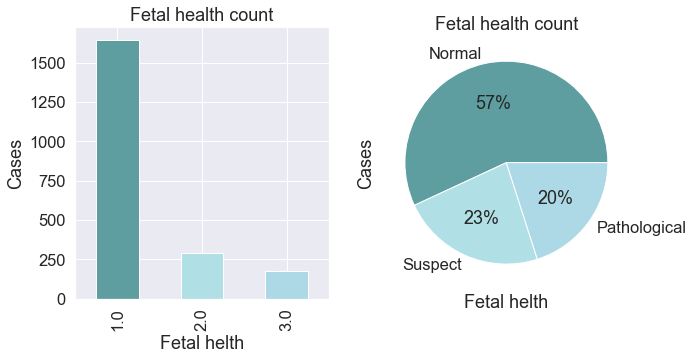

In [39]:
total = df["fetal_health"].sum()
normal = total - 471
suspect = total - 1831
pathological = total - 1950

print(df["fetal_health"].value_counts())

plt.figure(figsize = (10,5))
plt.subplot(121)
# sns.countplot(x="fetal_health", data=data)
vis_fetal_health = df.fetal_health.value_counts().plot(figsize=(10, 5), kind="bar", color = ["#5F9EA0", "#B0E0E6", "#ADD8E6"])
plt.title("Fetal health count")
plt.xlabel("Fetal helth")
plt.ylabel("Cases")


plt.subplot(122)
# plt.pie([normal, suspect, pathological], labels=["Normal", "Suspect", "Pathological"], autopct="%1.0f%%")
plt.title("Fetal state") 

vis_pie_fetal_health = plt.pie([normal, suspect, pathological], labels=["Normal", "Suspect", "Pathological"], colors = ["#5F9EA0", "#B0E0E6", "#ADD8E6"], autopct="%1.0f%%")
plt.title("Fetal health count")
plt.xlabel("Fetal helth")
plt.ylabel("Cases")


plt.show()

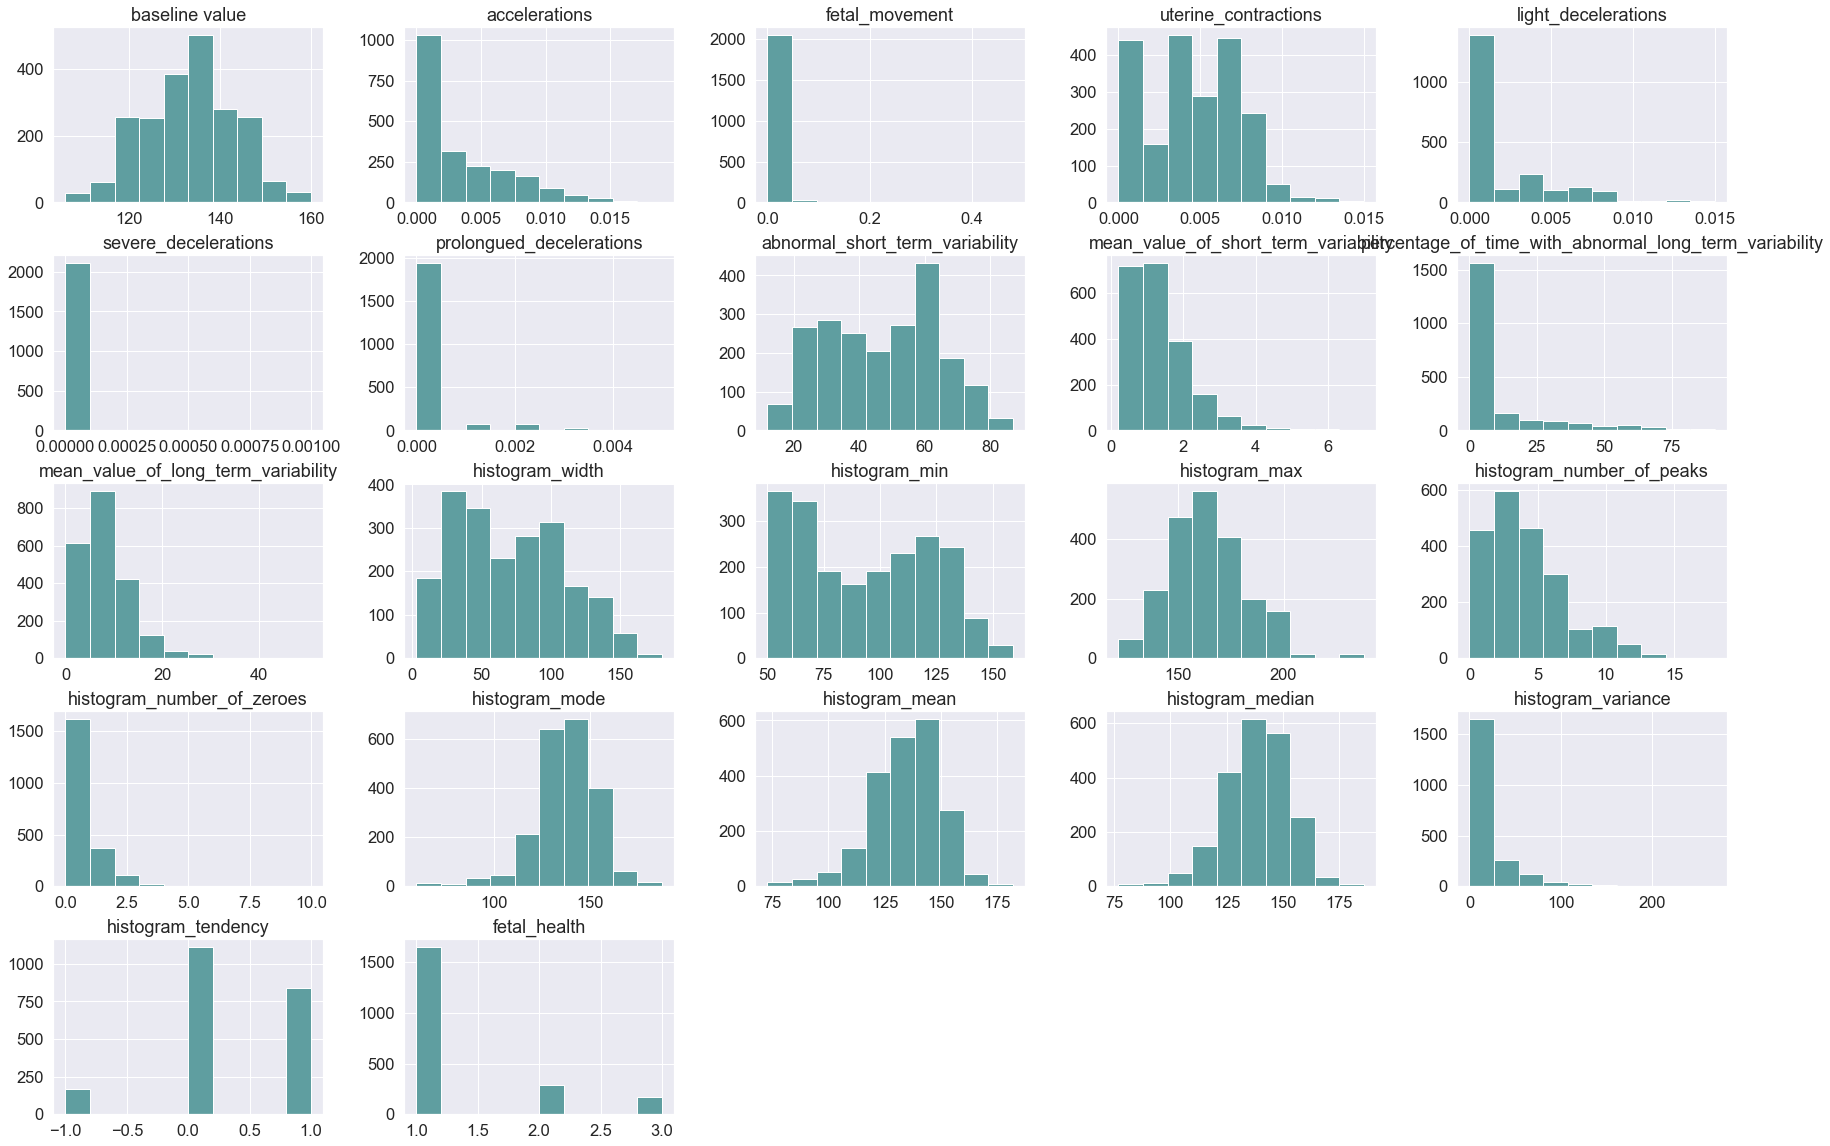

In [40]:
fetal_hist_plot = df.hist(figsize = (30,20), color = "#5F9EA0")

Text(0.5, 1.0, 'Confusion_Matrix of data')

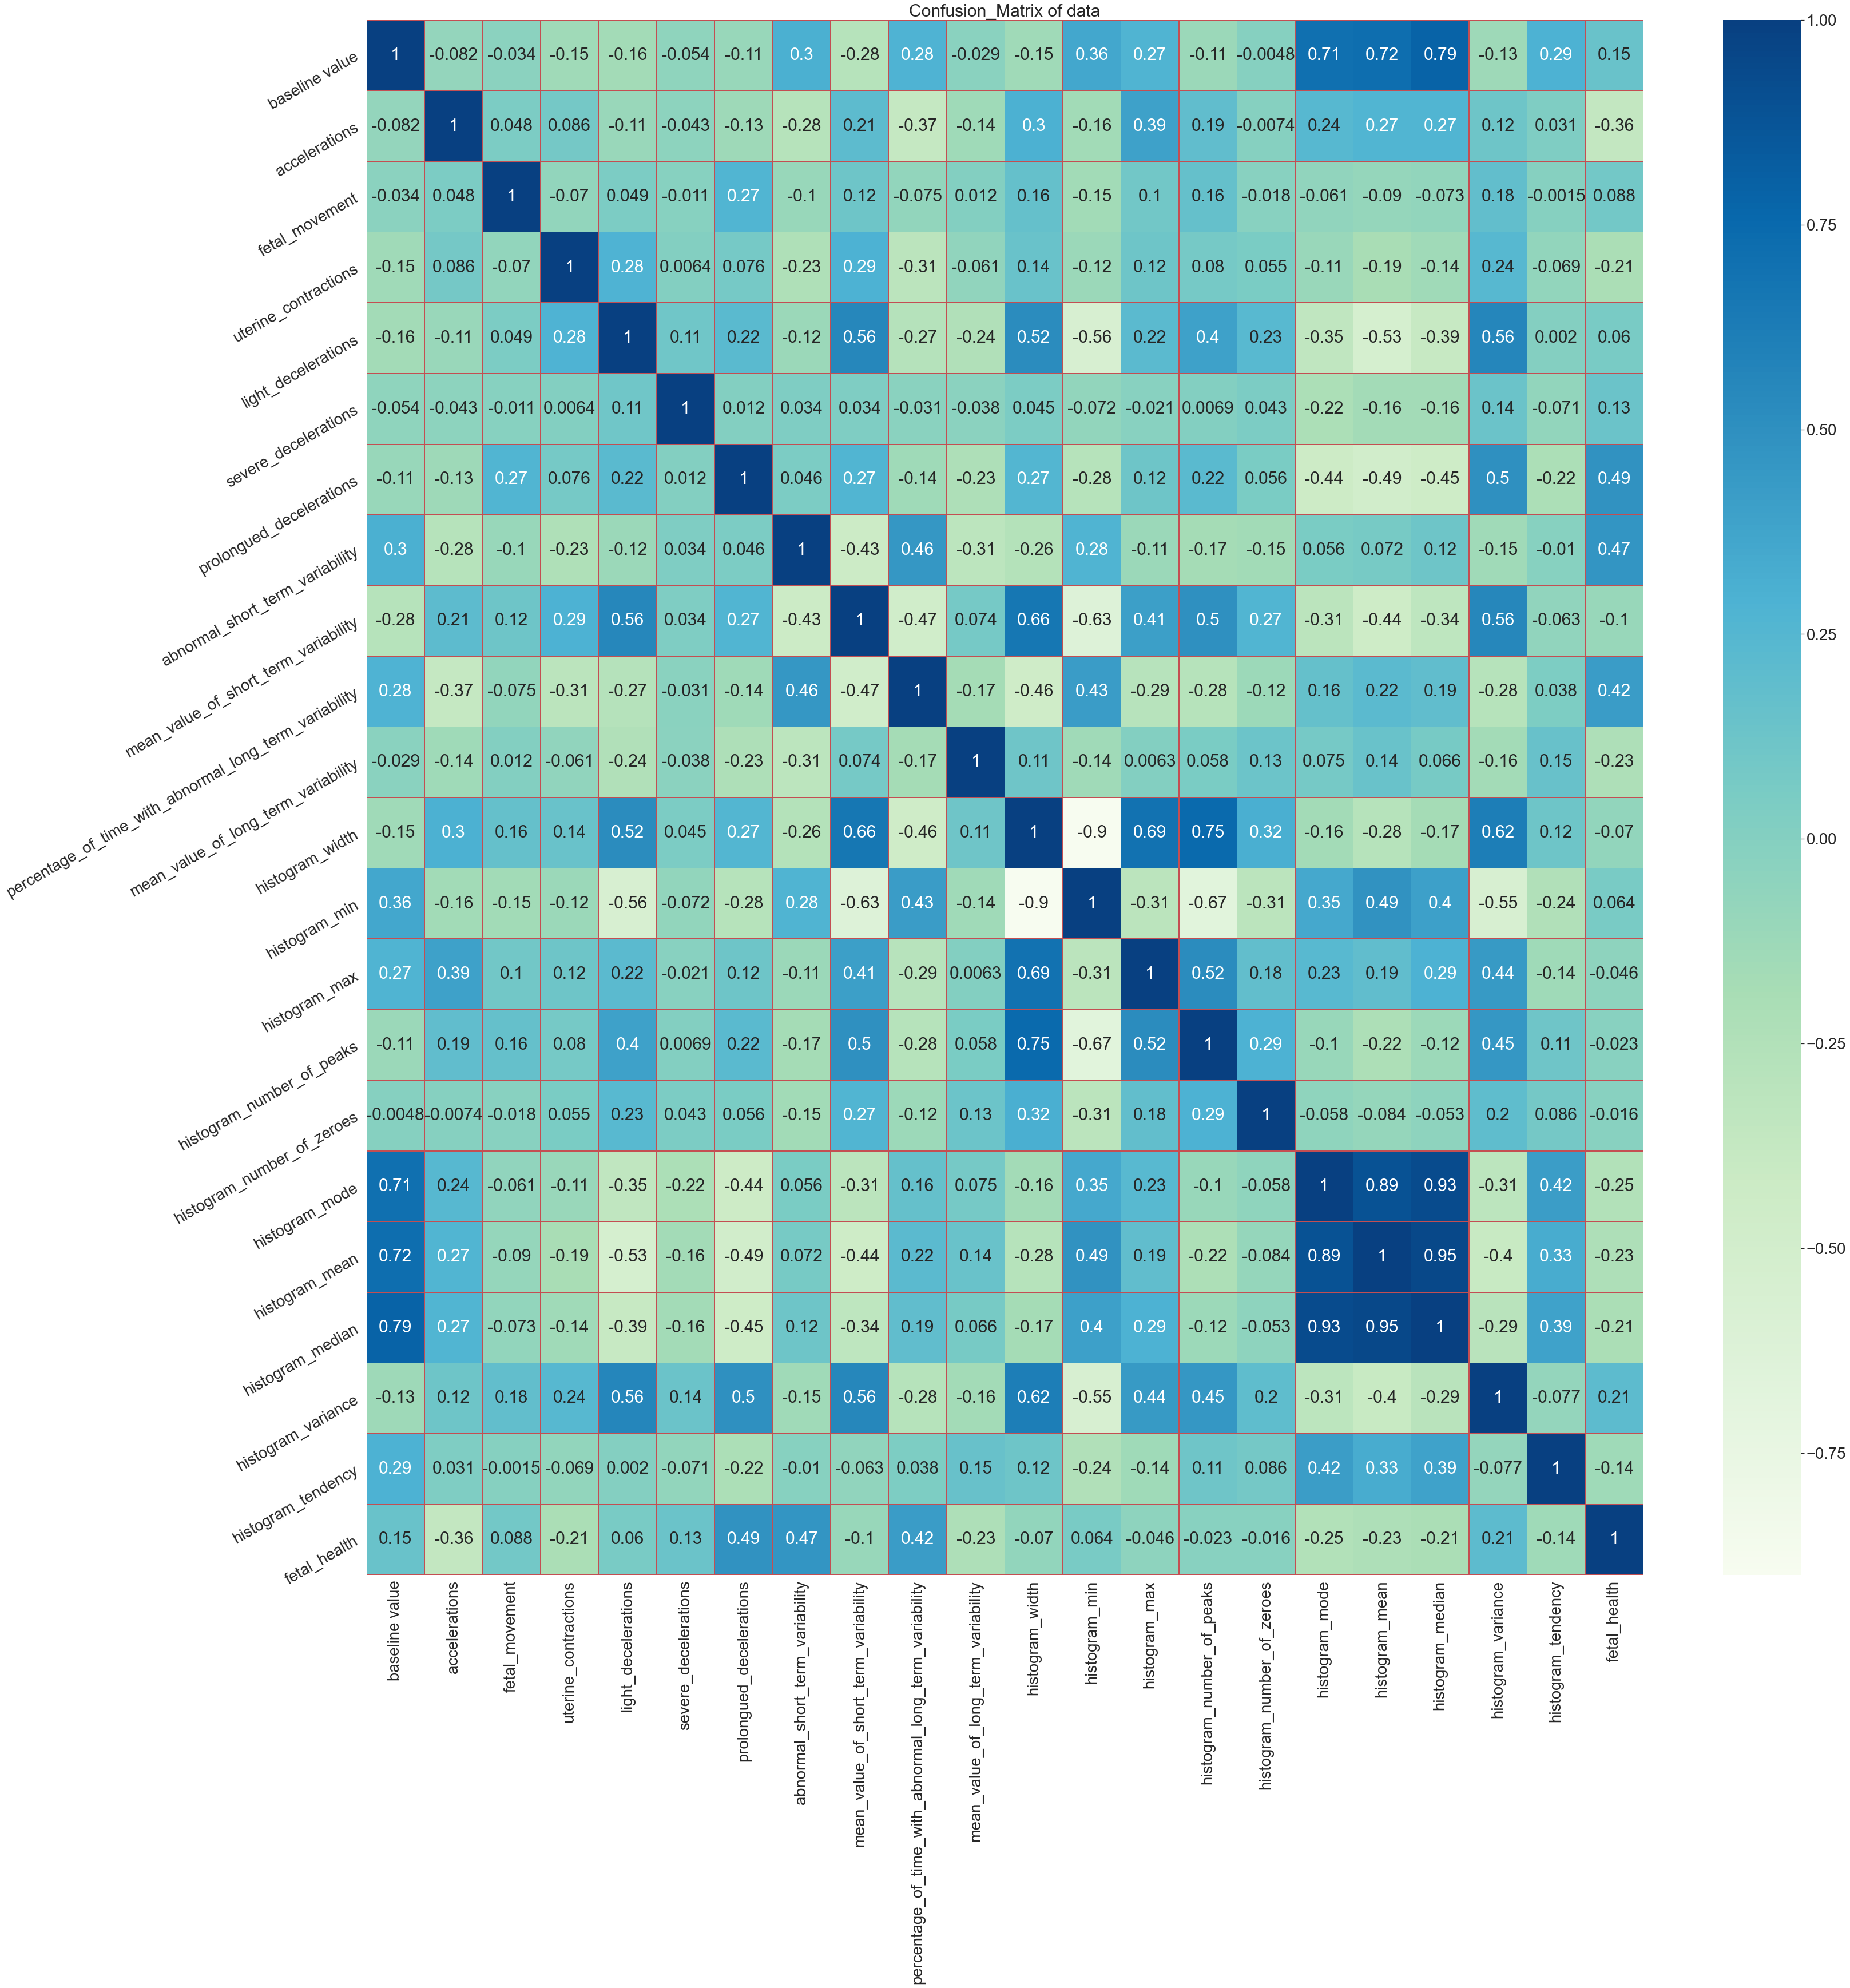

In [41]:
# Visualize The Feathure Correlations ::
sns.set( rc = {"figure.figsize" : [50 , 50]} , font_scale=2.5)
sns.heatmap(Con_Matrix , annot=True , cmap="GnBu" , linecolor="r" , linewidths=0.5)
plt.xticks(rotation = 90)
plt.yticks(rotation = 30)
plt.title("Confusion_Matrix of data")
# RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r

* Based on the correlation matix, it is clear that "accelerations","prolongued_decelerations", "abnormal_short_term_variability", "percentage_of_time_with_abnormal_long_term_variability" and "mean_value_of_long_term_variability" are the features with higher correlation with fetal_health. Let's have a closer look at these with fetal_movement on y axis. This will provide a clearer picture of trends that indicate fetus health.

In [42]:
df.columns

Index(['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency',
       'fetal_health'],
      dtype='object')

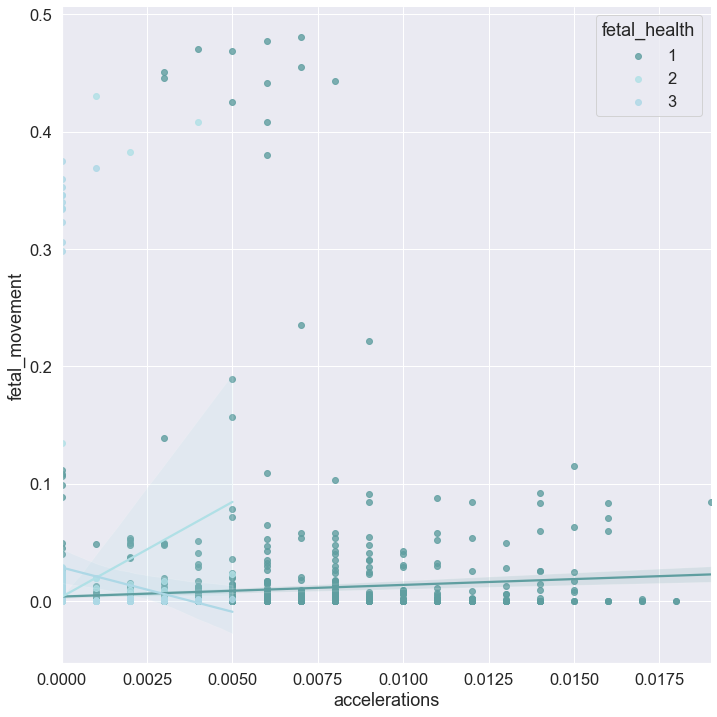

In [116]:
sns.set( rc = {"figure.figsize" : [20 , 20]} , font_scale=1.5)
colours=["#5F9EA0", "#B0E0E6", "#ADD8E6"]
sns.lmplot(data = df , x = "accelerations" , y = "fetal_movement" , palette = colours , hue = "fetal_health" , legend_out = False , height=10)
plt.show()

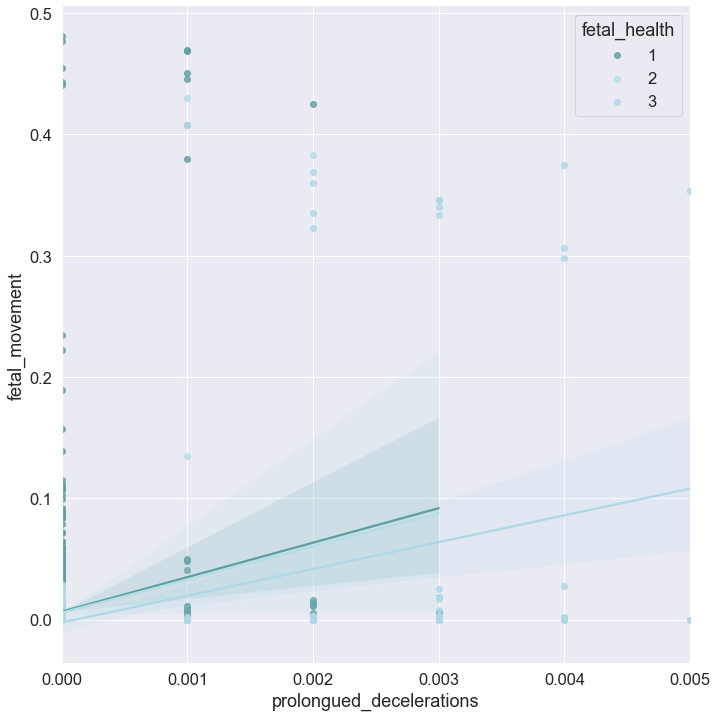

In [117]:
sns.lmplot(data = df , x = "prolongued_decelerations" , y = "fetal_movement" , palette = colours , hue = "fetal_health" , legend_out = False , height=10)
plt.show()


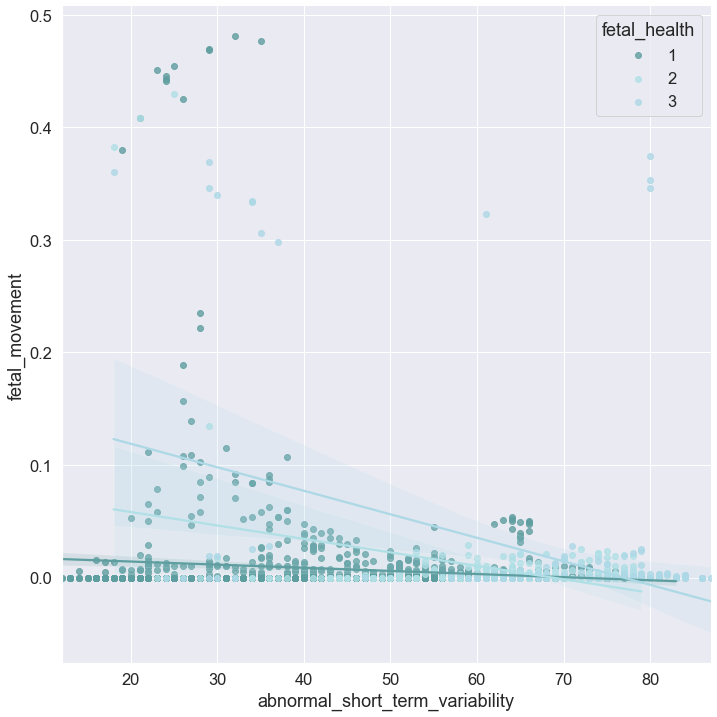

In [118]:
sns.lmplot(data = df , x = "abnormal_short_term_variability", y = "fetal_movement" , palette = colours , hue = "fetal_health" , legend_out = False , height=10)
plt.show()

In [112]:
# columns for detailed visualisation
cols=['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability']

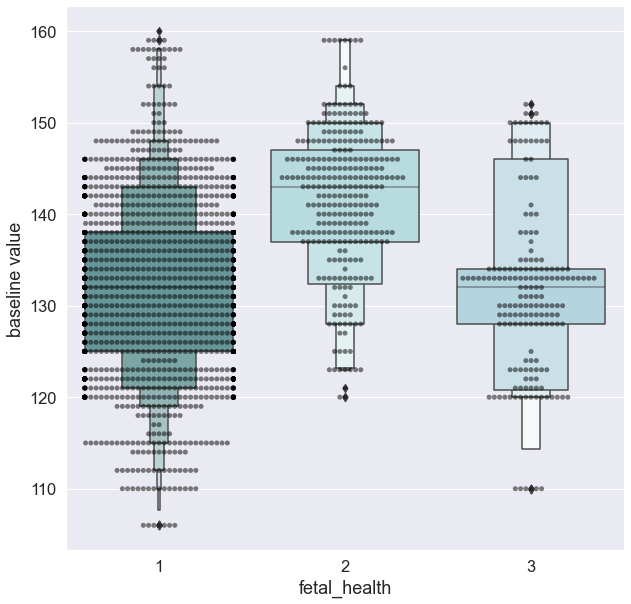

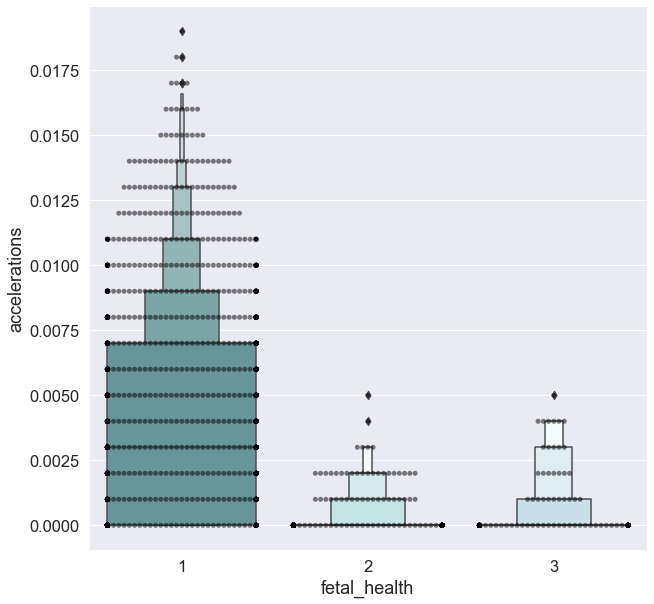

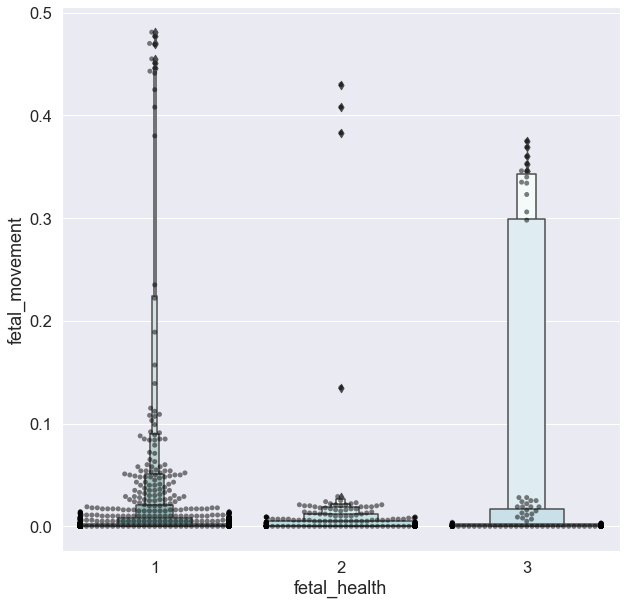

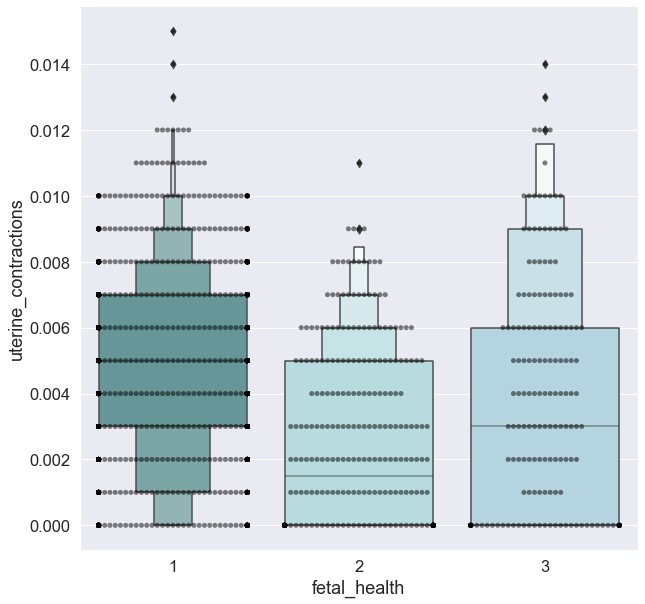

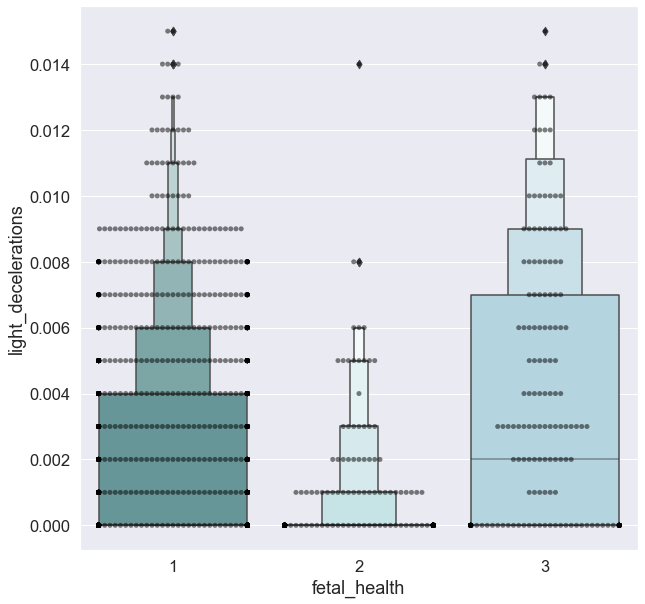

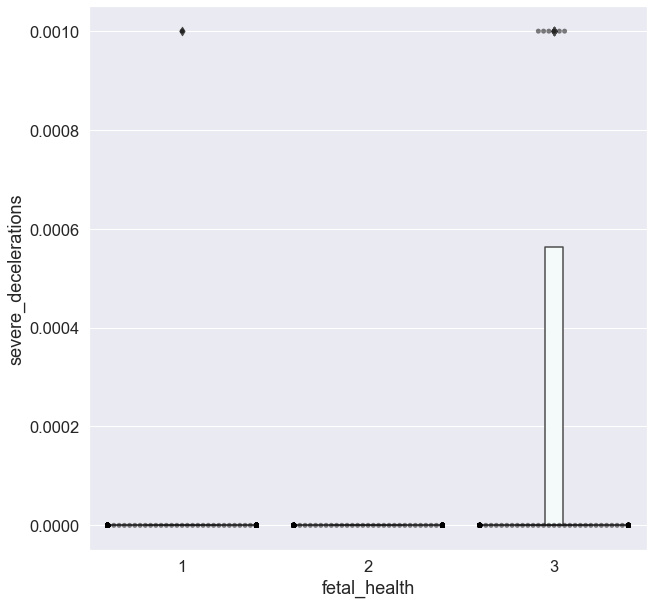

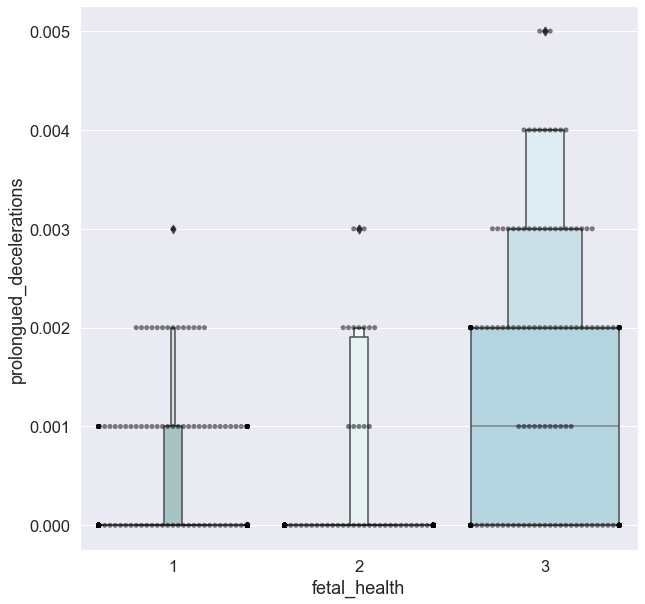

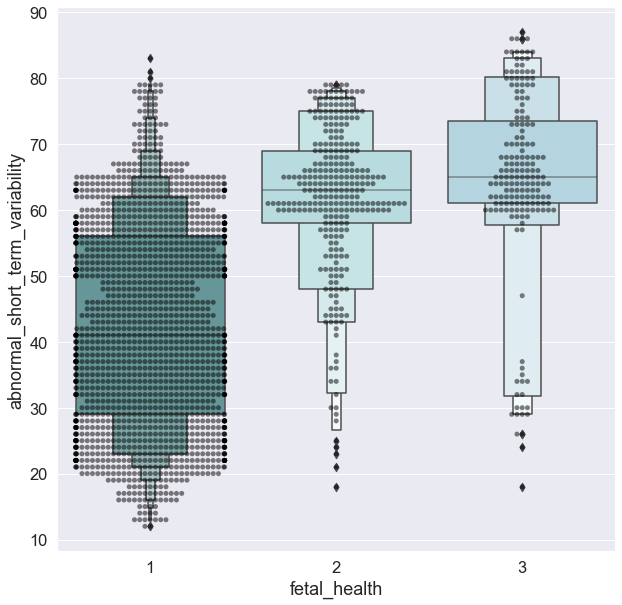

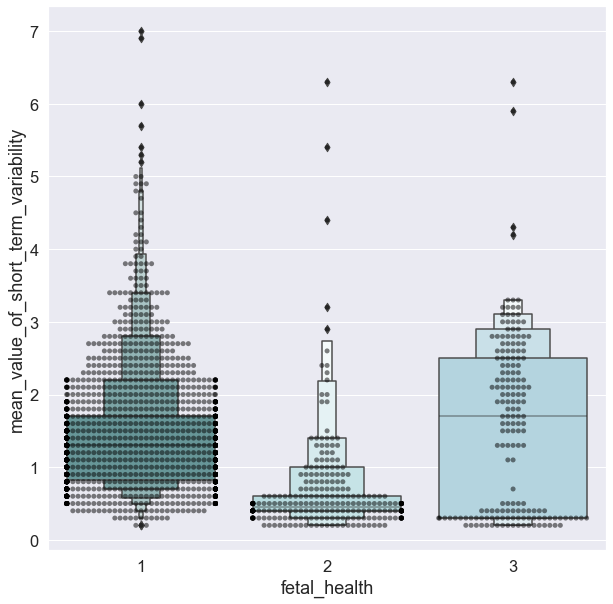

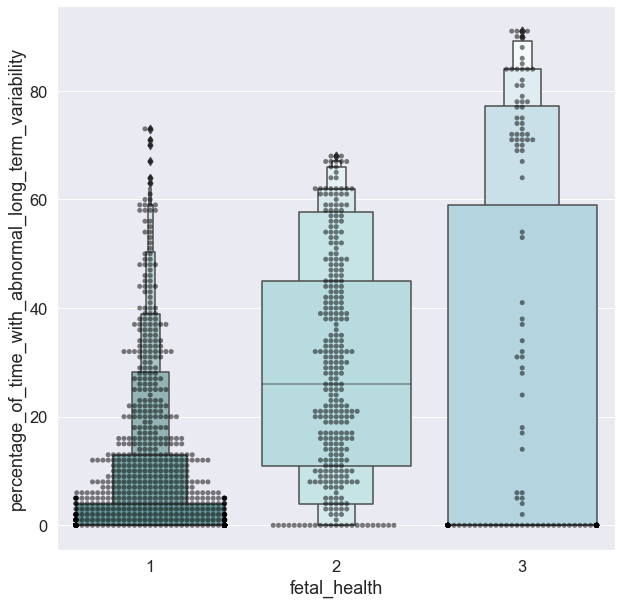

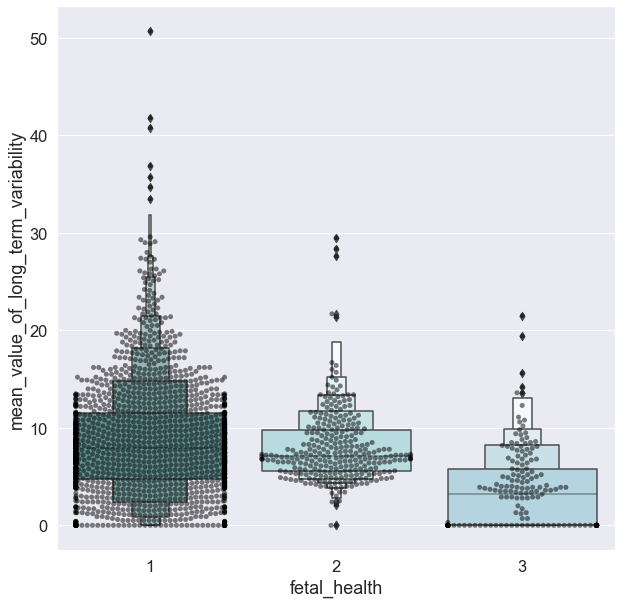

In [114]:
for i in cols:
    sns.swarmplot(x = df["fetal_health"], y = df[i], color= "black", alpha = 0.5 )
    sns.boxenplot(x = df["fetal_health"], y = df [i], palette = colours)
    plt.show()

* from the result above we can see some observations ::
****************************************
* I spotted outliers on our dataset. However, it is not quite a good idea to remove them yet as it may lead to overfitting. Though we may end up with better statistics.

* A basic rule of thumb for the outliers in question is:

* It is a measurement error or data entry error, correct the error if possible. If you can’t fix it, remove that observation. In our case, this is the outcome of a CTG report so it is unlikely that this was a data entry error.

* If it is not a part of the population you are studying, you can legitimately remove the outlier. In this case, this all is about the fetus, and experts tag the classification. Let's stick with the expert opinion.

* Thus assuming that these are the natural part of the population we are studying, we should not remove it.

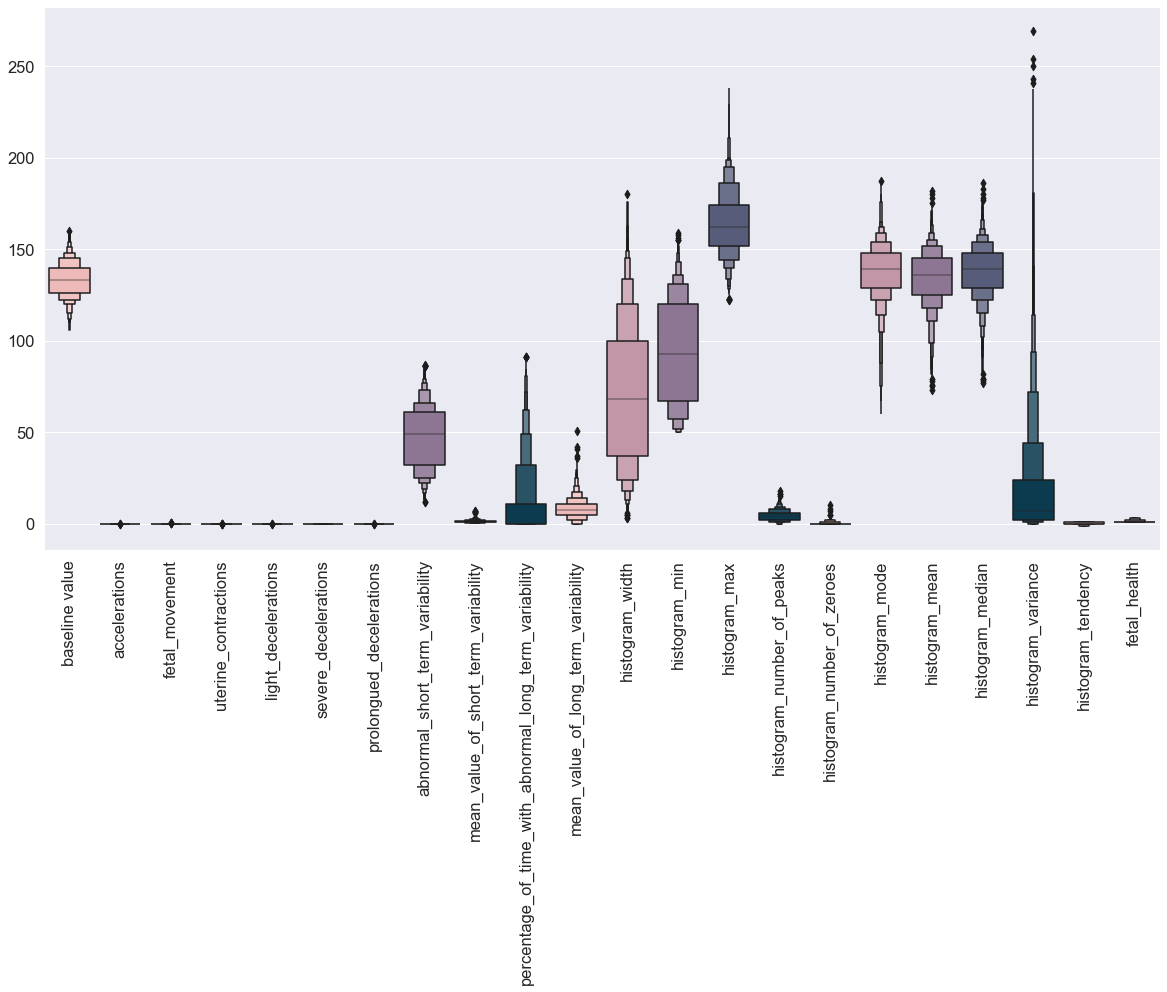

In [52]:
shades =["#f7b2b0","#c98ea6","#8f7198","#50587f", "#003f5c"]
plt.figure(figsize=(20,10))
sns.boxenplot(data = df , palette = shades)
plt.xticks(rotation=90)
plt.show()

* The above plot shows the range of our feature attributes. All the features are in different ranges. To fit this in a model we must scale it to the same range.

* In the model building, we will preprocess the features to do the same.

Text(0.5, 1.0, 'Box Plot of fetal_health and baseline value ')

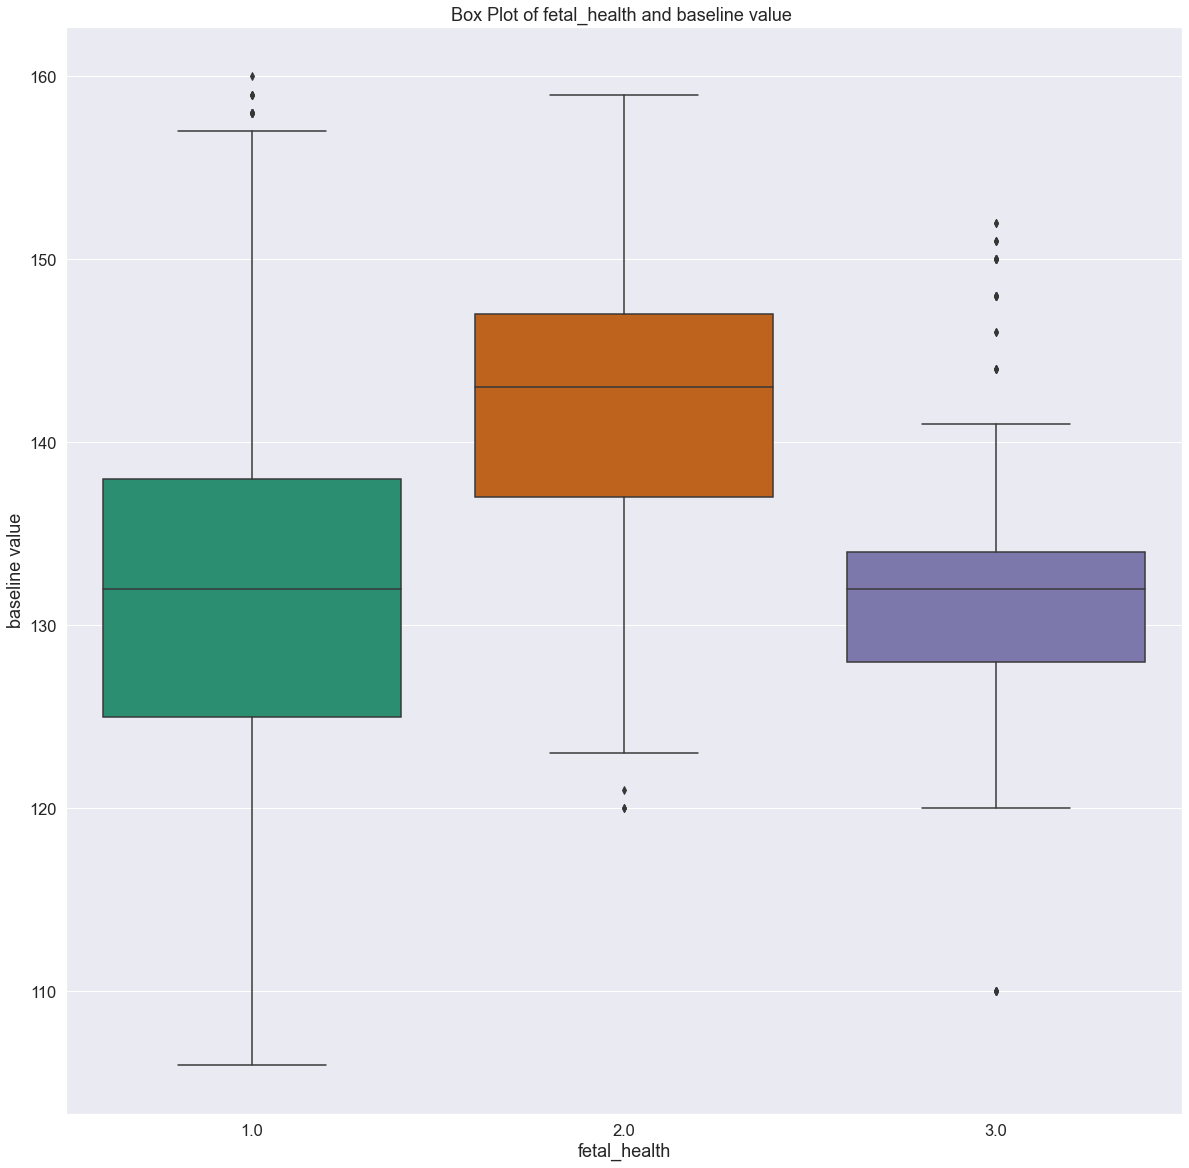

In [53]:
sns.boxplot( x = "fetal_health" , y = "baseline value" , data = df , palette="Dark2" )
plt.title("Box Plot of fetal_health and baseline value ")

Text(0.5, 1.0, 'Box Plot of fetal_health and accelerations ')

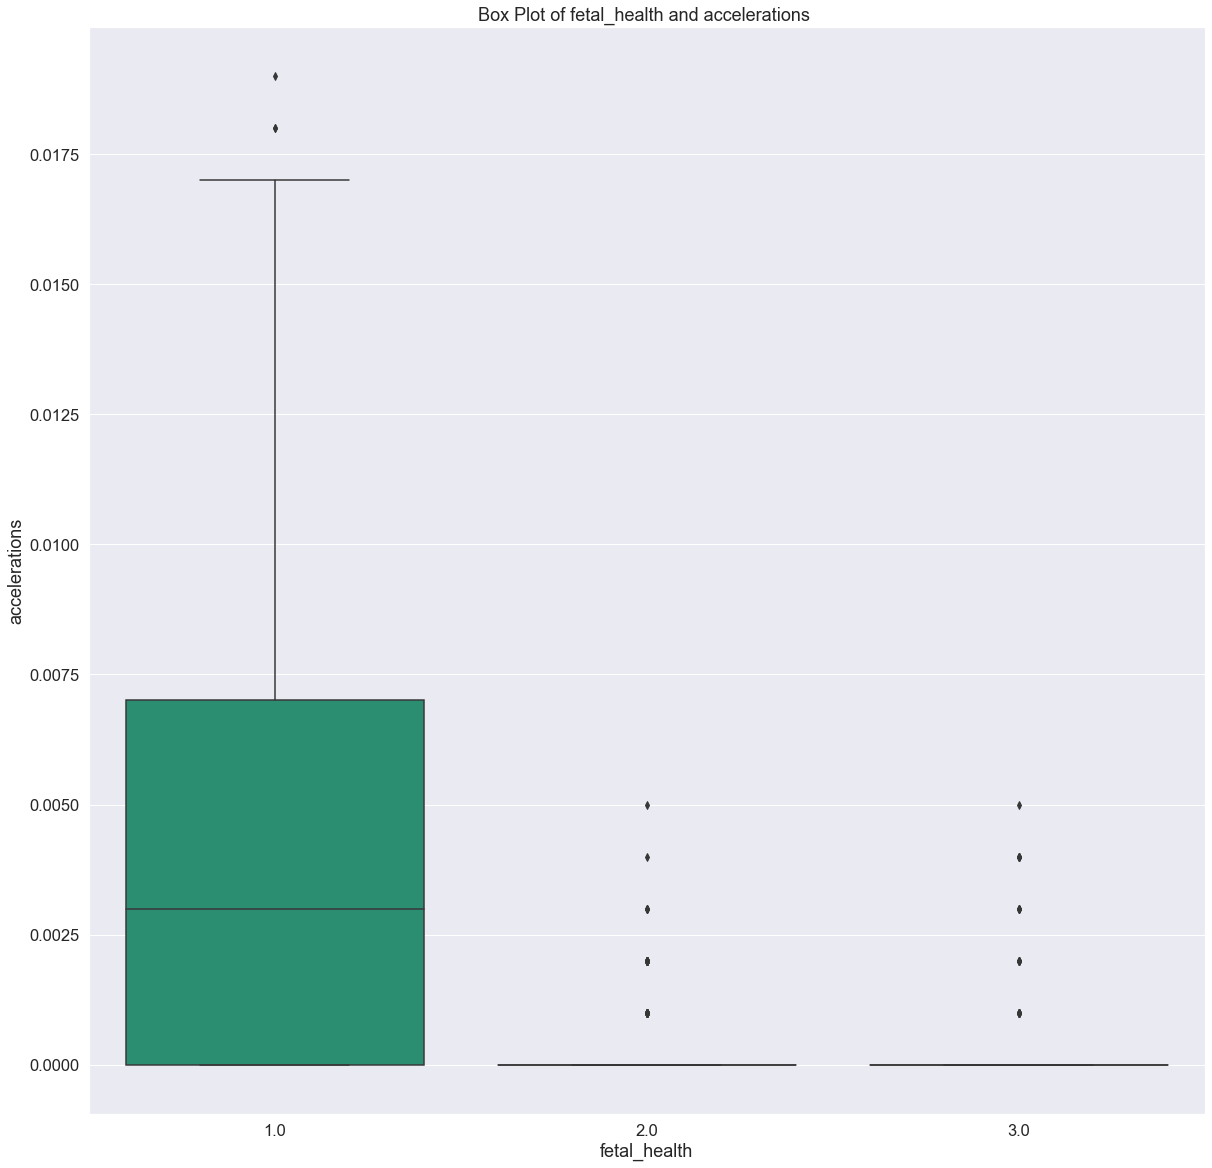

In [54]:
sns.boxplot( x = "fetal_health" , y = "accelerations" , data = df ,  palette="Dark2" )
plt.title("Box Plot of fetal_health and accelerations ")

Text(0.5, 1.0, 'Box Plot of fetal_health and fetal_movement ')

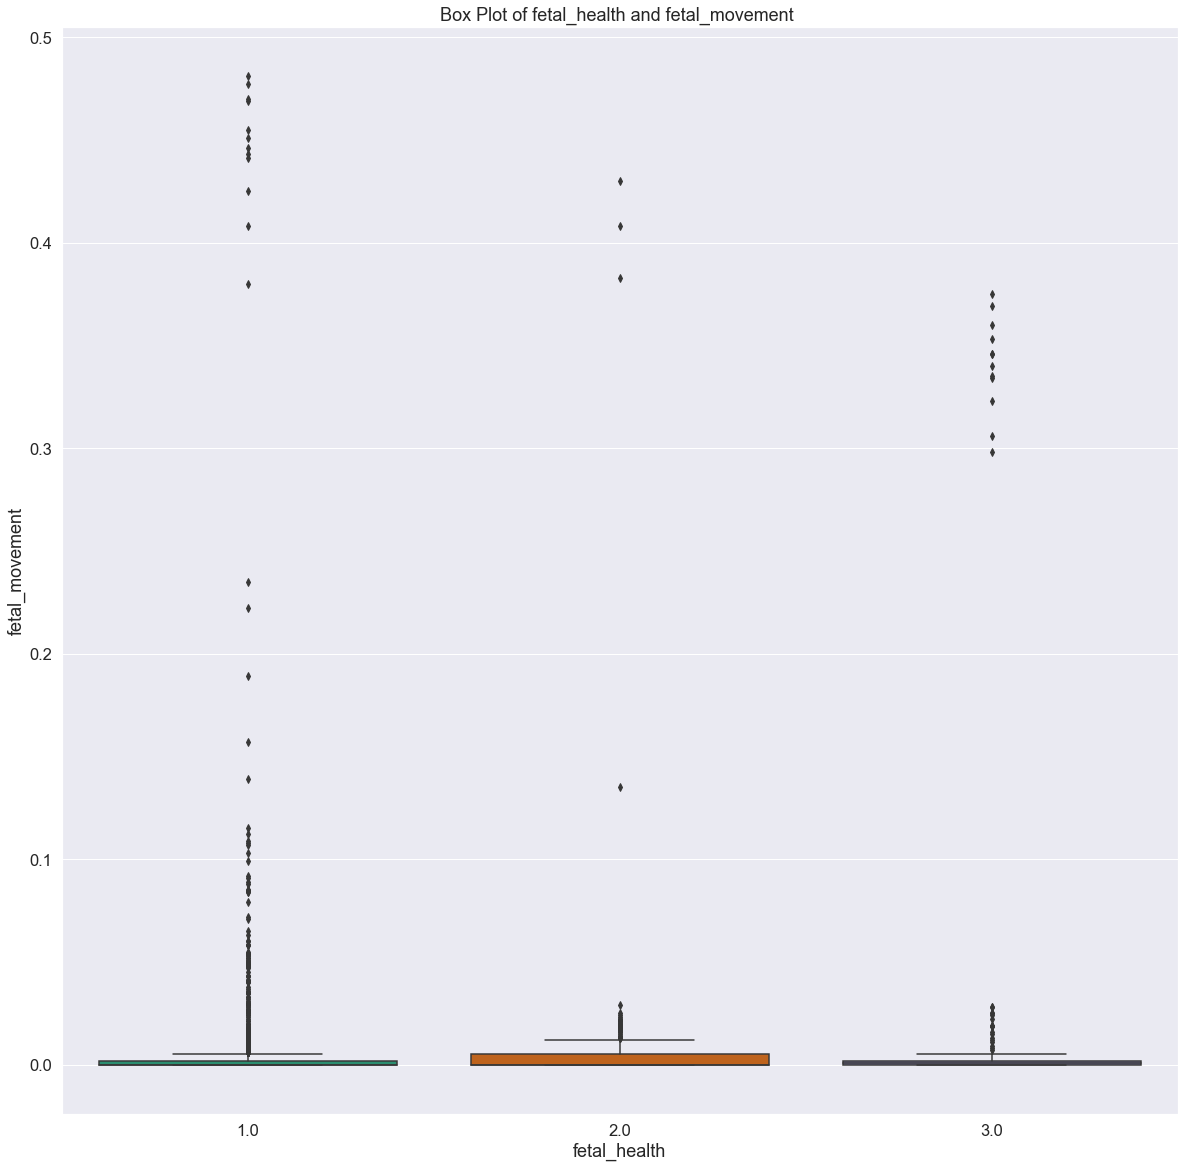

In [55]:
sns.boxplot( x = "fetal_health" , y = "fetal_movement" , data = df ,  palette="Dark2" )
plt.title("Box Plot of fetal_health and fetal_movement ")

Text(0.5, 1.0, 'Box Plot of fetal_health and uterine_contractions ')

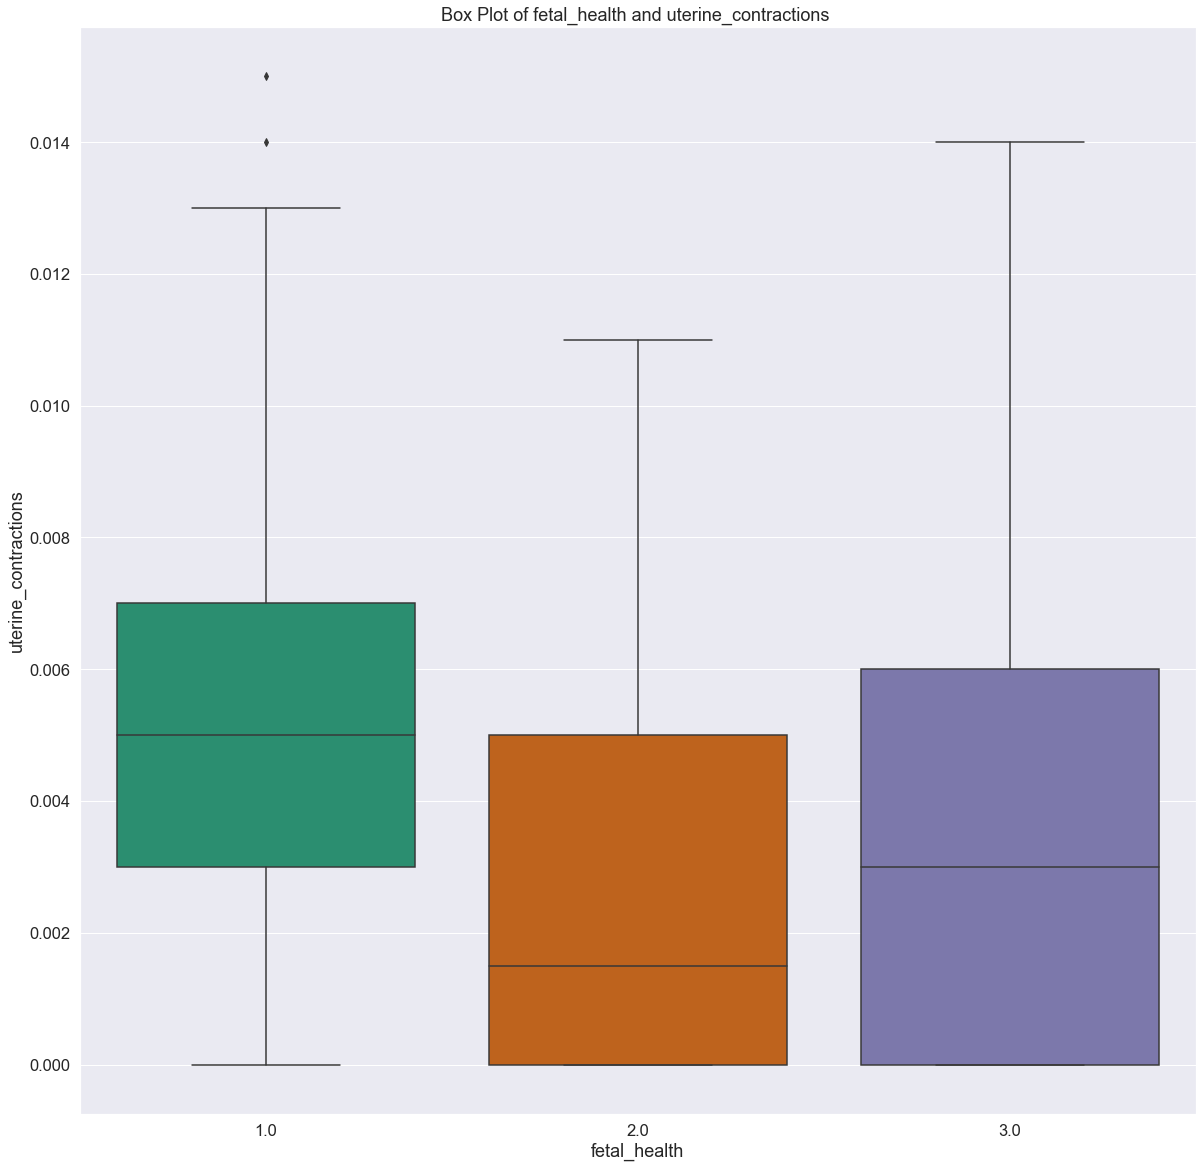

In [56]:
sns.boxplot( x = "fetal_health" , y = "uterine_contractions" , data = df ,  palette="Dark2" )
plt.title("Box Plot of fetal_health and uterine_contractions ")

Text(0.5, 1.0, 'Box Plot of fetal_health and light_decelerations ')

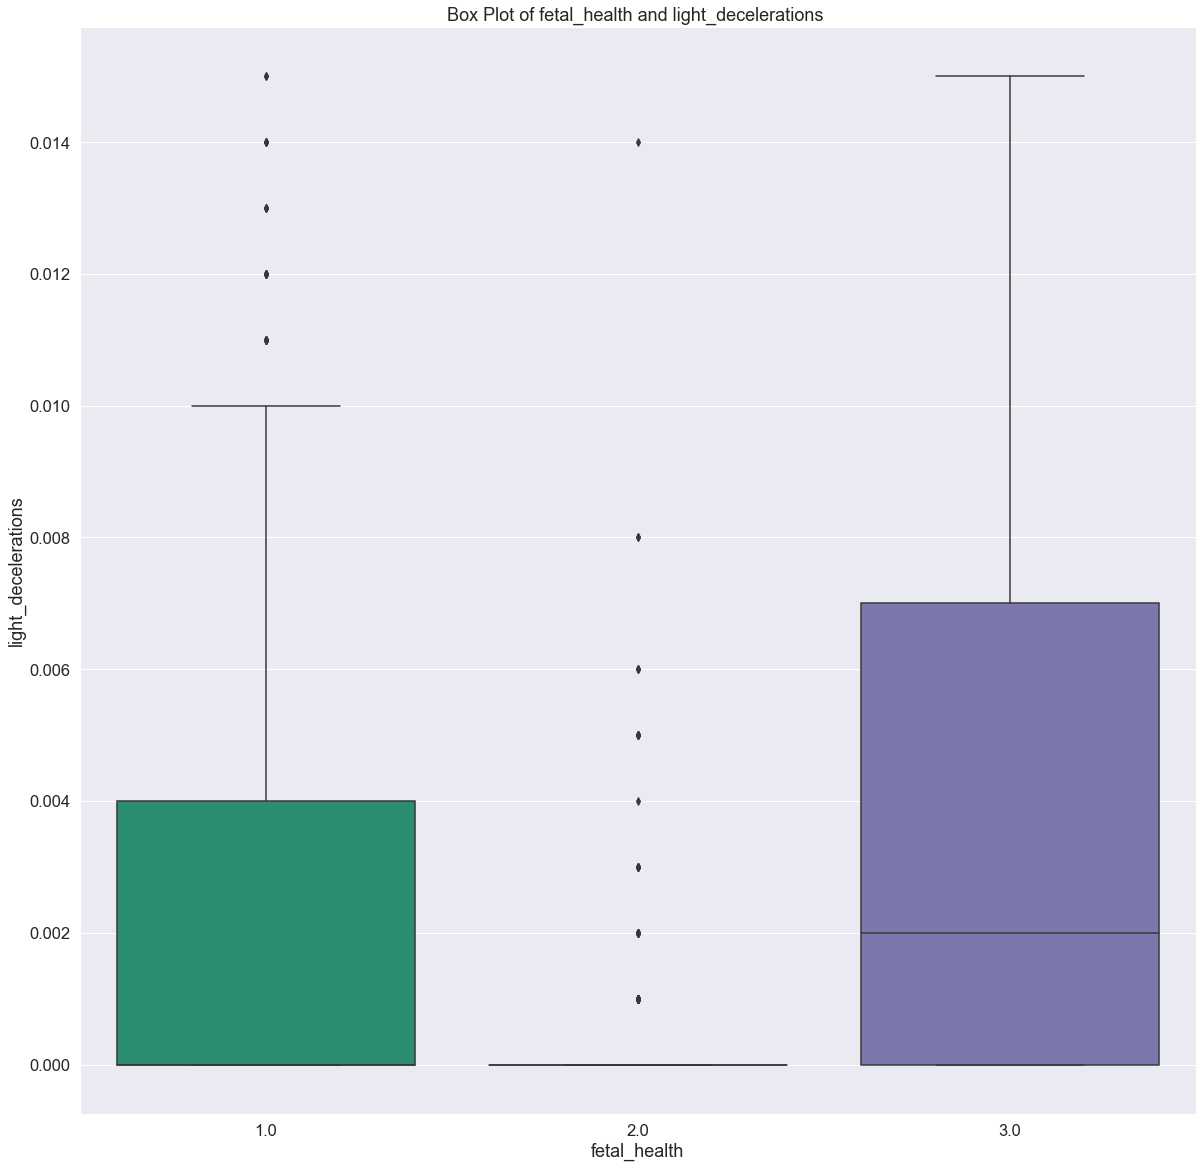

In [57]:
sns.boxplot( x = "fetal_health" , y = "light_decelerations" , data = df ,  palette="Dark2" )
plt.title("Box Plot of fetal_health and light_decelerations ")

Text(0.5, 1.0, 'Box Plot of fetal_health and severe_decelerations ')

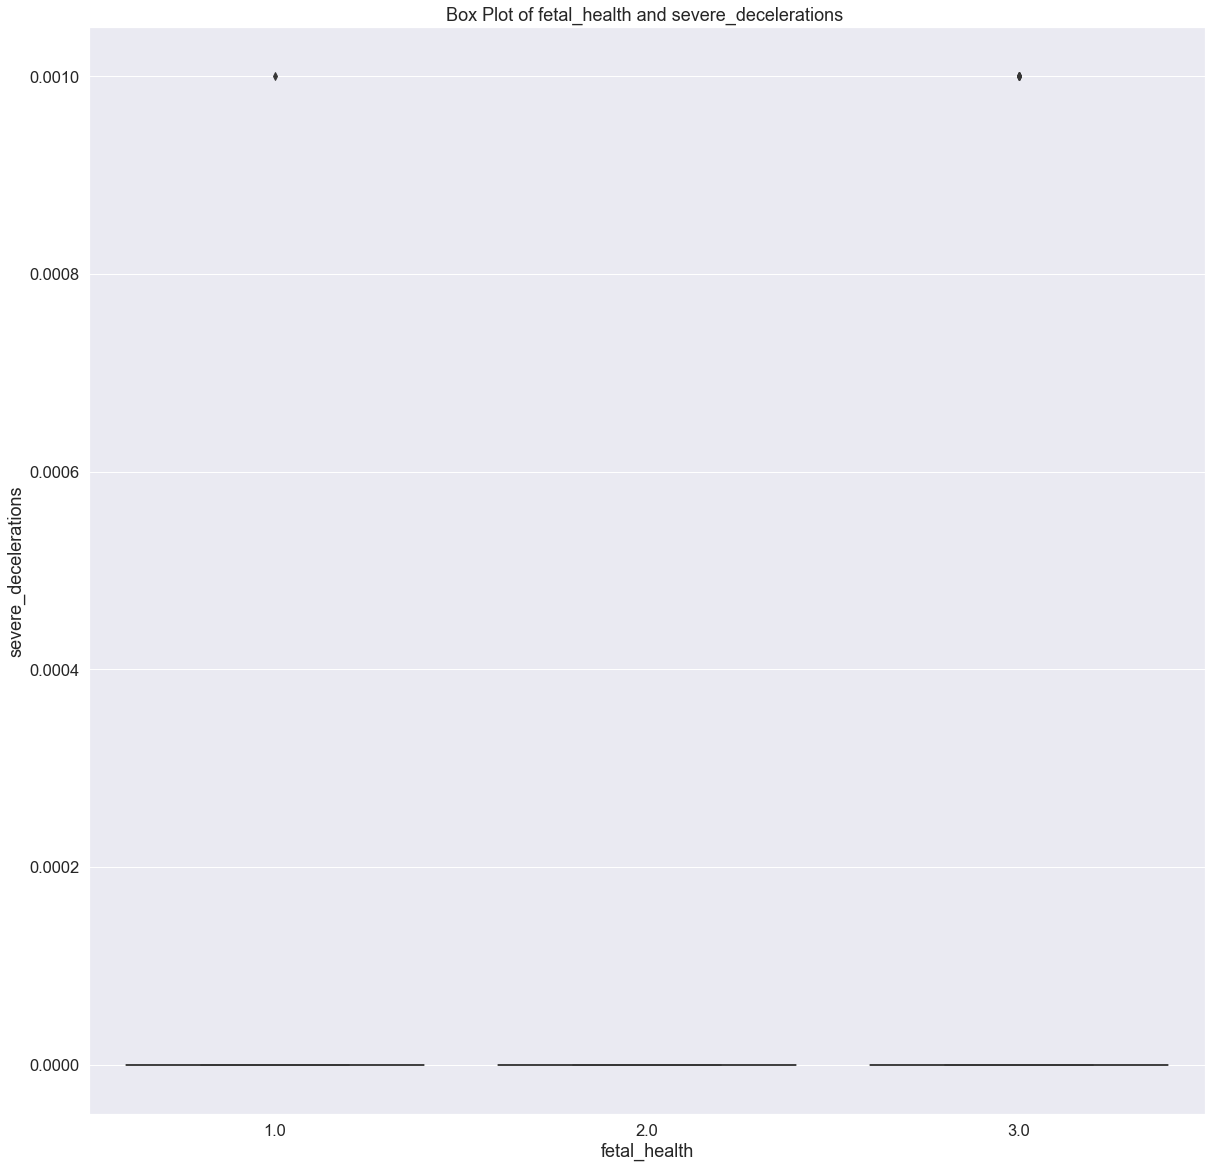

In [58]:
sns.boxplot( x = "fetal_health" , y = "severe_decelerations" , data = df ,  palette="Dark2" )
plt.title("Box Plot of fetal_health and severe_decelerations ")

Text(0.5, 1.0, 'Box Plot of fetal_health and prolongued_decelerations ')

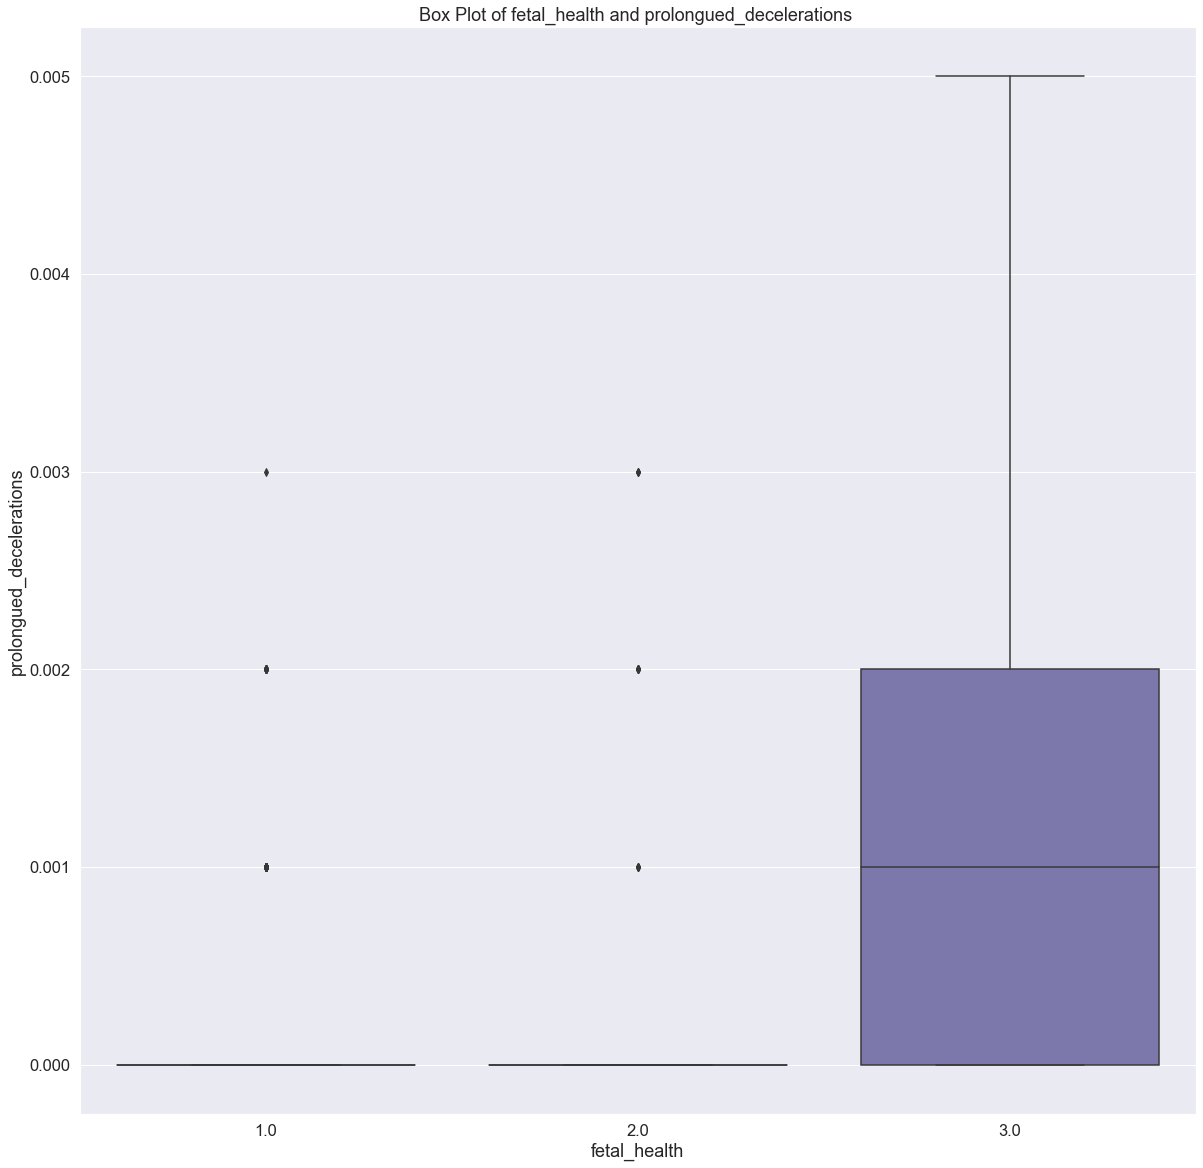

In [59]:
sns.boxplot( x = "fetal_health" , y = "prolongued_decelerations" , data = df ,  palette="Dark2" )
plt.title("Box Plot of fetal_health and prolongued_decelerations ")

Text(0.5, 1.0, 'Box Plot of fetal_health and abnormal_short_term_variability ')

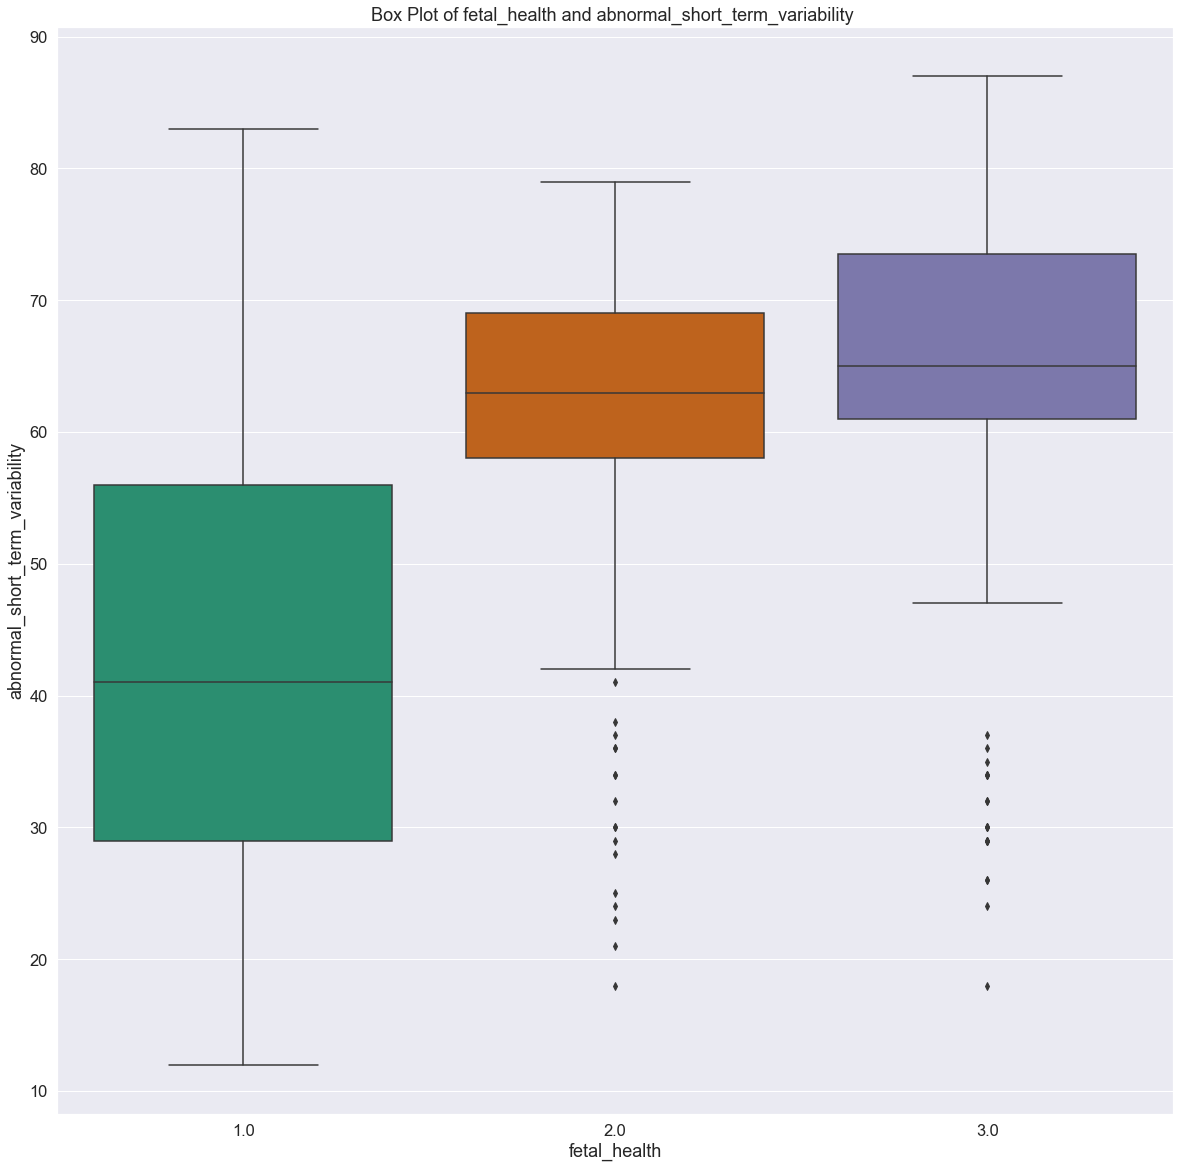

In [60]:
sns.boxplot( x = "fetal_health" , y = "abnormal_short_term_variability" , data = df ,  palette="Dark2" )
plt.title("Box Plot of fetal_health and abnormal_short_term_variability ")

Text(0.5, 1.0, 'Box Plot of fetal_health and mean_value_of_short_term_variability ')

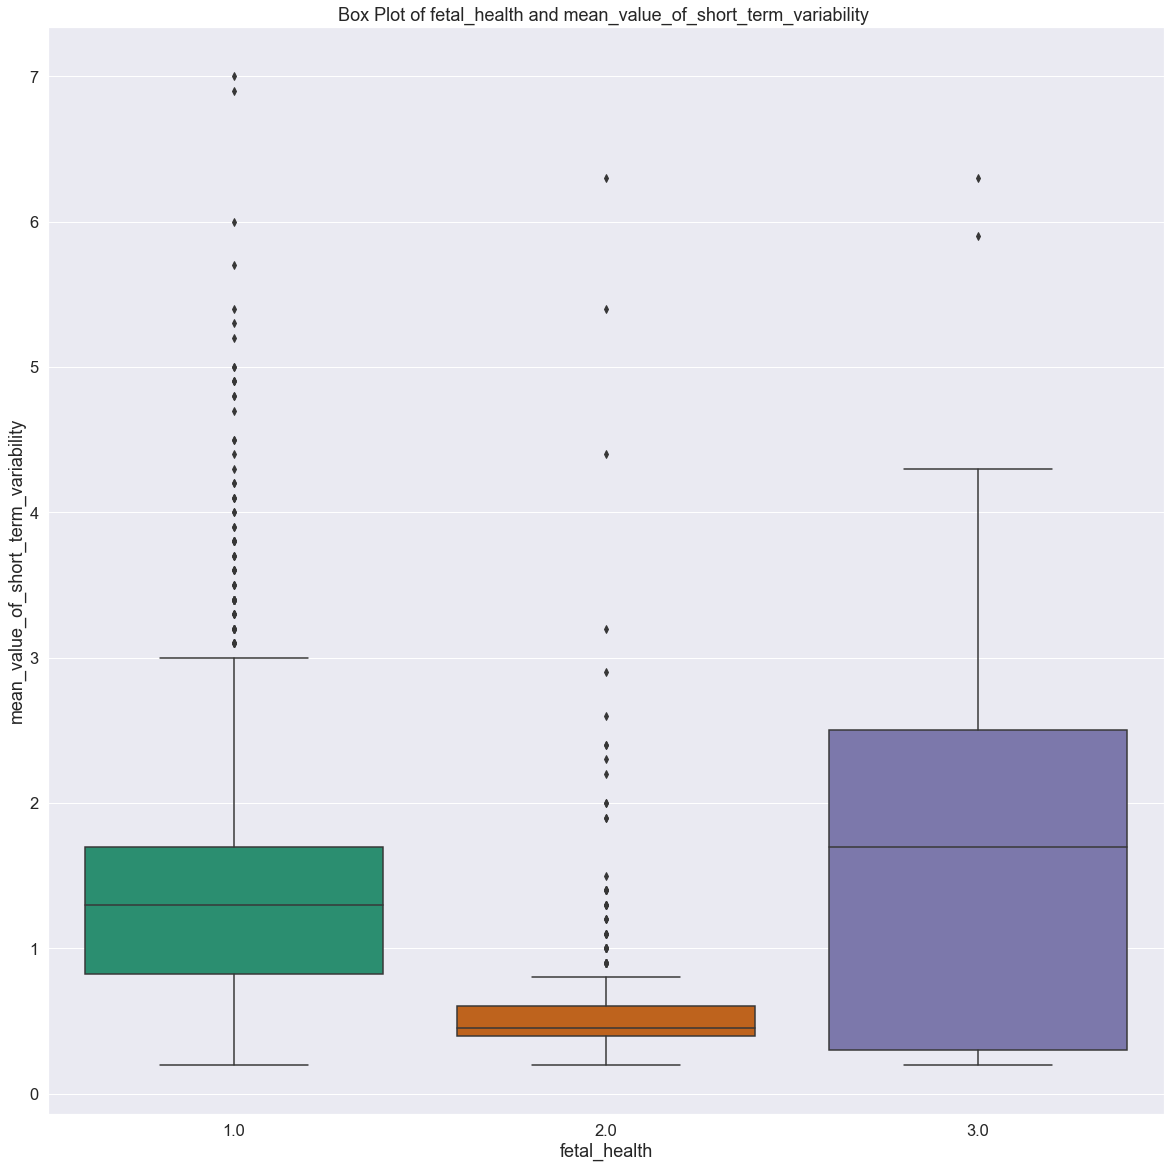

In [61]:
sns.boxplot( x = "fetal_health" , y = "mean_value_of_short_term_variability" , data = df ,  palette="Dark2" )
plt.title("Box Plot of fetal_health and mean_value_of_short_term_variability ")

Text(0.5, 1.0, 'Box Plot of fetal_health and percentage_of_time_with_abnormal_long_term_variability ')

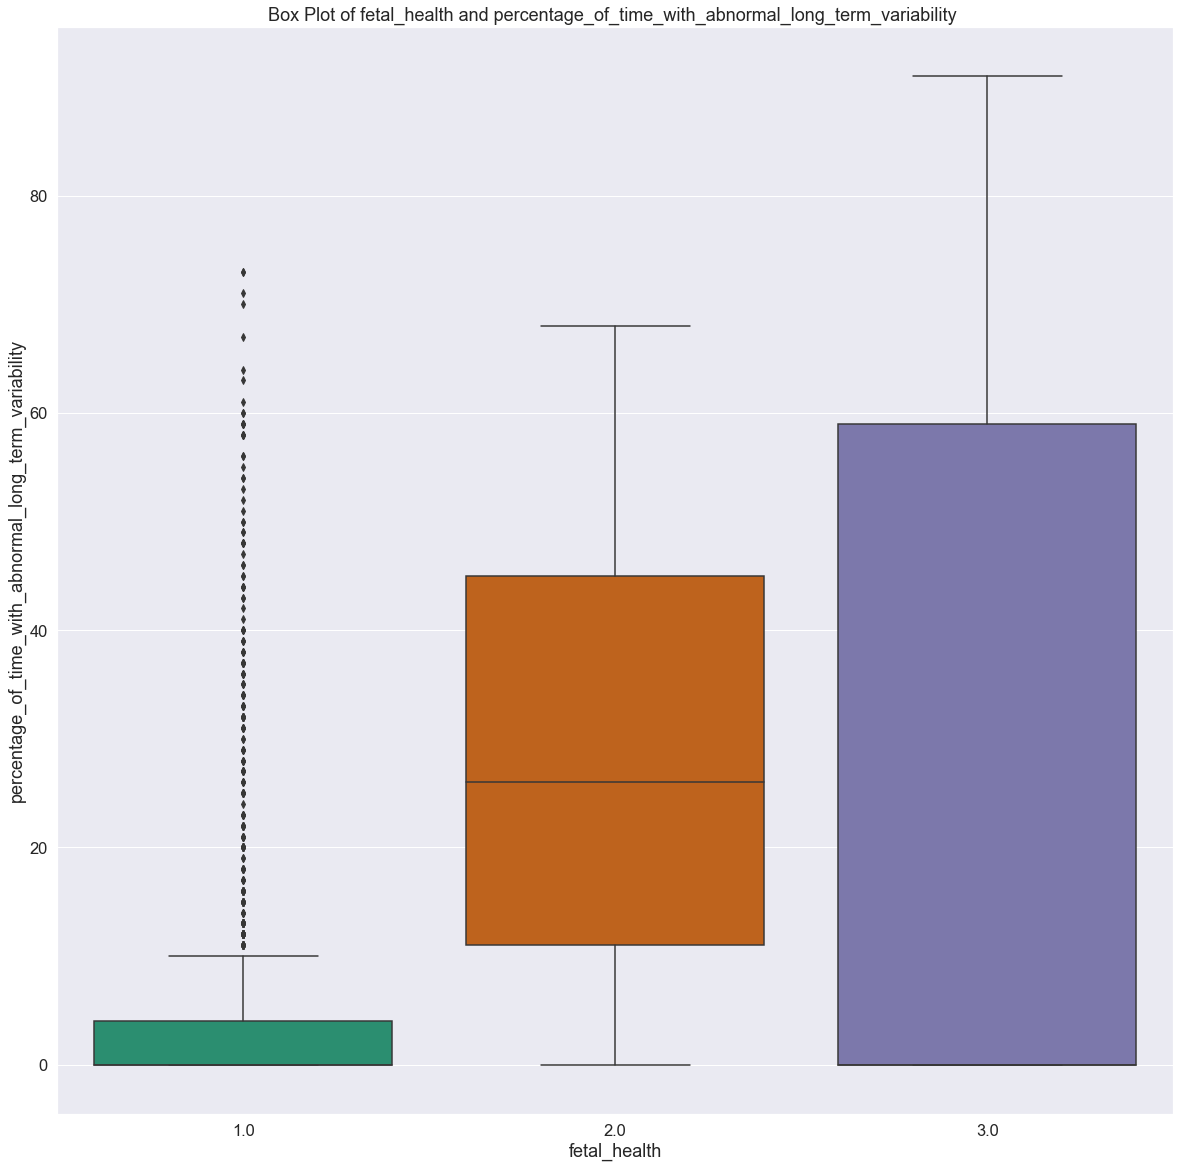

In [62]:
sns.boxplot( x = "fetal_health" , y = "percentage_of_time_with_abnormal_long_term_variability" , data = df ,  palette="Dark2" )
plt.title("Box Plot of fetal_health and percentage_of_time_with_abnormal_long_term_variability ")

Text(0.5, 1.0, 'Box Plot of fetal_health and mean_value_of_long_term_variability ')

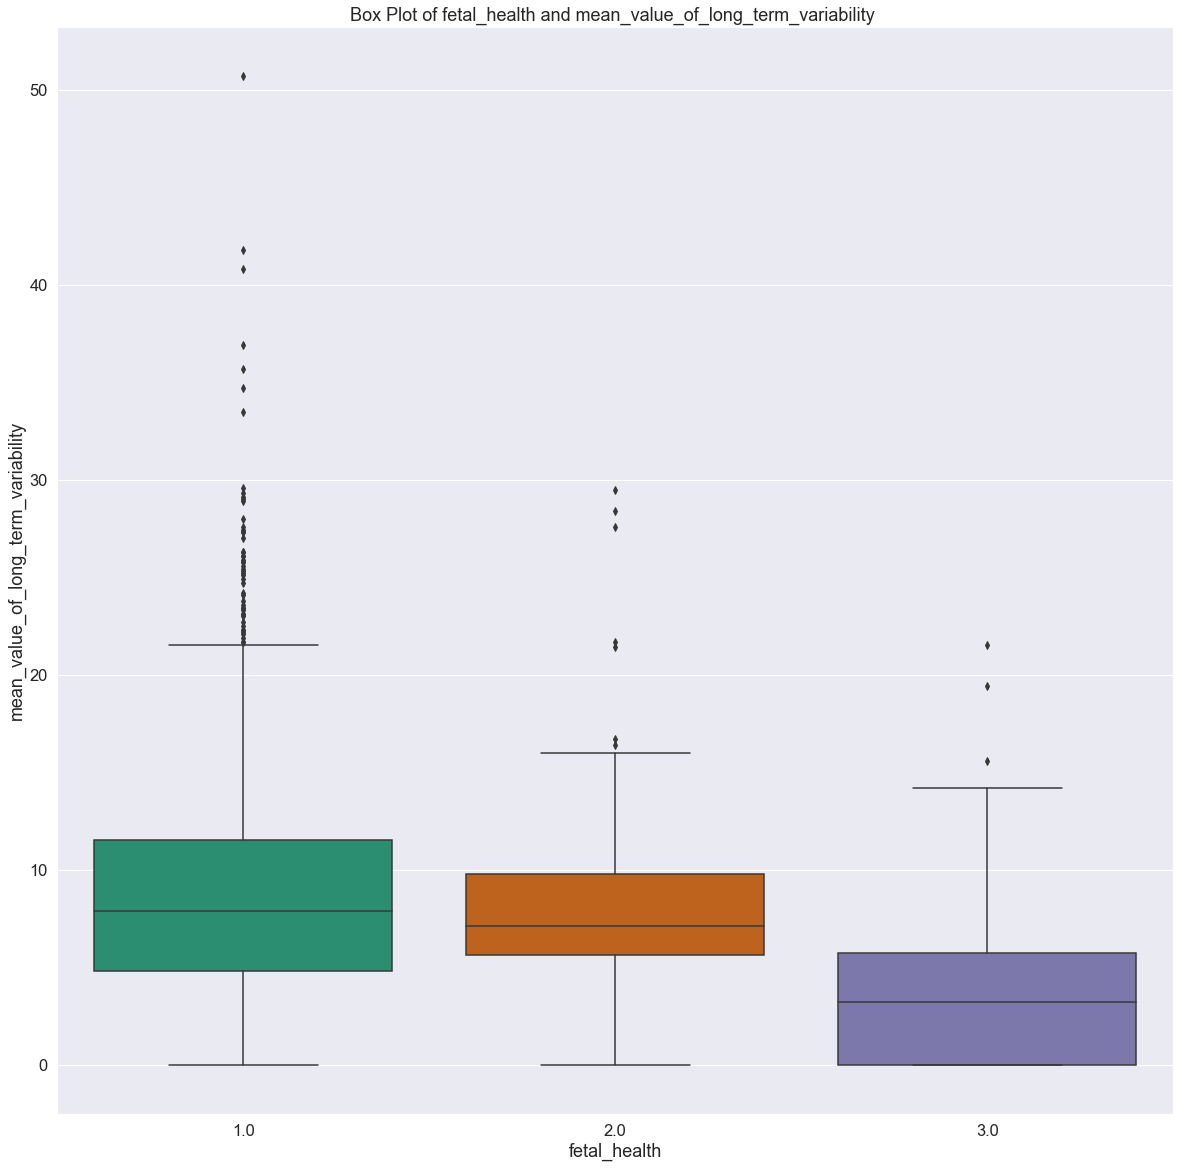

In [63]:
sns.boxplot( x = "fetal_health" , y = "mean_value_of_long_term_variability" , data = df ,  palette="Dark2" )
plt.title("Box Plot of fetal_health and mean_value_of_long_term_variability ")

In [64]:
# get describtion file of data ::

profile = pp.ProfileReport(df , title = "Fetal-health-Report" , explorative=True)
profile.to_widgets()

Summarize dataset:   0%|          | 0/36 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [65]:
# To save report as html file
profile.to_file("Fetal-health-data-Report.html")


Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

<p id = "ETl">ETL-Process</p>

# 1 - Feature_Engineering Technice ::
*********************************************************************
* Its one of the most important phase in data scientist life cycle which use to generate new usefull features from the old  features which not enough for train model.

In [66]:
df

baseline value  accelerations  fetal_movement  uterine_contractions  \
0              120.0          0.000           0.000                 0.000   
1              132.0          0.006           0.000                 0.006   
2              133.0          0.003           0.000                 0.008   
3              134.0          0.003           0.000                 0.008   
4              132.0          0.007           0.000                 0.008   
...              ...            ...             ...                   ...   
2121           140.0          0.000           0.000                 0.007   
2122           140.0          0.001           0.000                 0.007   
2123           140.0          0.001           0.000                 0.007   
2124           140.0          0.001           0.000                 0.006   
2125           142.0          0.002           0.002                 0.008   

      light_decelerations  severe_decelerations  prolongued_decelerations  \
0                   0.000                   0.0                       0.0   
1                   0.003                   0.0                       0.0   
2                   0.003                   0.0                       0.0   
3                   0.003                   0.0                       0.0   
4                   0.000                   0.0                       0.0   
...                   ...                   ...                       ...   
2121                0.000                   0.0                       0.0   
2122                0.000                   0.0                       0.0   
2123                0.000                   0.0                       0.0   
2124                0.000                   0.0                       0.0   
2125                0.000                   0.0                       0.0   

      abnormal_short_term_variability  mean_value_of_short_term_variability  \
0                                73.0                                   0.5   
1                                17.0                                   2.1   
2                                16.0                                   2.1   
3                                16.0                                   2.4   
4                                16.0                                   2.4   
...                               ...                                   ...   
2121                             79.0                                   0.2   
2122                             78.0                                   0.4   
2123                             79.0                                   0.4   
2124                             78.0                                   0.4   
2125                             74.0                                   0.4   

      percentage_of_time_with_abnormal_long_term_variability  ...  \
0                                                  43.0       ...   
1                                                   0.0       ...   
2                                                   0.0       ...   
3                                                   0.0       ...   
4                                                   0.0       ...   
...                                                 ...       ...   
2121                                               25.0       ...   
2122                                               22.0       ...   
2123                                               20.0       ...   
2124                                               27.0       ...   
2125                                               36.0       ...   

      histogram_min  histogram_max  histogram_number_of_peaks  \
0              62.0          126.0                        2.0   
1              68.0          198.0                        6.0   
2              68.0          198.0                        5.0   
3              53.0          170.0                       11.0   
4              53.0          170.0                   

# 2 - Transform_data ::
*************************************************
* 2 :: *Cleancing data* ::
     * Data in the real state dont comes cleaned is come dirty may include ::
         * non_logic_data_values.
         * Noisy and Errors.
         * Duplicaties data.
         * Missing_data_Values.

# non_logic_Values ::
***********************************
* Its one of the common issuse which consider us on data which data may include errors , noisy data such as :
    * Negaive values and that not logic.
    * Fraction Values and that not logic also.

In [67]:
# Check data include Non_logic data_Values ::

for col in df.columns :
    print(f"The Col ({col})\n")
    print(f"The Unique Values of ({col}) :: {df[col].unique()}\n\n")
    print(f"The Value_Counts of ({col}) :: \n{df[col].value_counts()}")
    print("-" * 80)

The Col (baseline value)

The Unique Values of (baseline value) :: [120. 132. 133. 134. 122. 151. 150. 131. 130. 129. 128. 124. 115. 114.
 116. 158. 156. 148. 149. 146. 144. 142. 136. 141. 138. 140. 154. 145.
 139. 125. 123. 159. 143. 119. 121. 127. 126. 118. 135. 137. 147. 157.
 117. 152. 112. 106. 110. 160.]


The Value_Counts of (baseline value) :: 
133.0    136
130.0    111
122.0    106
138.0    102
125.0     91
128.0     85
120.0     78
142.0     77
144.0     76
132.0     76
136.0     72
140.0     69
134.0     67
135.0     64
146.0     61
127.0     60
137.0     59
129.0     57
143.0     56
131.0     56
123.0     53
148.0     51
121.0     44
141.0     39
139.0     39
126.0     38
145.0     36
115.0     28
150.0     26
110.0     21
149.0     18
119.0     17
152.0     17
112.0     16
151.0     14
147.0     14
159.0     12
114.0     11
158.0     10
124.0     10
118.0      9
154.0      8
106.0      7
116.0      5
156.0      4
157.0      4
117.0      2
160.0      1
Name: baseline value,

* From The result above all dtype float we will convert them to integer values.

In [68]:
integer_feats = ["baseline value" , "abnormal_short_term_variability" ,
                 "percentage_of_time_with_abnormal_long_term_variability" , "histogram_width" , 
                 "histogram_min" , "histogram_max" , "histogram_number_of_peaks" , 
                 "histogram_number_of_zeroes" , "histogram_mode" , "histogram_mean" , "histogram_median" ,
                 "histogram_variance" , "histogram_tendency" , "fetal_health"]
for col in integer_feats :
    df[col] = df[col].apply(lambda x : int(x))

# Dublicates data ::
***************************
* Its also one of the most common issue which may found reapat or redendant data that generate from :
    * Miss understanding from data entry person.
    * There are two cols have diff names but present the same entity.

In [69]:
# detect duplicated data ::

df.duplicated().sum()

0

* FromThe result above we not find duplicated data .

In [70]:
# To confirm that ::
df.drop_duplicates(inplace=True)

# Missing Dtat Values ::
**********************************
* Its The Most common issue which consider us on data that generate from ::
    * Miss understanding from data entry person.
    * Falier the impute system.
* We must identify that missing data and impute it, we will solve that issue by ::
    * Fill Missing values use :
        * Mean value if data not include outliers.
        * Median value if data include outliers.
        * Mode value if that categorical data.
    * Or Impute data use :;
        * Simpleimputer ML Technice.
        * KNN ML Model.

In [71]:
# detect missing data values ::

df.isnull().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

In [72]:
Num_Missing     = df.isnull().sum().sort_values(ascending = False)
Precent_Missing = ( df.isnull().sum() / df.isnull().count() ).sort_values(ascending = False)
Missing_Data    = pd.concat( [ Num_Missing , Precent_Missing ] ,axis=1 , keys = ["Num_Missing" , "Prec_Missing"])
Missing_Data

Num_Missing  Prec_Missing
baseline value                                                0           0.0
accelerations                                                 0           0.0
histogram_tendency                                            0           0.0
histogram_variance                                            0           0.0
histogram_median                                              0           0.0
histogram_mean                                                0           0.0
histogram_mode                                                0           0.0
histogram_number_of_zeroes                                    0           0.0
histogram_number_of_peaks                                     0           0.0
histogram_max                                                 0           0.0
histogram_min                                                 0           0.0
histogram_width                                               0           0.0
mean_value_of_long_term_variability                           0           0.0
percentage_of_time_with_abnormal_long_term_vari...            0           0.0
mean_value_of_short_term_variability                          0           0.0
abnormal_short_term_variability                               0           0.0
prolongued_decelerations                                      0           0.0
severe_decelerations                                          0           0.0
light_decelerations                                           0           0.0
uterine_contractions                                          0           0.0
fetal_movement                                                0           0.0
fetal_health                                                  0           0.0

* 3 :: *Data_Preprocessing* ::
    * Data may include ::
        * Outliers values.
        * Impalanced classes.
        * Text data.

# Outliers Values ::
**********************************
* Its one of the most common issuse which conseder us on data But we must investigate that value already outliers or anominal data values Based on ::
    * Understanding the domain of the Business well.
    * If num of ouliers values few that mean may that values outlier.
    * If num of outliers values hue that mean may that values not outliers.
* If that data outlier we will replace it by mean value or drop it.

In [73]:
df.columns

Index(['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency',
       'fetal_health'],
      dtype='object')

<AxesSubplot:ylabel='light_decelerations'>

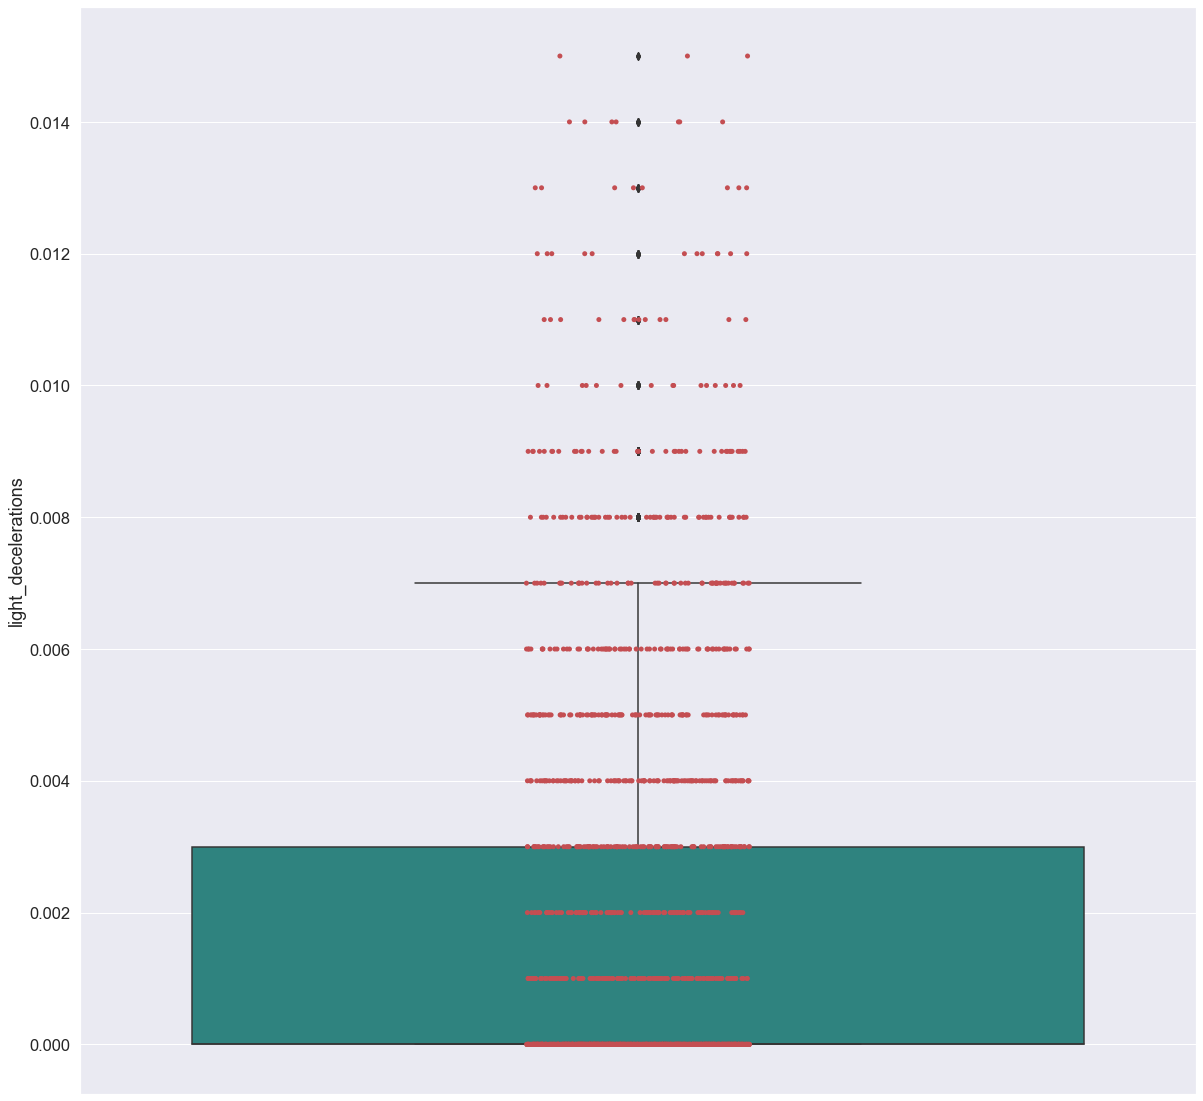

In [74]:
# detect outliers values in light_decelerations feature ::

sns.boxplot  (y = "light_decelerations" , data = df , palette="viridis")
sns.stripplot(y = "light_decelerations" , data = df , color = "r")

<AxesSubplot:ylabel='fetal_movement'>

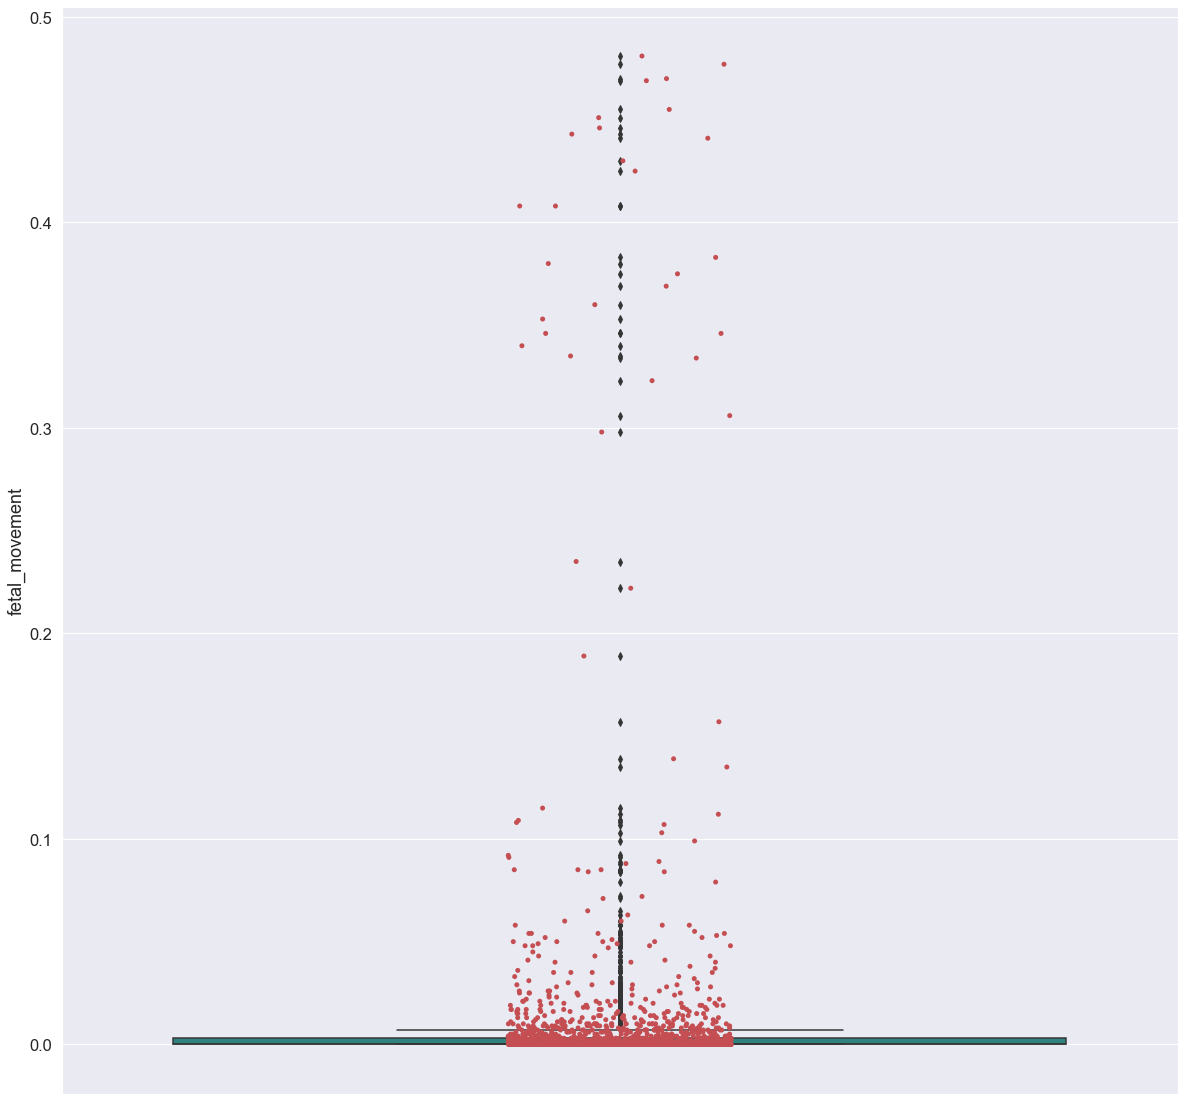

In [75]:
# detect outliers values in fetal_movement feature ::

sns.boxplot  (y = "fetal_movement" , data = df , palette="viridis")
sns.stripplot(y = "fetal_movement" , data = df , color = "r")

<AxesSubplot:ylabel='uterine_contractions'>

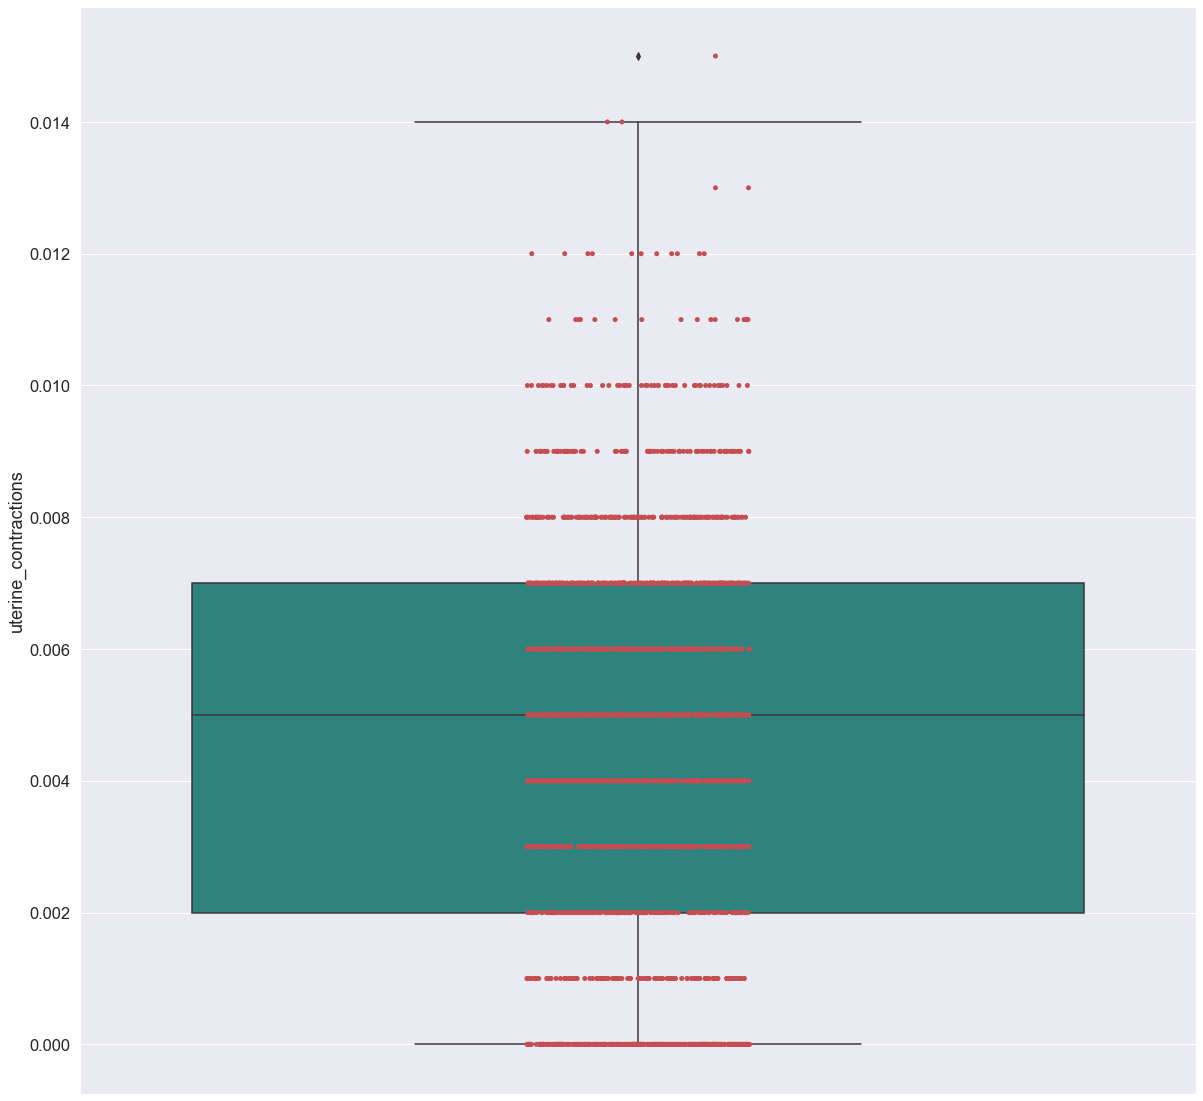

In [76]:
# detect outliers values in uterine_contractions feature ::

sns.boxplot  (y = "uterine_contractions" , data = df , palette="viridis")
sns.stripplot(y = "uterine_contractions" , data = df , color = "r")

<AxesSubplot:ylabel='light_decelerations'>

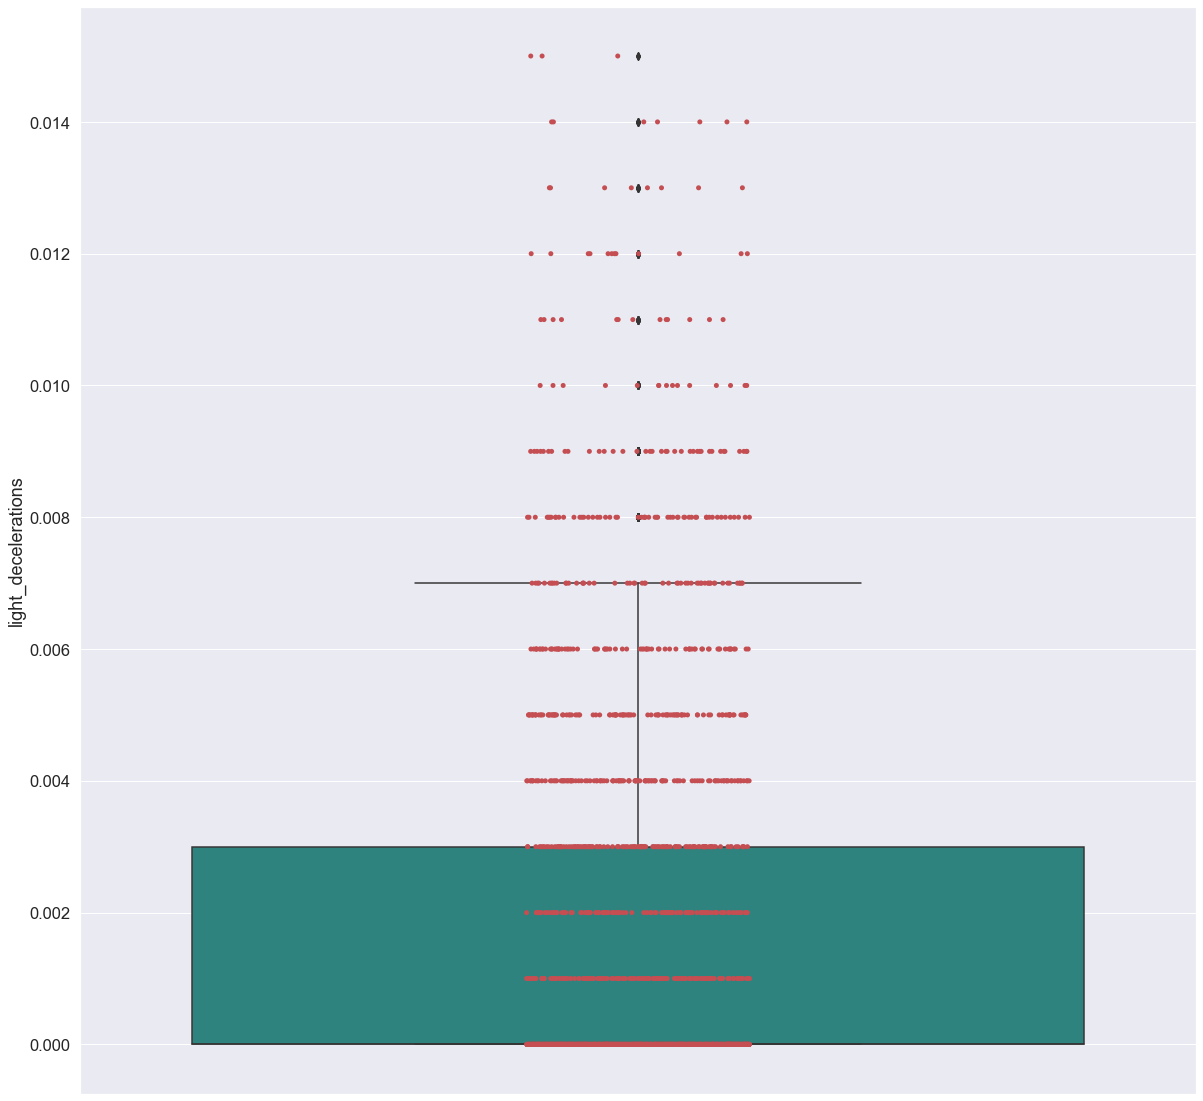

In [77]:
# detect outliers values in light_decelerations feature ::

sns.boxplot  (y = "light_decelerations" , data = df , palette="viridis")
sns.stripplot(y = "light_decelerations" , data = df , color = "r")

<AxesSubplot:ylabel='severe_decelerations'>

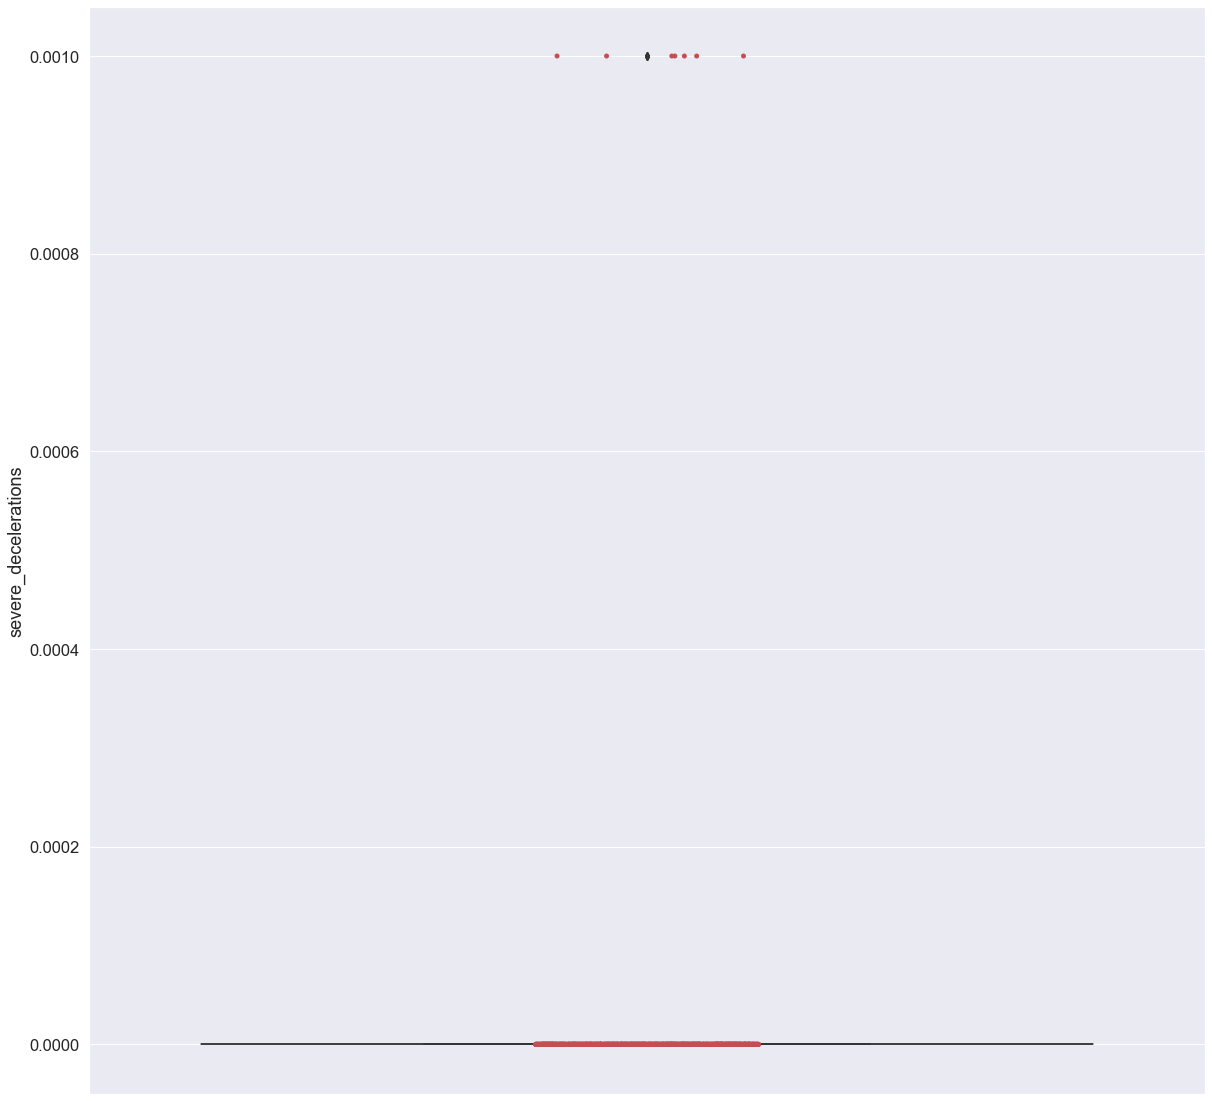

In [78]:
# detect outliers values in severe_decelerations feature ::

sns.boxplot  (y = "severe_decelerations" , data = df , palette="viridis")
sns.stripplot(y = "severe_decelerations" , data = df , color = "r")

<AxesSubplot:ylabel='prolongued_decelerations'>

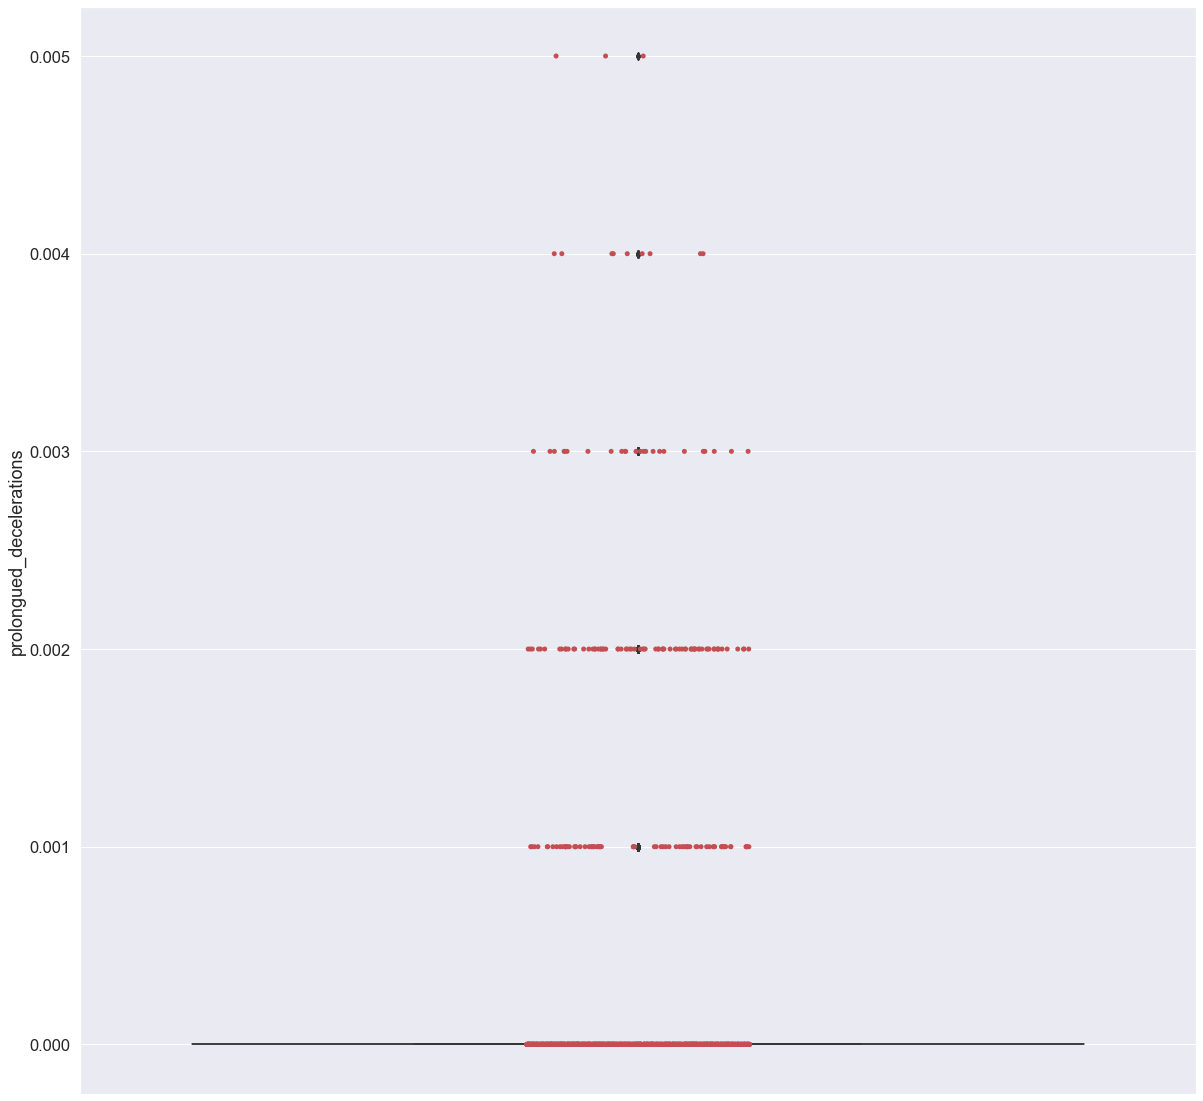

In [79]:
# detect outliers values in prolongued_decelerations feature ::

sns.boxplot  (y = "prolongued_decelerations" , data = df , palette="viridis")
sns.stripplot(y = "prolongued_decelerations" , data = df , color = "r")

<AxesSubplot:ylabel='abnormal_short_term_variability'>

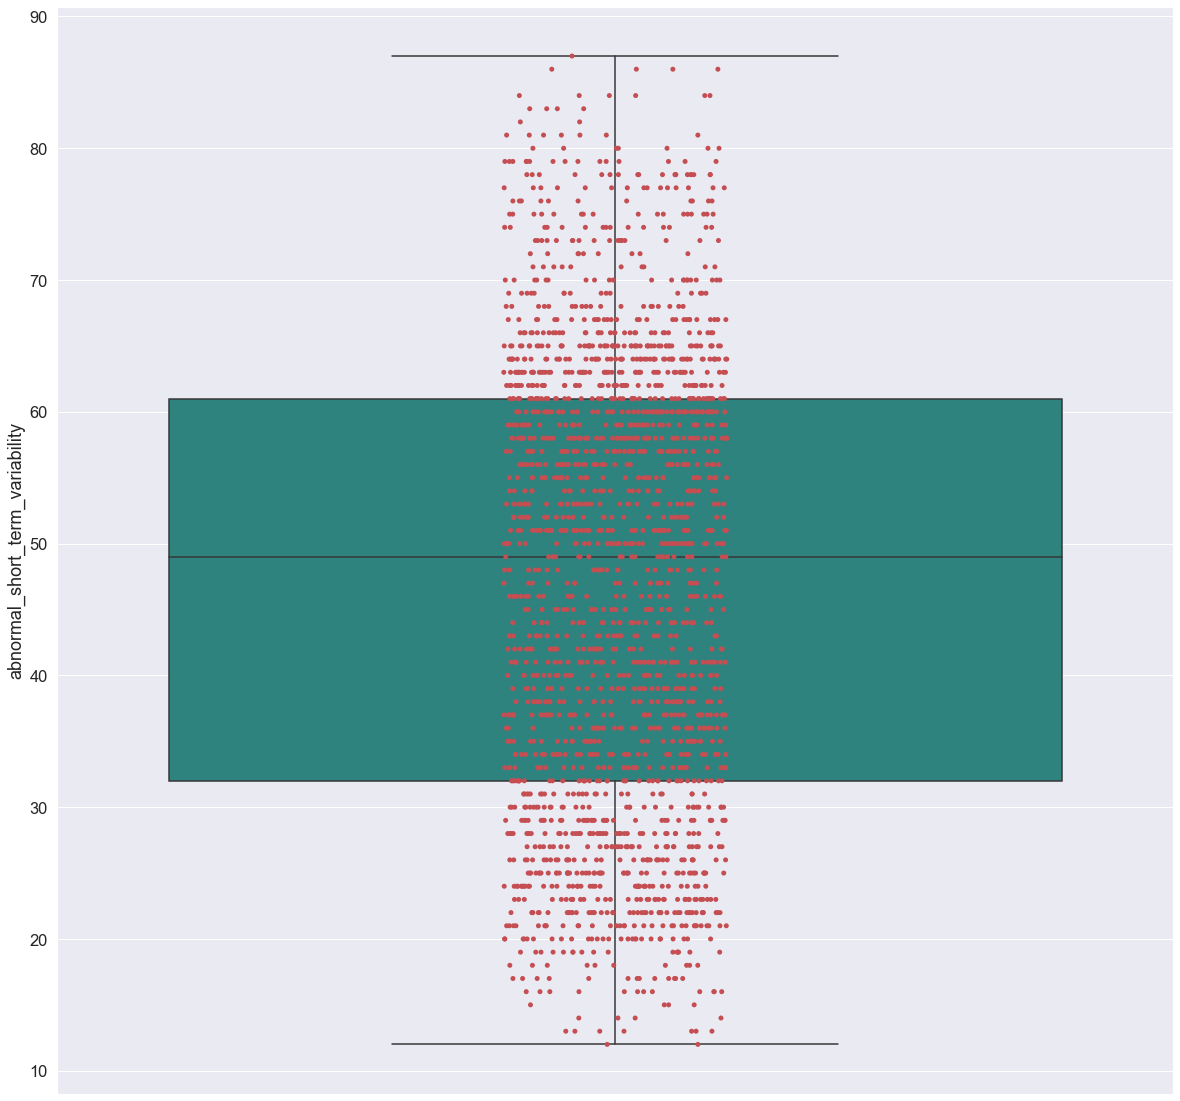

In [80]:
# detect outliers values in abnormal_short_term_variability feature ::

sns.boxplot  (y = "abnormal_short_term_variability" , data = df , palette="viridis")
sns.stripplot(y = "abnormal_short_term_variability" , data = df , color = "r")

* From the result above we can see that the MonthlyCharges feature not include outliers values.

# Processing Text data ::
**********************************************
* We must handling test data into numerical numbers becouse ML Models not understanding that text data so that we use one_hot_encoding or one_variable_encoding technices.


In [81]:
df

baseline value  accelerations  fetal_movement  uterine_contractions  \
0                120          0.000           0.000                 0.000   
1                132          0.006           0.000                 0.006   
2                133          0.003           0.000                 0.008   
3                134          0.003           0.000                 0.008   
4                132          0.007           0.000                 0.008   
...              ...            ...             ...                   ...   
2121             140          0.000           0.000                 0.007   
2122             140          0.001           0.000                 0.007   
2123             140          0.001           0.000                 0.007   
2124             140          0.001           0.000                 0.006   
2125             142          0.002           0.002                 0.008   

      light_decelerations  severe_decelerations  prolongued_decelerations  \
0                   0.000                   0.0                       0.0   
1                   0.003                   0.0                       0.0   
2                   0.003                   0.0                       0.0   
3                   0.003                   0.0                       0.0   
4                   0.000                   0.0                       0.0   
...                   ...                   ...                       ...   
2121                0.000                   0.0                       0.0   
2122                0.000                   0.0                       0.0   
2123                0.000                   0.0                       0.0   
2124                0.000                   0.0                       0.0   
2125                0.000                   0.0                       0.0   

      abnormal_short_term_variability  mean_value_of_short_term_variability  \
0                                  73                                   0.5   
1                                  17                                   2.1   
2                                  16                                   2.1   
3                                  16                                   2.4   
4                                  16                                   2.4   
...                               ...                                   ...   
2121                               79                                   0.2   
2122                               78                                   0.4   
2123                               79                                   0.4   
2124                               78                                   0.4   
2125                               74                                   0.4   

      percentage_of_time_with_abnormal_long_term_variability  ...  \
0                                                    43       ...   
1                                                     0       ...   
2                                                     0       ...   
3                                                     0       ...   
4                                                     0       ...   
...                                                 ...       ...   
2121                                                 25       ...   
2122                                                 22       ...   
2123                                                 20       ...   
2124                                                 27       ...   
2125                                                 36       ...   

      histogram_min  histogram_max  histogram_number_of_peaks  \
0                62            126                          2   
1                68            198                          6   
2                68            198                          5   
3                53            170                         11   
4                53            170                   

* From the result above we can see that data not include categorical Text data that mean all data numerical so that we not apply variables dummies encoding technicies

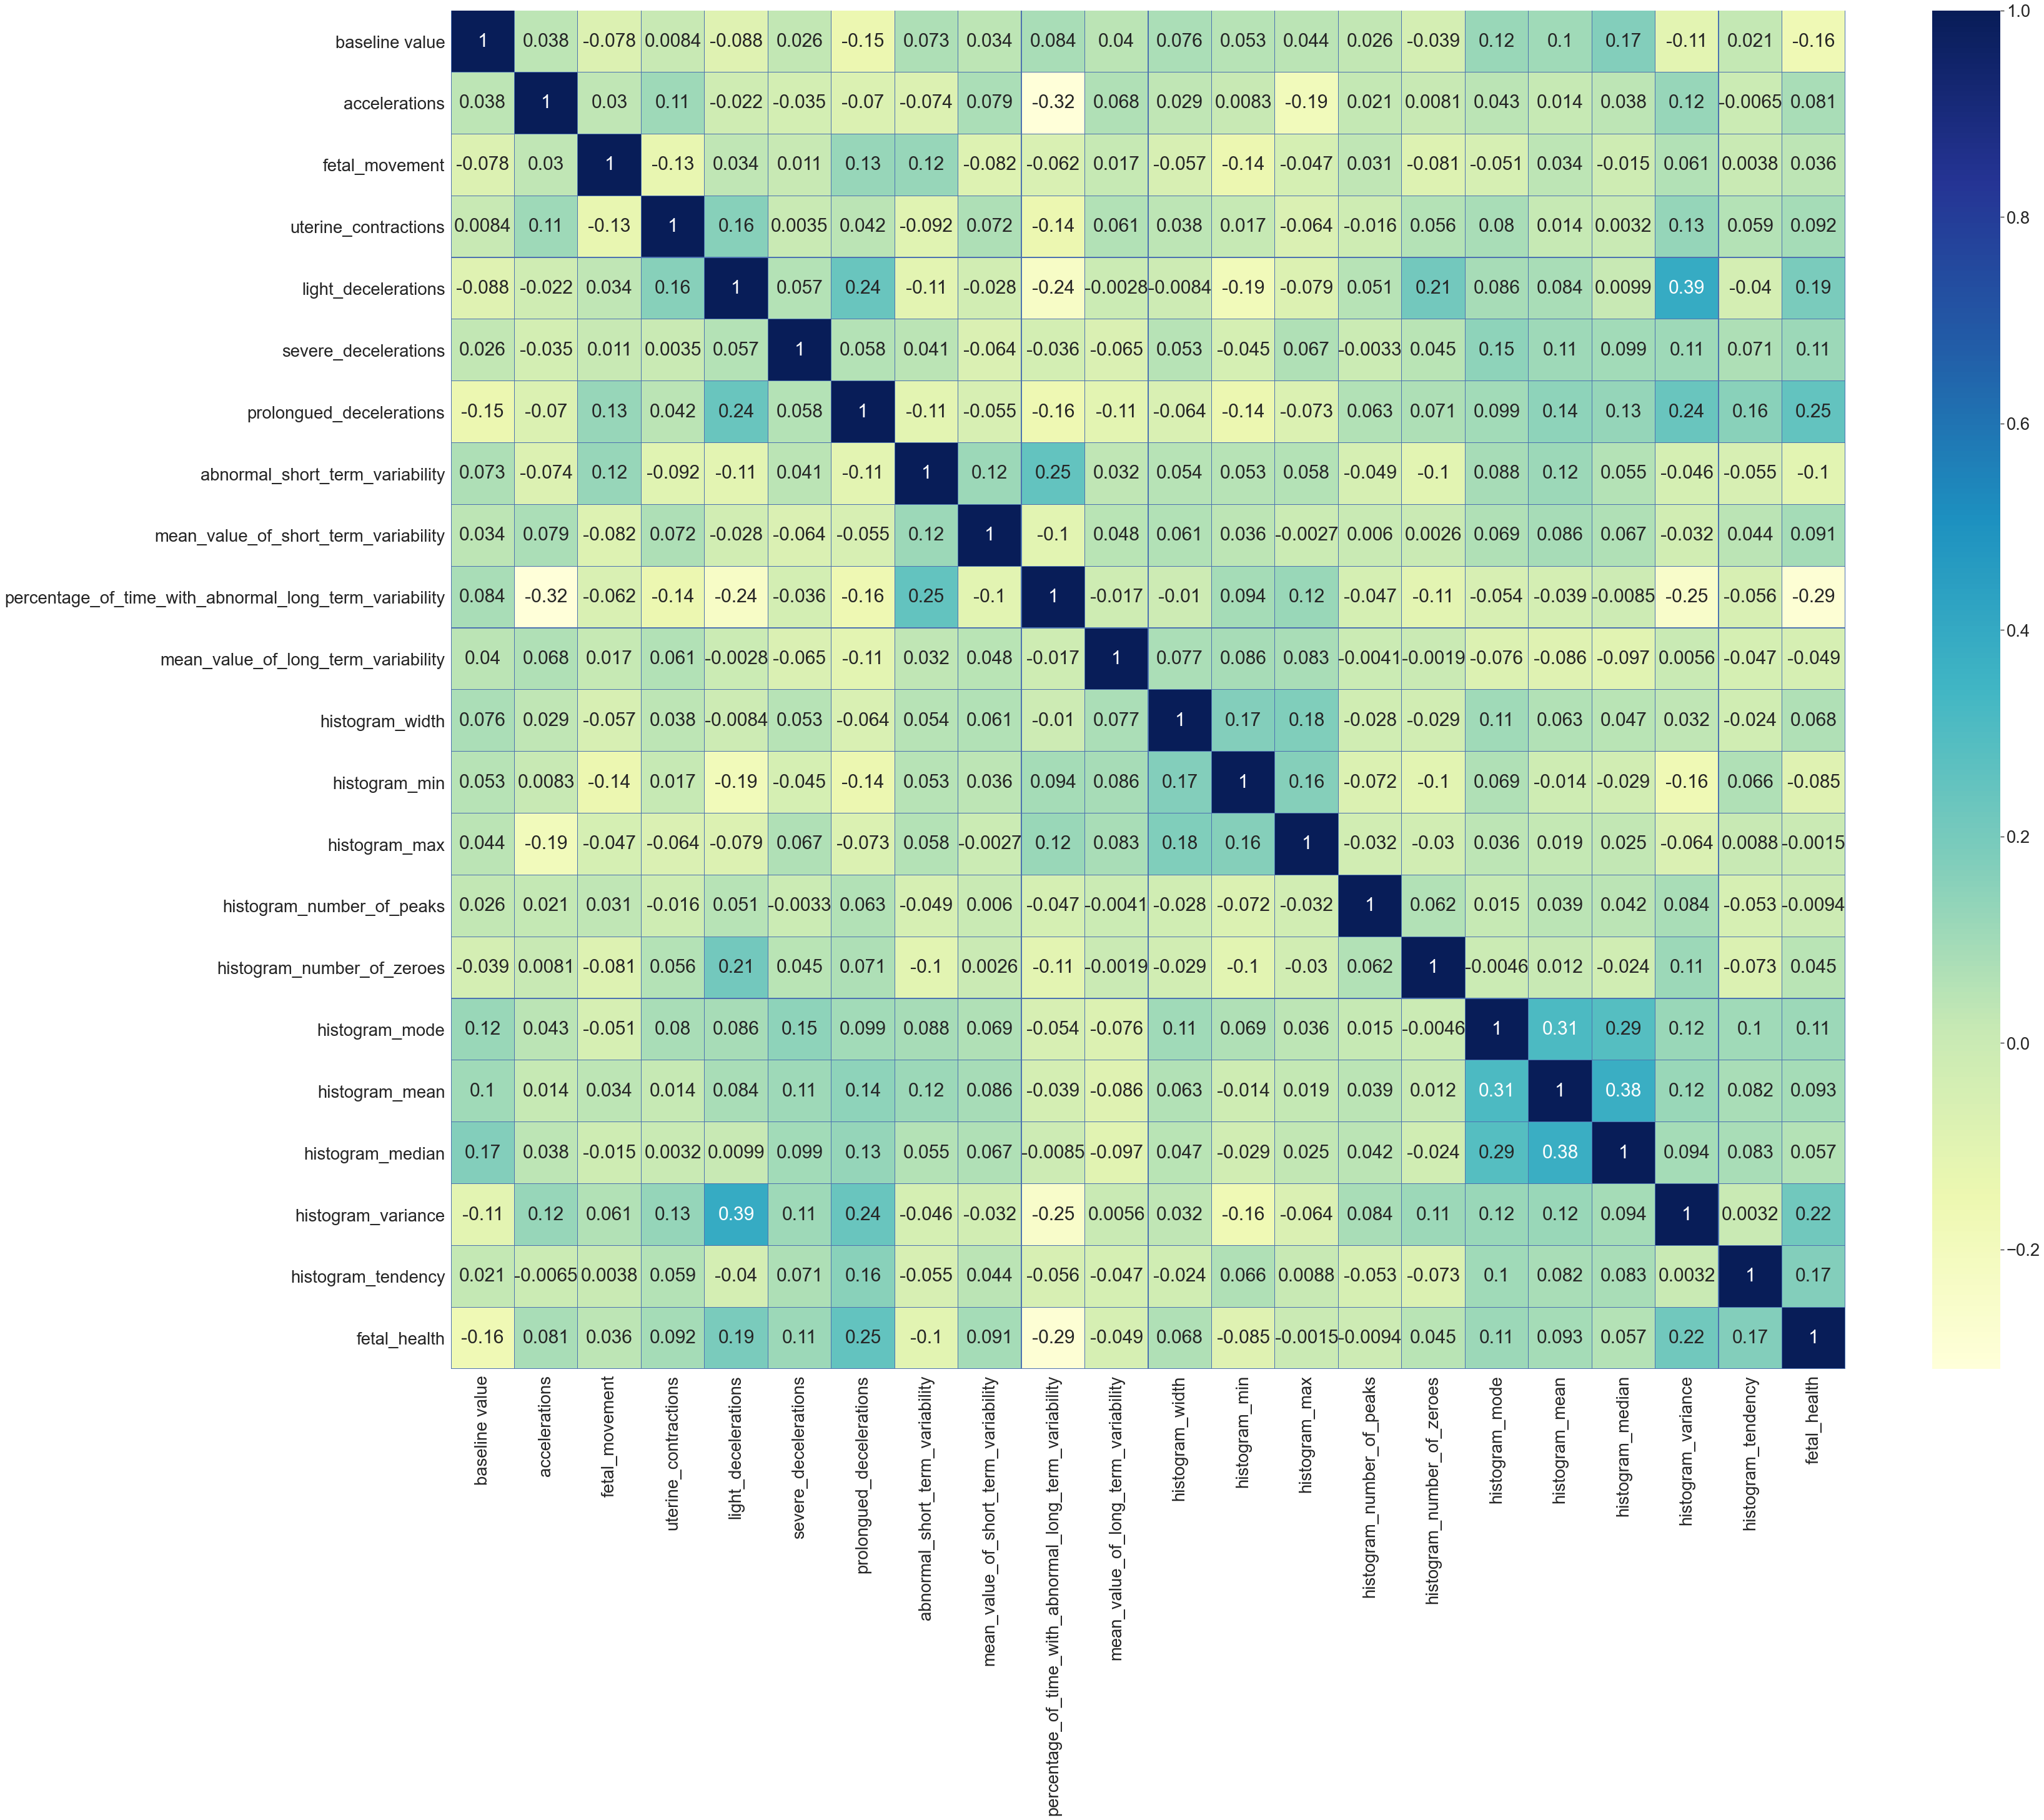

In [82]:
# get correlation between all features ::
sns.set( rc = {"figure.figsize" : [50 , 40]} , font_scale=2.5)
corr = df.apply(lambda x: pd.factorize(x)[0]).corr()
ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, 
                 linewidths=.2, cmap="YlGnBu", annot=True , linecolor="b")

<AxesSubplot:>

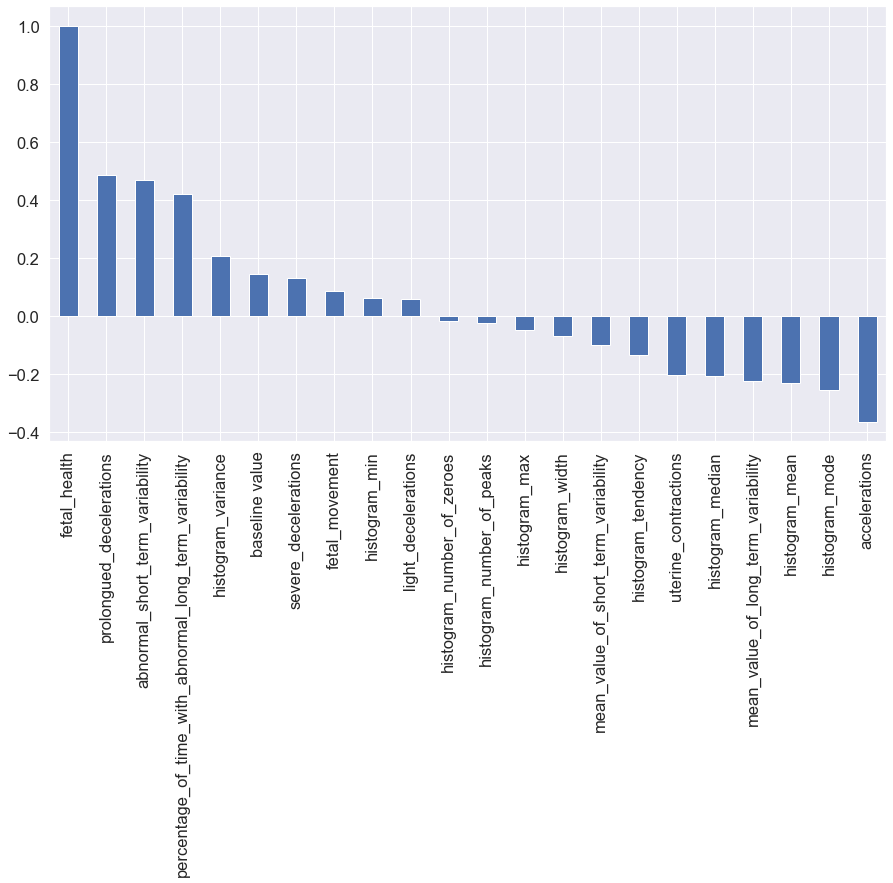

In [83]:
# Get Correlation of "Churn" with other features ::
sns.set( rc = {"figure.figsize" : [10 , 10]} , font_scale=1.5)

plt.figure(figsize=(15,8))
df.corr()['fetal_health'].sort_values(ascending = False).plot(kind='bar'  )

# 3 :: Feture selection ::
***************************************************
* There are multi technices to get the most Correlation Columns with our target.

<p id = "Prepration">Data-Prepration</p>

In [84]:
# Split data into input and output data
x = df.drop("fetal_health" , axis=1 )
y = df["fetal_health"]

In [85]:
# Spliting data into Training and Testing data ::
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split( x , y , random_state = 20 , test_size=0.2)

In [86]:
print(f"The x_train-shape :: {x_train.shape}\n====================")
print(f"The x_test-shape :: {x_test.shape}\n====================")
print(f"The y_train-shape :: {y_train.shape}\n====================")
print(f"The y_test-shape :: {y_test.shape}\n====================")

The x_train-shape :: (1690, 21)
The x_test-shape :: (423, 21)
The y_train-shape :: (1690,)
The y_test-shape :: (423,)


In [87]:
 #Scalling data ::
from sklearn.preprocessing import StandardScaler
scaller = StandardScaler()
x_train = scaller.fit_transform(x_train)
x_test  = scaller.transform(x_test)

<p id = "Model">Bulid_ML_Model</p>

# Build Models ::
*************************************
* On that Process we will ::
    * Bulid multi models fror classification problem.
    * Evaluate all models.
    * Select the most efficient model for churn problem.

In [92]:
# Import All Classification Algos ::
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB , MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score , confusion_matrix 
from sklearn.metrics import classification_report , f1_score , precision_recall_curve

In [93]:
Models = {"Log_Classifer" : LogisticRegression() ,
          "DT_Classifer"  : DecisionTreeClassifier() ,
          "RF_Classifer"  : RandomForestClassifier() ,
          "XGB_Classifer" : XGBClassifier() ,
          "SVC_Classifer" : SVC(),
          "GassianNB_Classifiier" : GaussianNB() ,
          "KNN_Classifier" : KNeighborsClassifier()
         }

In [94]:
for Name , Model in Models.items() :
    print(f"The Model :: {Name}\n----------")
    Model.fit(x_train , y_train)
    Train_score = Model.score(x_train , y_train)
    Test_score  = Model.score(x_test , y_test)
    y_pred = Model.predict(x_test)
    Acurace_Score = accuracy_score(y_test , y_pred)
    Con_Matrix = confusion_matrix(y_test , y_pred)
    print(f"The Traing_Score :: {Train_score}\nThe Testing_Score :: {Test_score}\nThe Accuracy_Scor :: {Acurace_Score}\nThe Con_Matrix ::\n {Con_Matrix}\n=================\n=================")

The Model :: Log_Classifer
----------
The Traing_Score :: 0.9029585798816568
The Testing_Score :: 0.8983451536643026
The Accuracy_Scor :: 0.8983451536643026
The Con_Matrix ::
 [[308  13   3]
 [ 15  49   4]
 [  2   6  23]]
The Model :: DT_Classifer
----------
The Traing_Score :: 0.9988165680473373
The Testing_Score :: 0.91725768321513
The Accuracy_Scor :: 0.91725768321513
The Con_Matrix ::
 [[306  14   4]
 [ 13  53   2]
 [  1   1  29]]
The Model :: RF_Classifer
----------
The Traing_Score :: 0.9988165680473373
The Testing_Score :: 0.9361702127659575
The Accuracy_Scor :: 0.9361702127659575
The Con_Matrix ::
 [[317   7   0]
 [ 14  52   2]
 [  1   3  27]]
The Model :: XGB_Classifer
----------
[17:52:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old b

* Select most efficient model with high Performance and accuracy

In [95]:
XGB_Model = XGBClassifier()
XGB_Model.fit(x_train , y_train)
print(XGB_Model.score(x_train , y_train))
print(XGB_Model.score(x_test , y_test))
print("-" * 80)

[17:53:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.9988165680473373
0.9527186761229315
--------------------------------------------------------------------------------


<p id = "Evaluation">Evaluate_Model</p>

# Evaluate Model ::
*********************************
* Its one off the most important phase in data scientist life cycle which estimate the performance and accuracy of the model in that problem.

In [96]:
XGB_Model.score(x_train , y_train)

0.9988165680473373

In [97]:
XGB_Model.score(x_test , y_test)

0.9527186761229315

In [98]:
Ac_Sore_XGB = accuracy_score(y_test , y_pred)
Ac_Sore_XGB

0.8959810874704491

In [99]:
con_Matrix = confusion_matrix(y_test , y_pred)
con_Matrix

array([[312,  11,   1],
       [ 20,  48,   0],
       [  4,   8,  19]], dtype=int64)

<AxesSubplot:>

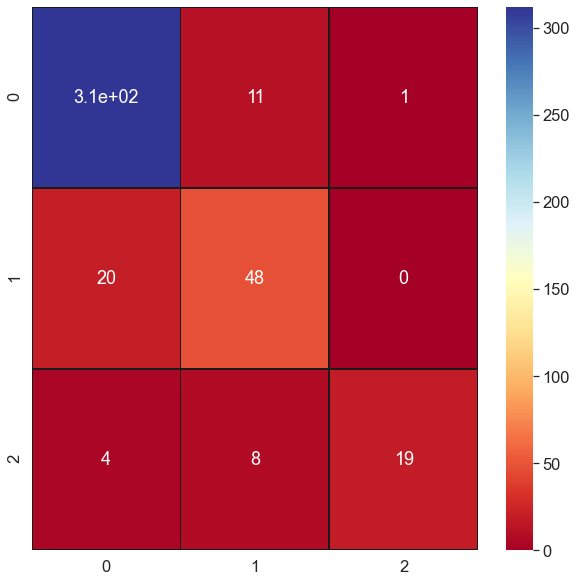

In [100]:
sns.set( rc = {"figure.figsize" : [10 , 10]} , font_scale=1.5)

sns.heatmap(con_Matrix , annot = True , cmap="RdYlBu" , linecolor = 'k' , linewidths= 1)

<p id = "Save">Save_Model</p>

# Save techinces ::
***************************************
* Save Scaler
* Save PCA
* Save Model

In [101]:
import joblib

In [102]:
scaler = joblib.dump(scaller , "scaler.h5")

In [103]:
Model = joblib.dump(XGB_Model , "Model.h5")

<p id = "conclusions">conclusions</p>

# Conclusion ::
*****************************
* On that Step We will ::
  * Input data features.
  * Scaling input data.
  * Predict species label.

In [104]:
df["histogram_width"]

0        64
1       130
2       130
3       117
4       117
       ... 
2121     40
2122     66
2123     67
2124     66
2125     42
Name: histogram_width, Length: 2113, dtype: int64

In [105]:
df["mean_value_of_long_term_variability"]

0        2.4
1       10.4
2       13.4
3       23.0
4       19.9
        ... 
2121     7.2
2122     7.1
2123     6.1
2124     7.0
2125     5.0
Name: mean_value_of_long_term_variability, Length: 2113, dtype: float64

In [106]:
df.head(5)

baseline value  accelerations  fetal_movement  uterine_contractions  \
0             120          0.000             0.0                 0.000   
1             132          0.006             0.0                 0.006   
2             133          0.003             0.0                 0.008   
3             134          0.003             0.0                 0.008   
4             132          0.007             0.0                 0.008   

   light_decelerations  severe_decelerations  prolongued_decelerations  \
0                0.000                   0.0                       0.0   
1                0.003                   0.0                       0.0   
2                0.003                   0.0                       0.0   
3                0.003                   0.0                       0.0   
4                0.000                   0.0                       0.0   

   abnormal_short_term_variability  mean_value_of_short_term_variability  \
0                               73                                   0.5   
1                               17                                   2.1   
2                               16                                   2.1   
3                               16                                   2.4   
4                               16                                   2.4   

   percentage_of_time_with_abnormal_long_term_variability  ...  histogram_min  \
0                                                 43       ...             62   
1                                                  0       ...             68   
2                                                  0       ...             68   
3                                                  0       ...             53   
4                                                  0       ...             53   

   histogram_max  histogram_number_of_peaks  histogram_number_of_zeroes  \
0            126                          2                           0   
1            198                          6                           1   
2            198                          5                           1   
3            170                         11                           0   
4            170                          9                           0   

   histogram_mode  histogram_mean  histogram_median  histogram_variance  \
0             120             137               121                  73   
1             141             136               140                  12   
2             141             135               138                  13   
3             137             134               137                  13   
4             137             136               138                  11   

   histogram_tendency  fetal_health  
0                   1             2  
1                   0             1  
2                   0             1  
3                   1             1  
4                   1             1  

[5 rows x 22 columns]

In [107]:
x.columns

Index(['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency'],
      dtype='object')

In [108]:
custom_data = np.array([ 120 , 0.006 , 0 , 0.008 , 0.003 , 0 , 0 , 16 , 2.1 , 0 , 7 , 66 , 53 , 170 ,  11 , 1 , 137 , 134 , 140 , 73 , 1])

In [109]:
custom_data.shape

(21,)

In [110]:
custom_data = scaller.transform([custom_data])
custom_data

array([[-1.33388651,  0.7390711 , -0.19861485,  1.2107936 ,  0.36280224,
        -0.06449217, -0.27600536, -1.79122663,  0.8488728 , -0.52407552,
        -0.21410409, -0.113012  , -1.36805105,  0.32805053,  2.32704069,
         0.92300677, -0.01687015, -0.02725305,  0.14391692,  1.86042348,
         1.13736198]])

In [111]:
prediction = XGB_Model.predict(custom_data)
prediction

array([1], dtype=int64)